<img src="https://strelka.com/img/90b94360c75eeefe/istock-582282270.jpg"/>
<center>Image Source: https://strelkamag.com/en/article/house</center>

# About Competition
Sberbank, Russia’s oldest and largest bank, helps their customers by making predictions about realty prices so renters, developers, and lenders are more confident. Housing costs demand a significant investment from both consumers and developers.
 The housing market is relatively stable in Russia, but the country’s volatile economy makes forecasting prices as a function of apartment characteristics a unique challenge. Complex interactions between housing features such as number of bedrooms and location are enough to make pricing predictions complicated.
 Sberbank is challenging Kagglers to develop algorithms which use a broad spectrum of features to predict realty prices. Competitors will rely on a rich dataset that includes housing data and macroeconomic patterns.Competition file is available [here](https://www.kaggle.com/c/sberbank-russian-housing-market).

# Load Competition Dataset

Competition dataset located in "/kaggle/input"; This path defined by Kaggle to access the competition file. We will list two files from this path as input files.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from zipfile import ZipFile
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        path=os.path.join(dirname, filename)
        if 'train' in path:
            __training_path=path
        elif 'test' in path:
            __test_path=path

## Input Dataset

In [2]:
#loaded files
print(f'Training path:{__training_path}\nTest path:{__test_path}')

Training path:/kaggle/input/sberbank-russian-housing-market/train.csv.zip
Test path:/kaggle/input/sberbank-russian-housing-market/test.csv.zip


In [3]:
# Kaggle Environment Prepration
#update kaggle env
import sys
#you may update the environment that allow you to run the whole code
!{sys.executable} -m pip install --upgrade scikit-learn=="0.24.2"

     |████████████████████████████████| 22.3 MB 1.4 MB/s            
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.19.0 requires statsmodels>=0.13, but you have statsmodels 0.12.2 which is incompatible.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.5.1 which is incompatible.
hypertools 0.7.0 requires scikit-learn!=0.22,<0.24,>=0.19.1, but you have scikit-learn 0.24.2 which is incompatible.


In [4]:
#record this information if you need to run the Kernel internally
import sklearn; sklearn.show_versions()


System:
    python: 3.7.12 | packaged by conda-forge | (default, Oct 26 2021, 06:08:53)  [GCC 9.4.0]
executable: /opt/conda/bin/python
   machine: Linux-5.15.65+-x86_64-with-debian-bullseye-sid

Python dependencies:
          pip: 21.3.1
   setuptools: 59.4.0
      sklearn: 0.24.2
        numpy: 1.19.5
        scipy: 1.7.3
       Cython: 0.29.26
       pandas: 1.3.4
   matplotlib: 3.5.1
       joblib: 1.1.0
threadpoolctl: 3.0.0

Built with OpenMP: True


In [5]:
def proc_multifiles_zip(path, condition, delimiter=','):
    zip_file = ZipFile(path)
    for text_file in zip_file.infolist():
        if condition in text_file.filename:
            return pd.read_csv(zip_file.open(text_file.filename), delimiter=delimiter)

# Exploratory Data Analysis (EDA)
## General Structure
Sberbank Russian Housing Market Dataset includes <b>292</b> columns and <b>30471</b> rows.
There are <b>3</b> different data types as follows: *int64, object, float64*.

Let's review the dataset description:
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>count</th>
      <th>mean</th>
      <th>std</th>
      <th>min</th>
      <th>25%</th>
      <th>50%</th>
      <th>75%</th>
      <th>max</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>id</th>
      <td>30471.0</td>
      <td>1.523792e+04</td>
      <td>8.796502e+03</td>
      <td>1.000000e+00</td>
      <td>7.620500e+03</td>
      <td>1.523800e+04</td>
      <td>2.285550e+04</td>
      <td>3.047300e+04</td>
    </tr>
    <tr>
      <th>full_sq</th>
      <td>30471.0</td>
      <td>5.421427e+01</td>
      <td>3.803149e+01</td>
      <td>0.000000e+00</td>
      <td>3.800000e+01</td>
      <td>4.900000e+01</td>
      <td>6.300000e+01</td>
      <td>5.326000e+03</td>
    </tr>
    <tr>
      <th>life_sq</th>
      <td>24088.0</td>
      <td>3.440327e+01</td>
      <td>5.228573e+01</td>
      <td>0.000000e+00</td>
      <td>2.000000e+01</td>
      <td>3.000000e+01</td>
      <td>4.300000e+01</td>
      <td>7.478000e+03</td>
    </tr>
    <tr>
      <th>floor</th>
      <td>30304.0</td>
      <td>7.670803e+00</td>
      <td>5.319989e+00</td>
      <td>0.000000e+00</td>
      <td>3.000000e+00</td>
      <td>6.500000e+00</td>
      <td>1.100000e+01</td>
      <td>7.700000e+01</td>
    </tr>
    <tr>
      <th>max_floor</th>
      <td>20899.0</td>
      <td>1.255897e+01</td>
      <td>6.756550e+00</td>
      <td>0.000000e+00</td>
      <td>9.000000e+00</td>
      <td>1.200000e+01</td>
      <td>1.700000e+01</td>
      <td>1.170000e+02</td>
    </tr>
    <tr>
      <th>material</th>
      <td>20899.0</td>
      <td>1.827121e+00</td>
      <td>1.481154e+00</td>
      <td>1.000000e+00</td>
      <td>1.000000e+00</td>
      <td>1.000000e+00</td>
      <td>2.000000e+00</td>
      <td>6.000000e+00</td>
    </tr>
    <tr>
      <th>build_year</th>
      <td>16866.0</td>
      <td>3.068057e+03</td>
      <td>1.543878e+05</td>
      <td>0.000000e+00</td>
      <td>1.967000e+03</td>
      <td>1.979000e+03</td>
      <td>2.005000e+03</td>
      <td>2.005201e+07</td>
    </tr>
    <tr>
      <th>num_room</th>
      <td>20899.0</td>
      <td>1.909804e+00</td>
      <td>8.518045e-01</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>2.000000e+00</td>
      <td>2.000000e+00</td>
      <td>1.900000e+01</td>
    </tr>
    <tr>
      <th>kitch_sq</th>
      <td>20899.0</td>
      <td>6.399301e+00</td>
      <td>2.826598e+01</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>6.000000e+00</td>
      <td>9.000000e+00</td>
      <td>2.014000e+03</td>
    </tr>
    <tr>
      <th>state</th>
      <td>16912.0</td>
      <td>2.107025e+00</td>
      <td>8.801481e-01</td>
      <td>1.000000e+00</td>
      <td>1.000000e+00</td>
      <td>2.000000e+00</td>
      <td>3.000000e+00</td>
      <td>3.300000e+01</td>
    </tr>
    <tr>
      <th>area_m</th>
      <td>30471.0</td>
      <td>1.765705e+07</td>
      <td>2.064961e+07</td>
      <td>2.081628e+06</td>
      <td>7.307411e+06</td>
      <td>1.050803e+07</td>
      <td>1.803644e+07</td>
      <td>2.060718e+08</td>
    </tr>
    <tr>
      <th>raion_popul</th>
      <td>30471.0</td>
      <td>8.405643e+04</td>
      <td>5.787129e+04</td>
      <td>2.546000e+03</td>
      <td>2.181900e+04</td>
      <td>8.350200e+04</td>
      <td>1.228620e+05</td>
      <td>2.474690e+05</td>
    </tr>
    <tr>
      <th>green_zone_part</th>
      <td>30471.0</td>
      <td>2.189223e-01</td>
      <td>1.750902e-01</td>
      <td>1.879375e-03</td>
      <td>6.375521e-02</td>
      <td>1.675257e-01</td>
      <td>3.361769e-01</td>
      <td>8.529228e-01</td>
    </tr>
    <tr>
      <th>indust_part</th>
      <td>30471.0</td>
      <td>1.188713e-01</td>
      <td>1.186875e-01</td>
      <td>0.000000e+00</td>
      <td>1.950880e-02</td>
      <td>7.215758e-02</td>
      <td>1.957811e-01</td>
      <td>5.218671e-01</td>
    </tr>
    <tr>
      <th>children_preschool</th>
      <td>30471.0</td>
      <td>5.140026e+03</td>
      <td>3.816625e+03</td>
      <td>1.750000e+02</td>
      <td>1.706000e+03</td>
      <td>4.857000e+03</td>
      <td>7.103000e+03</td>
      <td>1.922300e+04</td>
    </tr>
    <tr>
      <th>preschool_quota</th>
      <td>23783.0</td>
      <td>3.271272e+03</td>
      <td>2.169760e+03</td>
      <td>0.000000e+00</td>
      <td>1.874000e+03</td>
      <td>2.854000e+03</td>
      <td>4.050000e+03</td>
      <td>1.192600e+04</td>
    </tr>
    <tr>
      <th>preschool_education_centers_raion</th>
      <td>30471.0</td>
      <td>4.065111e+00</td>
      <td>2.993795e+00</td>
      <td>0.000000e+00</td>
      <td>2.000000e+00</td>
      <td>4.000000e+00</td>
      <td>6.000000e+00</td>
      <td>1.300000e+01</td>
    </tr>
    <tr>
      <th>children_school</th>
      <td>30471.0</td>
      <td>5.354270e+03</td>
      <td>3.989641e+03</td>
      <td>1.680000e+02</td>
      <td>1.564000e+03</td>
      <td>5.261000e+03</td>
      <td>7.227000e+03</td>
      <td>1.908300e+04</td>
    </tr>
    <tr>
      <th>school_quota</th>
      <td>23786.0</td>
      <td>8.324971e+03</td>
      <td>4.289734e+03</td>
      <td>1.012000e+03</td>
      <td>5.782000e+03</td>
      <td>7.377000e+03</td>
      <td>9.891000e+03</td>
      <td>2.475000e+04</td>
    </tr>
    <tr>
      <th>school_education_centers_raion</th>
      <td>30471.0</td>
      <td>4.705031e+00</td>
      <td>3.445105e+00</td>
      <td>0.000000e+00</td>
      <td>2.000000e+00</td>
      <td>5.000000e+00</td>
      <td>7.000000e+00</td>
      <td>1.400000e+01</td>
    </tr>
    <tr>
      <th>school_education_centers_top_20_raion</th>
      <td>30471.0</td>
      <td>1.096781e-01</td>
      <td>3.333284e-01</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>2.000000e+00</td>
    </tr>
    <tr>
      <th>hospital_beds_raion</th>
      <td>16030.0</td>
      <td>1.190739e+03</td>
      <td>1.057015e+03</td>
      <td>0.000000e+00</td>
      <td>5.200000e+02</td>
      <td>9.900000e+02</td>
      <td>1.786000e+03</td>
      <td>4.849000e+03</td>
    </tr>
    <tr>
      <th>healthcare_centers_raion</th>
      <td>30471.0</td>
      <td>1.320895e+00</td>
      <td>1.492903e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>2.000000e+00</td>
      <td>6.000000e+00</td>
    </tr>
    <tr>
      <th>university_top_20_raion</th>
      <td>30471.0</td>
      <td>1.382954e-01</td>
      <td>4.437963e-01</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>3.000000e+00</td>
    </tr>
    <tr>
      <th>sport_objects_raion</th>
      <td>30471.0</td>
      <td>6.635030e+00</td>
      <td>6.571982e+00</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>5.000000e+00</td>
      <td>1.000000e+01</td>
      <td>2.900000e+01</td>
    </tr>
    <tr>
      <th>additional_education_raion</th>
      <td>30471.0</td>
      <td>2.896393e+00</td>
      <td>3.290058e+00</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>2.000000e+00</td>
      <td>4.000000e+00</td>
      <td>1.600000e+01</td>
    </tr>
    <tr>
      <th>culture_objects_top_25_raion</th>
      <td>30471.0</td>
      <td>2.867316e-01</td>
      <td>1.510491e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>1.000000e+01</td>
    </tr>
    <tr>
      <th>shopping_centers_raion</th>
      <td>30471.0</td>
      <td>4.200978e+00</td>
      <td>4.741812e+00</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>3.000000e+00</td>
      <td>6.000000e+00</td>
      <td>2.300000e+01</td>
    </tr>
    <tr>
      <th>office_raion</th>
      <td>30471.0</td>
      <td>8.253454e+00</td>
      <td>2.353695e+01</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>2.000000e+00</td>
      <td>5.000000e+00</td>
      <td>1.410000e+02</td>
    </tr>
    <tr>
      <th>full_all</th>
      <td>30471.0</td>
      <td>1.463062e+05</td>
      <td>2.830251e+05</td>
      <td>2.546000e+03</td>
      <td>2.817900e+04</td>
      <td>8.521900e+04</td>
      <td>1.251110e+05</td>
      <td>1.716730e+06</td>
    </tr>
    <tr>
      <th>male_f</th>
      <td>30471.0</td>
      <td>6.720779e+04</td>
      <td>1.294446e+05</td>
      <td>1.208000e+03</td>
      <td>1.352200e+04</td>
      <td>3.926100e+04</td>
      <td>5.822600e+04</td>
      <td>7.745850e+05</td>
    </tr>
    <tr>
      <th>female_f</th>
      <td>30471.0</td>
      <td>7.909866e+04</td>
      <td>1.536309e+05</td>
      <td>1.341000e+03</td>
      <td>1.503100e+04</td>
      <td>4.572900e+04</td>
      <td>6.787200e+04</td>
      <td>9.421450e+05</td>
    </tr>
    <tr>
      <th>young_all</th>
      <td>30471.0</td>
      <td>1.117881e+04</td>
      <td>8.287958e+03</td>
      <td>3.650000e+02</td>
      <td>3.459000e+03</td>
      <td>1.098800e+04</td>
      <td>1.490600e+04</td>
      <td>4.069200e+04</td>
    </tr>
    <tr>
      <th>young_male</th>
      <td>30471.0</td>
      <td>5.723853e+03</td>
      <td>4.275438e+03</td>
      <td>1.890000e+02</td>
      <td>1.782000e+03</td>
      <td>5.470000e+03</td>
      <td>7.597000e+03</td>
      <td>2.097700e+04</td>
    </tr>
    <tr>
      <th>young_female</th>
      <td>30471.0</td>
      <td>5.455014e+03</td>
      <td>4.020546e+03</td>
      <td>1.770000e+02</td>
      <td>1.677000e+03</td>
      <td>5.333000e+03</td>
      <td>7.617000e+03</td>
      <td>1.971500e+04</td>
    </tr>
    <tr>
      <th>work_all</th>
      <td>30471.0</td>
      <td>5.366791e+04</td>
      <td>3.748356e+04</td>
      <td>1.633000e+03</td>
      <td>1.399600e+04</td>
      <td>5.203000e+04</td>
      <td>7.761200e+04</td>
      <td>1.612900e+05</td>
    </tr>
    <tr>
      <th>work_male</th>
      <td>30471.0</td>
      <td>2.725359e+04</td>
      <td>1.893915e+04</td>
      <td>8.630000e+02</td>
      <td>7.394000e+03</td>
      <td>2.638200e+04</td>
      <td>3.884100e+04</td>
      <td>7.962200e+04</td>
    </tr>
    <tr>
      <th>work_female</th>
      <td>30471.0</td>
      <td>2.641441e+04</td>
      <td>1.864313e+04</td>
      <td>7.710000e+02</td>
      <td>6.661000e+03</td>
      <td>2.609200e+04</td>
      <td>3.794200e+04</td>
      <td>8.166800e+04</td>
    </tr>
    <tr>
      <th>ekder_all</th>
      <td>30471.0</td>
      <td>1.920971e+04</td>
      <td>1.317472e+04</td>
      <td>5.480000e+02</td>
      <td>4.695000e+03</td>
      <td>2.003600e+04</td>
      <td>2.917200e+04</td>
      <td>5.708600e+04</td>
    </tr>
    <tr>
      <th>ekder_male</th>
      <td>30471.0</td>
      <td>5.811618e+03</td>
      <td>4.073828e+03</td>
      <td>1.560000e+02</td>
      <td>1.331000e+03</td>
      <td>6.180000e+03</td>
      <td>8.563000e+03</td>
      <td>1.927500e+04</td>
    </tr>
    <tr>
      <th>ekder_female</th>
      <td>30471.0</td>
      <td>1.339817e+04</td>
      <td>9.144326e+03</td>
      <td>3.930000e+02</td>
      <td>3.365000e+03</td>
      <td>1.354000e+04</td>
      <td>2.016500e+04</td>
      <td>3.781100e+04</td>
    </tr>
    <tr>
      <th>0_6_all</th>
      <td>30471.0</td>
      <td>5.140026e+03</td>
      <td>3.816625e+03</td>
      <td>1.750000e+02</td>
      <td>1.706000e+03</td>
      <td>4.857000e+03</td>
      <td>7.103000e+03</td>
      <td>1.922300e+04</td>
    </tr>
    <tr>
      <th>0_6_male</th>
      <td>30471.0</td>
      <td>2.631199e+03</td>
      <td>1.973221e+03</td>
      <td>9.100000e+01</td>
      <td>8.620000e+02</td>
      <td>2.435000e+03</td>
      <td>3.523000e+03</td>
      <td>9.987000e+03</td>
    </tr>
    <tr>
      <th>0_6_female</th>
      <td>30471.0</td>
      <td>2.508956e+03</td>
      <td>1.846598e+03</td>
      <td>8.500000e+01</td>
      <td>8.440000e+02</td>
      <td>2.390000e+03</td>
      <td>3.455000e+03</td>
      <td>9.236000e+03</td>
    </tr>
    <tr>
      <th>7_14_all</th>
      <td>30471.0</td>
      <td>5.354270e+03</td>
      <td>3.989641e+03</td>
      <td>1.680000e+02</td>
      <td>1.564000e+03</td>
      <td>5.261000e+03</td>
      <td>7.227000e+03</td>
      <td>1.908300e+04</td>
    </tr>
    <tr>
      <th>7_14_male</th>
      <td>30471.0</td>
      <td>2.743470e+03</td>
      <td>2.054522e+03</td>
      <td>8.700000e+01</td>
      <td>8.210000e+02</td>
      <td>2.693000e+03</td>
      <td>3.585000e+03</td>
      <td>9.761000e+03</td>
    </tr>
    <tr>
      <th>7_14_female</th>
      <td>30471.0</td>
      <td>2.610947e+03</td>
      <td>1.941380e+03</td>
      <td>8.200000e+01</td>
      <td>7.430000e+02</td>
      <td>2.535000e+03</td>
      <td>3.534000e+03</td>
      <td>9.322000e+03</td>
    </tr>
    <tr>
      <th>0_17_all</th>
      <td>30471.0</td>
      <td>1.254061e+04</td>
      <td>9.253047e+03</td>
      <td>4.110000e+02</td>
      <td>3.831000e+03</td>
      <td>1.250800e+04</td>
      <td>1.672700e+04</td>
      <td>4.517000e+04</td>
    </tr>
    <tr>
      <th>0_17_male</th>
      <td>30471.0</td>
      <td>6.423199e+03</td>
      <td>4.769593e+03</td>
      <td>2.140000e+02</td>
      <td>1.973000e+03</td>
      <td>6.085000e+03</td>
      <td>8.599000e+03</td>
      <td>2.323300e+04</td>
    </tr>
    <tr>
      <th>0_17_female</th>
      <td>30471.0</td>
      <td>6.117570e+03</td>
      <td>4.491735e+03</td>
      <td>1.980000e+02</td>
      <td>1.858000e+03</td>
      <td>6.185000e+03</td>
      <td>8.549000e+03</td>
      <td>2.193700e+04</td>
    </tr>
    <tr>
      <th>16_29_all</th>
      <td>30471.0</td>
      <td>3.131629e+04</td>
      <td>6.038152e+04</td>
      <td>5.750000e+02</td>
      <td>5.829000e+03</td>
      <td>1.786400e+04</td>
      <td>2.719400e+04</td>
      <td>3.676590e+05</td>
    </tr>
    <tr>
      <th>16_29_male</th>
      <td>30471.0</td>
      <td>1.536943e+04</td>
      <td>2.929865e+04</td>
      <td>3.080000e+02</td>
      <td>2.955000e+03</td>
      <td>8.896000e+03</td>
      <td>1.368300e+04</td>
      <td>1.729580e+05</td>
    </tr>
    <tr>
      <th>16_29_female</th>
      <td>30471.0</td>
      <td>1.594698e+04</td>
      <td>3.110898e+04</td>
      <td>2.530000e+02</td>
      <td>2.874000e+03</td>
      <td>9.353000e+03</td>
      <td>1.418400e+04</td>
      <td>1.947010e+05</td>
    </tr>
    <tr>
      <th>0_13_all</th>
      <td>30471.0</td>
      <td>9.841098e+03</td>
      <td>7.290007e+03</td>
      <td>3.220000e+02</td>
      <td>3.112000e+03</td>
      <td>9.633000e+03</td>
      <td>1.312100e+04</td>
      <td>3.603500e+04</td>
    </tr>
    <tr>
      <th>0_13_male</th>
      <td>30471.0</td>
      <td>5.037272e+03</td>
      <td>3.760751e+03</td>
      <td>1.660000e+02</td>
      <td>1.600000e+03</td>
      <td>4.835000e+03</td>
      <td>6.684000e+03</td>
      <td>1.857400e+04</td>
    </tr>
    <tr>
      <th>0_13_female</th>
      <td>30471.0</td>
      <td>4.803833e+03</td>
      <td>3.536907e+03</td>
      <td>1.560000e+02</td>
      <td>1.512000e+03</td>
      <td>4.667000e+03</td>
      <td>6.699000e+03</td>
      <td>1.746100e+04</td>
    </tr>
    <tr>
      <th>raion_build_count_with_material_info</th>
      <td>25480.0</td>
      <td>3.286606e+02</td>
      <td>2.779040e+02</td>
      <td>1.000000e+00</td>
      <td>1.800000e+02</td>
      <td>2.730000e+02</td>
      <td>4.000000e+02</td>
      <td>1.681000e+03</td>
    </tr>
    <tr>
      <th>build_count_block</th>
      <td>25480.0</td>
      <td>5.029745e+01</td>
      <td>4.693763e+01</td>
      <td>0.000000e+00</td>
      <td>1.300000e+01</td>
      <td>4.200000e+01</td>
      <td>7.200000e+01</td>
      <td>2.230000e+02</td>
    </tr>
    <tr>
      <th>build_count_wood</th>
      <td>25480.0</td>
      <td>4.084843e+01</td>
      <td>1.267404e+02</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>7.000000e+00</td>
      <td>7.930000e+02</td>
    </tr>
    <tr>
      <th>build_count_frame</th>
      <td>25480.0</td>
      <td>4.954984e+00</td>
      <td>1.492693e+01</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>9.700000e+01</td>
    </tr>
    <tr>
      <th>build_count_brick</th>
      <td>25480.0</td>
      <td>1.080487e+02</td>
      <td>1.291204e+02</td>
      <td>0.000000e+00</td>
      <td>1.000000e+01</td>
      <td>6.700000e+01</td>
      <td>1.560000e+02</td>
      <td>6.640000e+02</td>
    </tr>
    <tr>
      <th>build_count_monolith</th>
      <td>25480.0</td>
      <td>1.204364e+01</td>
      <td>1.927900e+01</td>
      <td>0.000000e+00</td>
      <td>2.000000e+00</td>
      <td>6.000000e+00</td>
      <td>1.300000e+01</td>
      <td>1.270000e+02</td>
    </tr>
    <tr>
      <th>build_count_panel</th>
      <td>25480.0</td>
      <td>1.072369e+02</td>
      <td>8.825971e+01</td>
      <td>0.000000e+00</td>
      <td>3.500000e+01</td>
      <td>9.200000e+01</td>
      <td>1.570000e+02</td>
      <td>4.310000e+02</td>
    </tr>
    <tr>
      <th>build_count_foam</th>
      <td>25480.0</td>
      <td>1.655808e-01</td>
      <td>1.133023e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>1.100000e+01</td>
    </tr>
    <tr>
      <th>build_count_slag</th>
      <td>25480.0</td>
      <td>4.491797e+00</td>
      <td>1.322744e+01</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>2.000000e+00</td>
      <td>8.400000e+01</td>
    </tr>
    <tr>
      <th>build_count_mix</th>
      <td>25480.0</td>
      <td>5.731554e-01</td>
      <td>1.530126e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>9.000000e+00</td>
    </tr>
    <tr>
      <th>raion_build_count_with_builddate_info</th>
      <td>25480.0</td>
      <td>3.283285e+02</td>
      <td>2.779170e+02</td>
      <td>1.000000e+00</td>
      <td>1.780000e+02</td>
      <td>2.710000e+02</td>
      <td>4.000000e+02</td>
      <td>1.680000e+03</td>
    </tr>
    <tr>
      <th>build_count_before_1920</th>
      <td>25480.0</td>
      <td>1.889929e+01</td>
      <td>6.098327e+01</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>3.000000e+00</td>
      <td>3.710000e+02</td>
    </tr>
    <tr>
      <th>build_count_1921-1945</th>
      <td>25480.0</td>
      <td>2.672159e+01</td>
      <td>6.251226e+01</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>2.000000e+00</td>
      <td>2.000000e+01</td>
      <td>3.820000e+02</td>
    </tr>
    <tr>
      <th>build_count_1946-1970</th>
      <td>25480.0</td>
      <td>1.414264e+02</td>
      <td>1.254278e+02</td>
      <td>0.000000e+00</td>
      <td>1.400000e+01</td>
      <td>1.350000e+02</td>
      <td>2.160000e+02</td>
      <td>8.450000e+02</td>
    </tr>
    <tr>
      <th>build_count_1971-1995</th>
      <td>25480.0</td>
      <td>8.013038e+01</td>
      <td>5.787388e+01</td>
      <td>0.000000e+00</td>
      <td>3.700000e+01</td>
      <td>7.100000e+01</td>
      <td>1.110000e+02</td>
      <td>2.460000e+02</td>
    </tr>
    <tr>
      <th>build_count_after_1995</th>
      <td>25480.0</td>
      <td>6.115082e+01</td>
      <td>1.142222e+02</td>
      <td>0.000000e+00</td>
      <td>1.400000e+01</td>
      <td>2.400000e+01</td>
      <td>5.700000e+01</td>
      <td>7.990000e+02</td>
    </tr>
    <tr>
      <th>ID_metro</th>
      <td>30471.0</td>
      <td>7.248420e+01</td>
      <td>5.490228e+01</td>
      <td>1.000000e+00</td>
      <td>2.700000e+01</td>
      <td>5.300000e+01</td>
      <td>1.080000e+02</td>
      <td>2.230000e+02</td>
    </tr>
    <tr>
      <th>metro_min_avto</th>
      <td>30471.0</td>
      <td>4.961273e+00</td>
      <td>6.553515e+00</td>
      <td>0.000000e+00</td>
      <td>1.721280e+00</td>
      <td>2.803299e+00</td>
      <td>4.831733e+00</td>
      <td>6.143847e+01</td>
    </tr>
    <tr>
      <th>metro_km_avto</th>
      <td>30471.0</td>
      <td>3.701464e+00</td>
      <td>5.808432e+00</td>
      <td>0.000000e+00</td>
      <td>1.036568e+00</td>
      <td>1.783625e+00</td>
      <td>3.776836e+00</td>
      <td>7.490576e+01</td>
    </tr>
    <tr>
      <th>metro_min_walk</th>
      <td>30446.0</td>
      <td>4.273760e+01</td>
      <td>6.930313e+01</td>
      <td>0.000000e+00</td>
      <td>1.148415e+01</td>
      <td>2.044721e+01</td>
      <td>4.532203e+01</td>
      <td>7.112158e+02</td>
    </tr>
    <tr>
      <th>metro_km_walk</th>
      <td>30446.0</td>
      <td>3.561467e+00</td>
      <td>5.775261e+00</td>
      <td>0.000000e+00</td>
      <td>9.570125e-01</td>
      <td>1.703934e+00</td>
      <td>3.776836e+00</td>
      <td>5.926798e+01</td>
    </tr>
    <tr>
      <th>kindergarten_km</th>
      <td>30471.0</td>
      <td>9.816838e-01</td>
      <td>2.121956e+00</td>
      <td>4.697480e-04</td>
      <td>1.999460e-01</td>
      <td>3.537616e-01</td>
      <td>9.714171e-01</td>
      <td>2.908577e+01</td>
    </tr>
    <tr>
      <th>school_km</th>
      <td>30471.0</td>
      <td>1.323956e+00</td>
      <td>3.058145e+00</td>
      <td>0.000000e+00</td>
      <td>2.697164e-01</td>
      <td>4.748621e-01</td>
      <td>8.865311e-01</td>
      <td>4.739471e+01</td>
    </tr>
    <tr>
      <th>park_km</th>
      <td>30471.0</td>
      <td>3.099942e+00</td>
      <td>3.965363e+00</td>
      <td>3.737175e-03</td>
      <td>9.732969e-01</td>
      <td>1.803889e+00</td>
      <td>3.404787e+00</td>
      <td>4.735154e+01</td>
    </tr>
    <tr>
      <th>green_zone_km</th>
      <td>30471.0</td>
      <td>3.005110e-01</td>
      <td>2.984021e-01</td>
      <td>0.000000e+00</td>
      <td>1.009515e-01</td>
      <td>2.143362e-01</td>
      <td>4.154985e-01</td>
      <td>1.982448e+00</td>
    </tr>
    <tr>
      <th>industrial_km</th>
      <td>30471.0</td>
      <td>7.688315e-01</td>
      <td>7.179532e-01</td>
      <td>0.000000e+00</td>
      <td>2.882894e-01</td>
      <td>5.764636e-01</td>
      <td>1.041085e+00</td>
      <td>1.404816e+01</td>
    </tr>
    <tr>
      <th>water_treatment_km</th>
      <td>30471.0</td>
      <td>1.116761e+01</td>
      <td>7.036351e+00</td>
      <td>2.741390e-01</td>
      <td>5.304559e+00</td>
      <td>1.037804e+01</td>
      <td>1.679137e+01</td>
      <td>4.759124e+01</td>
    </tr>
    <tr>
      <th>cemetery_km</th>
      <td>30471.0</td>
      <td>2.314765e+00</td>
      <td>1.451071e+00</td>
      <td>0.000000e+00</td>
      <td>1.334801e+00</td>
      <td>1.968520e+00</td>
      <td>3.089480e+00</td>
      <td>1.577871e+01</td>
    </tr>
    <tr>
      <th>incineration_km</th>
      <td>30471.0</td>
      <td>1.088461e+01</td>
      <td>6.789709e+00</td>
      <td>1.980710e-01</td>
      <td>6.221938e+00</td>
      <td>1.032417e+01</td>
      <td>1.339382e+01</td>
      <td>5.863205e+01</td>
    </tr>
    <tr>
      <th>railroad_station_walk_km</th>
      <td>30446.0</td>
      <td>4.386945e+00</td>
      <td>3.836359e+00</td>
      <td>2.815276e-02</td>
      <td>1.931375e+00</td>
      <td>3.235540e+00</td>
      <td>5.147642e+00</td>
      <td>2.465304e+01</td>
    </tr>
    <tr>
      <th>railroad_station_walk_min</th>
      <td>30446.0</td>
      <td>5.264334e+01</td>
      <td>4.603630e+01</td>
      <td>3.378331e-01</td>
      <td>2.317650e+01</td>
      <td>3.882647e+01</td>
      <td>6.177170e+01</td>
      <td>2.958365e+02</td>
    </tr>
    <tr>
      <th>ID_railroad_station_walk</th>
      <td>30446.0</td>
      <td>3.885732e+01</td>
      <td>2.776626e+01</td>
      <td>1.000000e+00</td>
      <td>1.800000e+01</td>
      <td>3.300000e+01</td>
      <td>5.300000e+01</td>
      <td>1.330000e+02</td>
    </tr>
    <tr>
      <th>railroad_station_avto_km</th>
      <td>30471.0</td>
      <td>4.587283e+00</td>
      <td>3.913735e+00</td>
      <td>2.815276e-02</td>
      <td>2.116856e+00</td>
      <td>3.428320e+00</td>
      <td>5.391426e+00</td>
      <td>2.465398e+01</td>
    </tr>
    <tr>
      <th>railroad_station_avto_min</th>
      <td>30471.0</td>
      <td>6.086609e+00</td>
      <td>4.794630e+00</td>
      <td>3.519094e-02</td>
      <td>3.235497e+00</td>
      <td>4.944557e+00</td>
      <td>7.303567e+00</td>
      <td>3.869192e+01</td>
    </tr>
    <tr>
      <th>ID_railroad_station_avto</th>
      <td>30471.0</td>
      <td>4.570785e+01</td>
      <td>3.439302e+01</td>
      <td>1.000000e+00</td>
      <td>1.900000e+01</td>
      <td>3.400000e+01</td>
      <td>7.300000e+01</td>
      <td>1.380000e+02</td>
    </tr>
    <tr>
      <th>public_transport_station_km</th>
      <td>30471.0</td>
      <td>4.141355e-01</td>
      <td>1.272488e+00</td>
      <td>2.803868e-03</td>
      <td>1.013122e-01</td>
      <td>1.602751e-01</td>
      <td>2.784030e-01</td>
      <td>1.741300e+01</td>
    </tr>
    <tr>
      <th>public_transport_station_min_walk</th>
      <td>30471.0</td>
      <td>4.969626e+00</td>
      <td>1.526986e+01</td>
      <td>3.364641e-02</td>
      <td>1.215747e+00</td>
      <td>1.923301e+00</td>
      <td>3.340836e+00</td>
      <td>2.089560e+02</td>
    </tr>
    <tr>
      <th>water_km</th>
      <td>30471.0</td>
      <td>6.909466e-01</td>
      <td>4.349189e-01</td>
      <td>6.707311e-03</td>
      <td>3.396368e-01</td>
      <td>6.212208e-01</td>
      <td>9.638652e-01</td>
      <td>2.827709e+00</td>
    </tr>
    <tr>
      <th>mkad_km</th>
      <td>30471.0</td>
      <td>6.274764e+00</td>
      <td>5.142492e+00</td>
      <td>1.362618e-02</td>
      <td>2.633404e+00</td>
      <td>5.467510e+00</td>
      <td>8.184752e+00</td>
      <td>5.327783e+01</td>
    </tr>
    <tr>
      <th>ttk_km</th>
      <td>30471.0</td>
      <td>1.131815e+01</td>
      <td>8.066780e+00</td>
      <td>1.934755e-03</td>
      <td>5.339845e+00</td>
      <td>9.842632e+00</td>
      <td>1.567545e+01</td>
      <td>6.603320e+01</td>
    </tr>
    <tr>
      <th>sadovoe_km</th>
      <td>30471.0</td>
      <td>1.405672e+01</td>
      <td>8.343162e+00</td>
      <td>3.554990e-04</td>
      <td>8.346336e+00</td>
      <td>1.274871e+01</td>
      <td>1.871662e+01</td>
      <td>6.885305e+01</td>
    </tr>
    <tr>
      <th>bulvar_ring_km</th>
      <td>30471.0</td>
      <td>1.502334e+01</td>
      <td>8.475342e+00</td>
      <td>1.946827e-03</td>
      <td>9.256658e+00</td>
      <td>1.361148e+01</td>
      <td>1.994519e+01</td>
      <td>6.998487e+01</td>
    </tr>
    <tr>
      <th>kremlin_km</th>
      <td>30471.0</td>
      <td>1.604481e+01</td>
      <td>8.441964e+00</td>
      <td>7.289655e-02</td>
      <td>1.046047e+01</td>
      <td>1.487916e+01</td>
      <td>2.066681e+01</td>
      <td>7.073877e+01</td>
    </tr>
    <tr>
      <th>big_road1_km</th>
      <td>30471.0</td>
      <td>1.881276e+00</td>
      <td>1.297188e+00</td>
      <td>3.638320e-04</td>
      <td>7.790293e-01</td>
      <td>1.724121e+00</td>
      <td>2.806196e+00</td>
      <td>6.995416e+00</td>
    </tr>
    <tr>
      <th>ID_big_road1</th>
      <td>30471.0</td>
      <td>1.151501e+01</td>
      <td>1.134872e+01</td>
      <td>1.000000e+00</td>
      <td>2.000000e+00</td>
      <td>1.000000e+01</td>
      <td>1.400000e+01</td>
      <td>4.800000e+01</td>
    </tr>
    <tr>
      <th>big_road2_km</th>
      <td>30471.0</td>
      <td>3.396649e+00</td>
      <td>1.871334e+00</td>
      <td>1.934730e-03</td>
      <td>2.103387e+00</td>
      <td>3.211969e+00</td>
      <td>4.316292e+00</td>
      <td>1.379835e+01</td>
    </tr>
    <tr>
      <th>ID_big_road2</th>
      <td>30471.0</td>
      <td>2.241407e+01</td>
      <td>1.738932e+01</td>
      <td>1.000000e+00</td>
      <td>4.000000e+00</td>
      <td>2.100000e+01</td>
      <td>3.800000e+01</td>
      <td>5.800000e+01</td>
    </tr>
    <tr>
      <th>railroad_km</th>
      <td>30471.0</td>
      <td>1.889380e+00</td>
      <td>1.972818e+00</td>
      <td>2.299482e-03</td>
      <td>6.550101e-01</td>
      <td>1.238357e+00</td>
      <td>2.520431e+00</td>
      <td>1.738712e+01</td>
    </tr>
    <tr>
      <th>zd_vokzaly_avto_km</th>
      <td>30471.0</td>
      <td>1.721485e+01</td>
      <td>1.030060e+01</td>
      <td>1.367154e-01</td>
      <td>9.992420e+00</td>
      <td>1.475763e+01</td>
      <td>2.406121e+01</td>
      <td>9.121506e+01</td>
    </tr>
    <tr>
      <th>ID_railroad_terminal</th>
      <td>30471.0</td>
      <td>5.167097e+01</td>
      <td>3.533690e+01</td>
      <td>5.000000e+00</td>
      <td>3.200000e+01</td>
      <td>5.000000e+01</td>
      <td>8.300000e+01</td>
      <td>1.210000e+02</td>
    </tr>
    <tr>
      <th>bus_terminal_avto_km</th>
      <td>30471.0</td>
      <td>9.992447e+00</td>
      <td>7.332000e+00</td>
      <td>6.202603e-02</td>
      <td>5.213745e+00</td>
      <td>7.454447e+00</td>
      <td>1.328391e+01</td>
      <td>7.479611e+01</td>
    </tr>
    <tr>
      <th>ID_bus_terminal</th>
      <td>30471.0</td>
      <td>6.695514e+00</td>
      <td>3.790844e+00</td>
      <td>1.000000e+00</td>
      <td>3.000000e+00</td>
      <td>8.000000e+00</td>
      <td>9.000000e+00</td>
      <td>1.400000e+01</td>
    </tr>
    <tr>
      <th>oil_chemistry_km</th>
      <td>30471.0</td>
      <td>1.740161e+01</td>
      <td>1.039951e+01</td>
      <td>5.107099e-01</td>
      <td>8.720666e+00</td>
      <td>1.669845e+01</td>
      <td>2.342452e+01</td>
      <td>7.041343e+01</td>
    </tr>
    <tr>
      <th>nuclear_reactor_km</th>
      <td>30471.0</td>
      <td>1.094535e+01</td>
      <td>7.249756e+00</td>
      <td>3.098108e-01</td>
      <td>5.237792e+00</td>
      <td>8.965299e+00</td>
      <td>1.637251e+01</td>
      <td>6.425696e+01</td>
    </tr>
    <tr>
      <th>radiation_km</th>
      <td>30471.0</td>
      <td>4.410781e+00</td>
      <td>5.595367e+00</td>
      <td>4.663282e-03</td>
      <td>1.231846e+00</td>
      <td>2.435160e+00</td>
      <td>4.687054e+00</td>
      <td>5.389016e+01</td>
    </tr>
    <tr>
      <th>power_transmission_line_km</th>
      <td>30471.0</td>
      <td>3.492231e+00</td>
      <td>4.552470e+00</td>
      <td>3.026594e-02</td>
      <td>9.762351e-01</td>
      <td>1.895715e+00</td>
      <td>4.926551e+00</td>
      <td>4.332437e+01</td>
    </tr>
    <tr>
      <th>thermal_power_plant_km</th>
      <td>30471.0</td>
      <td>7.340116e+00</td>
      <td>5.619330e+00</td>
      <td>4.005630e-01</td>
      <td>3.770411e+00</td>
      <td>5.892381e+00</td>
      <td>9.818719e+00</td>
      <td>5.685615e+01</td>
    </tr>
    <tr>
      <th>ts_km</th>
      <td>30471.0</td>
      <td>4.931418e+00</td>
      <td>4.804238e+00</td>
      <td>0.000000e+00</td>
      <td>2.057437e+00</td>
      <td>3.972224e+00</td>
      <td>5.551858e+00</td>
      <td>5.408091e+01</td>
    </tr>
    <tr>
      <th>big_market_km</th>
      <td>30471.0</td>
      <td>1.328392e+01</td>
      <td>8.497170e+00</td>
      <td>6.613662e-01</td>
      <td>7.529625e+00</td>
      <td>1.191044e+01</td>
      <td>1.656017e+01</td>
      <td>5.950165e+01</td>
    </tr>
    <tr>
      <th>market_shop_km</th>
      <td>30471.0</td>
      <td>3.958882e+00</td>
      <td>3.447536e+00</td>
      <td>3.847146e-03</td>
      <td>1.543631e+00</td>
      <td>2.927417e+00</td>
      <td>5.485423e+00</td>
      <td>4.110365e+01</td>
    </tr>
    <tr>
      <th>fitness_km</th>
      <td>30471.0</td>
      <td>1.154586e+00</td>
      <td>1.541425e+00</td>
      <td>0.000000e+00</td>
      <td>3.611703e-01</td>
      <td>6.562668e-01</td>
      <td>1.333994e+00</td>
      <td>2.665250e+01</td>
    </tr>
    <tr>
      <th>swim_pool_km</th>
      <td>30471.0</td>
      <td>4.232376e+00</td>
      <td>4.626039e+00</td>
      <td>0.000000e+00</td>
      <td>1.709065e+00</td>
      <td>2.876573e+00</td>
      <td>5.369801e+00</td>
      <td>5.335929e+01</td>
    </tr>
    <tr>
      <th>ice_rink_km</th>
      <td>30471.0</td>
      <td>6.123672e+00</td>
      <td>4.667856e+00</td>
      <td>0.000000e+00</td>
      <td>3.043924e+00</td>
      <td>5.546687e+00</td>
      <td>7.956727e+00</td>
      <td>4.603720e+01</td>
    </tr>
    <tr>
      <th>stadium_km</th>
      <td>30471.0</td>
      <td>9.436658e+00</td>
      <td>7.642037e+00</td>
      <td>1.147456e-01</td>
      <td>4.018205e+00</td>
      <td>6.969247e+00</td>
      <td>1.359177e+01</td>
      <td>8.339851e+01</td>
    </tr>
    <tr>
      <th>basketball_km</th>
      <td>30471.0</td>
      <td>4.787636e+00</td>
      <td>5.395468e+00</td>
      <td>5.458234e-03</td>
      <td>1.308226e+00</td>
      <td>2.877994e+00</td>
      <td>6.364524e+00</td>
      <td>5.670379e+01</td>
    </tr>
    <tr>
      <th>hospice_morgue_km</th>
      <td>30471.0</td>
      <td>2.646493e+00</td>
      <td>2.952410e+00</td>
      <td>2.516713e-03</td>
      <td>1.118164e+00</td>
      <td>1.895682e+00</td>
      <td>3.297318e+00</td>
      <td>4.369464e+01</td>
    </tr>
    <tr>
      <th>detention_facility_km</th>
      <td>30471.0</td>
      <td>1.455110e+01</td>
      <td>1.107986e+01</td>
      <td>4.122708e-02</td>
      <td>5.669662e+00</td>
      <td>1.131144e+01</td>
      <td>2.488321e+01</td>
      <td>8.937137e+01</td>
    </tr>
    <tr>
      <th>public_healthcare_km</th>
      <td>30471.0</td>
      <td>3.356771e+00</td>
      <td>4.341804e+00</td>
      <td>0.000000e+00</td>
      <td>1.279126e+00</td>
      <td>2.341579e+00</td>
      <td>3.983903e+00</td>
      <td>7.605514e+01</td>
    </tr>
    <tr>
      <th>university_km</th>
      <td>30471.0</td>
      <td>6.855891e+00</td>
      <td>6.731484e+00</td>
      <td>3.134210e-04</td>
      <td>2.201193e+00</td>
      <td>4.337579e+00</td>
      <td>9.380269e+00</td>
      <td>8.486215e+01</td>
    </tr>
    <tr>
      <th>workplaces_km</th>
      <td>30471.0</td>
      <td>3.926702e+00</td>
      <td>4.907562e+00</td>
      <td>0.000000e+00</td>
      <td>1.016728e+00</td>
      <td>2.031685e+00</td>
      <td>5.415663e+00</td>
      <td>5.527822e+01</td>
    </tr>
    <tr>
      <th>shopping_centers_km</th>
      <td>30471.0</td>
      <td>1.505808e+00</td>
      <td>2.253759e+00</td>
      <td>0.000000e+00</td>
      <td>4.837577e-01</td>
      <td>8.396474e-01</td>
      <td>1.549517e+00</td>
      <td>2.625954e+01</td>
    </tr>
    <tr>
      <th>office_km</th>
      <td>30471.0</td>
      <td>2.010973e+00</td>
      <td>2.306446e+00</td>
      <td>0.000000e+00</td>
      <td>5.552315e-01</td>
      <td>1.052999e+00</td>
      <td>3.046687e+00</td>
      <td>1.895893e+01</td>
    </tr>
    <tr>
      <th>additional_education_km</th>
      <td>30471.0</td>
      <td>1.328488e+00</td>
      <td>1.526219e+00</td>
      <td>0.000000e+00</td>
      <td>4.748415e-01</td>
      <td>8.990340e-01</td>
      <td>1.571062e+00</td>
      <td>2.426821e+01</td>
    </tr>
    <tr>
      <th>preschool_km</th>
      <td>30471.0</td>
      <td>1.345235e+00</td>
      <td>3.053600e+00</td>
      <td>0.000000e+00</td>
      <td>2.851243e-01</td>
      <td>4.930481e-01</td>
      <td>9.363236e-01</td>
      <td>4.739471e+01</td>
    </tr>
    <tr>
      <th>big_church_km</th>
      <td>30471.0</td>
      <td>2.330047e+00</td>
      <td>2.986937e+00</td>
      <td>4.071872e-03</td>
      <td>8.604694e-01</td>
      <td>1.490794e+00</td>
      <td>2.922264e+00</td>
      <td>4.566906e+01</td>
    </tr>
    <tr>
      <th>church_synagogue_km</th>
      <td>30471.0</td>
      <td>9.720142e-01</td>
      <td>7.488758e-01</td>
      <td>0.000000e+00</td>
      <td>5.324798e-01</td>
      <td>8.600369e-01</td>
      <td>1.248480e+00</td>
      <td>1.561573e+01</td>
    </tr>
    <tr>
      <th>mosque_km</th>
      <td>30471.0</td>
      <td>7.739237e+00</td>
      <td>5.780424e+00</td>
      <td>5.544522e-03</td>
      <td>3.766071e+00</td>
      <td>6.543563e+00</td>
      <td>1.004705e+01</td>
      <td>4.484983e+01</td>
    </tr>
    <tr>
      <th>theater_km</th>
      <td>30471.0</td>
      <td>9.638074e+00</td>
      <td>7.112284e+00</td>
      <td>2.678807e-02</td>
      <td>4.225254e+00</td>
      <td>8.612007e+00</td>
      <td>1.345959e+01</td>
      <td>8.760069e+01</td>
    </tr>
    <tr>
      <th>museum_km</th>
      <td>30471.0</td>
      <td>7.063236e+00</td>
      <td>5.702807e+00</td>
      <td>7.902693e-03</td>
      <td>2.879357e+00</td>
      <td>5.643495e+00</td>
      <td>1.032859e+01</td>
      <td>5.920315e+01</td>
    </tr>
    <tr>
      <th>exhibition_km</th>
      <td>30471.0</td>
      <td>5.552256e+00</td>
      <td>5.304206e+00</td>
      <td>8.949292e-03</td>
      <td>2.243788e+00</td>
      <td>4.106649e+00</td>
      <td>6.968701e+00</td>
      <td>5.443124e+01</td>
    </tr>
    <tr>
      <th>catering_km</th>
      <td>30471.0</td>
      <td>6.879882e-01</td>
      <td>8.329219e-01</td>
      <td>3.566960e-04</td>
      <td>2.086213e-01</td>
      <td>4.127012e-01</td>
      <td>8.414176e-01</td>
      <td>1.216270e+01</td>
    </tr>
    <tr>
      <th>green_part_500</th>
      <td>30471.0</td>
      <td>1.337627e+01</td>
      <td>1.605112e+01</td>
      <td>0.000000e+00</td>
      <td>1.480000e+00</td>
      <td>8.380000e+00</td>
      <td>1.992000e+01</td>
      <td>1.000000e+02</td>
    </tr>
    <tr>
      <th>prom_part_500</th>
      <td>30471.0</td>
      <td>5.718070e+00</td>
      <td>1.154373e+01</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>5.760000e+00</td>
      <td>9.877000e+01</td>
    </tr>
    <tr>
      <th>office_count_500</th>
      <td>30471.0</td>
      <td>7.408684e-01</td>
      <td>2.283370e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>3.400000e+01</td>
    </tr>
    <tr>
      <th>office_sqm_500</th>
      <td>30471.0</td>
      <td>1.398338e+04</td>
      <td>4.261002e+04</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>6.110150e+05</td>
    </tr>
    <tr>
      <th>trc_count_500</th>
      <td>30471.0</td>
      <td>5.583670e-01</td>
      <td>1.246089e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>8.000000e+00</td>
    </tr>
    <tr>
      <th>trc_sqm_500</th>
      <td>30471.0</td>
      <td>2.179726e+04</td>
      <td>8.158016e+04</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>1.200000e+02</td>
      <td>1.500000e+06</td>
    </tr>
    <tr>
      <th>cafe_count_500</th>
      <td>30471.0</td>
      <td>3.871845e+00</td>
      <td>1.128392e+01</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>3.000000e+00</td>
      <td>1.200000e+02</td>
    </tr>
    <tr>
      <th>cafe_sum_500_min_price_avg</th>
      <td>17190.0</td>
      <td>7.413196e+02</td>
      <td>3.410960e+02</td>
      <td>3.000000e+02</td>
      <td>5.000000e+02</td>
      <td>6.666700e+02</td>
      <td>9.548400e+02</td>
      <td>4.000000e+03</td>
    </tr>
    <tr>
      <th>cafe_sum_500_max_price_avg</th>
      <td>17190.0</td>
      <td>1.247023e+03</td>
      <td>5.265392e+02</td>
      <td>5.000000e+02</td>
      <td>1.000000e+03</td>
      <td>1.166670e+03</td>
      <td>1.500000e+03</td>
      <td>6.000000e+03</td>
    </tr>
    <tr>
      <th>cafe_avg_price_500</th>
      <td>17190.0</td>
      <td>9.941716e+02</td>
      <td>4.325154e+02</td>
      <td>4.000000e+02</td>
      <td>7.500000e+02</td>
      <td>9.166700e+02</td>
      <td>1.250000e+03</td>
      <td>5.000000e+03</td>
    </tr>
    <tr>
      <th>cafe_count_500_na_price</th>
      <td>30471.0</td>
      <td>3.433429e-01</td>
      <td>1.358366e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>1.300000e+01</td>
    </tr>
    <tr>
      <th>cafe_count_500_price_500</th>
      <td>30471.0</td>
      <td>9.937317e-01</td>
      <td>3.060434e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>3.300000e+01</td>
    </tr>
    <tr>
      <th>cafe_count_500_price_1000</th>
      <td>30471.0</td>
      <td>9.800794e-01</td>
      <td>2.268482e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>3.900000e+01</td>
    </tr>
    <tr>
      <th>cafe_count_500_price_1500</th>
      <td>30471.0</td>
      <td>8.437859e-01</td>
      <td>2.318533e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>2.900000e+01</td>
    </tr>
    <tr>
      <th>cafe_count_500_price_2500</th>
      <td>30471.0</td>
      <td>5.428768e-01</td>
      <td>2.137371e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>2.200000e+01</td>
    </tr>
    <tr>
      <th>cafe_count_500_price_4000</th>
      <td>30471.0</td>
      <td>1.386236e-01</td>
      <td>6.891835e-01</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>1.400000e+01</td>
    </tr>
    <tr>
      <th>cafe_count_500_price_high</th>
      <td>30471.0</td>
      <td>2.940501e-02</td>
      <td>1.822131e-01</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>3.000000e+00</td>
    </tr>
    <tr>
      <th>big_church_count_500</th>
      <td>30471.0</td>
      <td>2.864035e-01</td>
      <td>1.185288e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>1.100000e+01</td>
    </tr>
    <tr>
      <th>church_count_500</th>
      <td>30471.0</td>
      <td>5.828164e-01</td>
      <td>2.163825e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>1.700000e+01</td>
    </tr>
    <tr>
      <th>mosque_count_500</th>
      <td>30471.0</td>
      <td>4.889895e-03</td>
      <td>6.975775e-02</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
    </tr>
    <tr>
      <th>leisure_count_500</th>
      <td>30471.0</td>
      <td>7.059171e-02</td>
      <td>3.863930e-01</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>9.000000e+00</td>
    </tr>
    <tr>
      <th>sport_count_500</th>
      <td>30471.0</td>
      <td>9.144761e-01</td>
      <td>1.638809e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>1.100000e+01</td>
    </tr>
    <tr>
      <th>market_count_500</th>
      <td>30471.0</td>
      <td>1.238555e-01</td>
      <td>4.010394e-01</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>4.000000e+00</td>
    </tr>
    <tr>
      <th>green_part_1000</th>
      <td>30471.0</td>
      <td>1.696246e+01</td>
      <td>1.451497e+01</td>
      <td>0.000000e+00</td>
      <td>6.310000e+00</td>
      <td>1.304000e+01</td>
      <td>2.418000e+01</td>
      <td>1.000000e+02</td>
    </tr>
    <tr>
      <th>prom_part_1000</th>
      <td>30471.0</td>
      <td>8.783209e+00</td>
      <td>1.151772e+01</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>4.020000e+00</td>
      <td>1.262000e+01</td>
      <td>7.220000e+01</td>
    </tr>
    <tr>
      <th>office_count_1000</th>
      <td>30471.0</td>
      <td>3.091858e+00</td>
      <td>8.878419e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>2.000000e+00</td>
      <td>9.100000e+01</td>
    </tr>
    <tr>
      <th>office_sqm_1000</th>
      <td>30471.0</td>
      <td>6.226722e+04</td>
      <td>1.438530e+05</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>5.450000e+04</td>
      <td>2.244723e+06</td>
    </tr>
    <tr>
      <th>trc_count_1000</th>
      <td>30471.0</td>
      <td>1.978176e+00</td>
      <td>3.246328e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>3.000000e+00</td>
      <td>2.000000e+01</td>
    </tr>
    <tr>
      <th>trc_sqm_1000</th>
      <td>30471.0</td>
      <td>6.588079e+04</td>
      <td>1.502797e+05</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>7.800000e+03</td>
      <td>6.718300e+04</td>
      <td>1.500000e+06</td>
    </tr>
    <tr>
      <th>cafe_count_1000</th>
      <td>30471.0</td>
      <td>1.541370e+01</td>
      <td>4.763061e+01</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>4.000000e+00</td>
      <td>1.100000e+01</td>
      <td>4.490000e+02</td>
    </tr>
    <tr>
      <th>cafe_sum_1000_min_price_avg</th>
      <td>23947.0</td>
      <td>7.109164e+02</td>
      <td>2.244304e+02</td>
      <td>3.000000e+02</td>
      <td>5.431700e+02</td>
      <td>6.692300e+02</td>
      <td>8.392900e+02</td>
      <td>2.500000e+03</td>
    </tr>
    <tr>
      <th>cafe_sum_1000_max_price_avg</th>
      <td>23947.0</td>
      <td>1.206617e+03</td>
      <td>3.431318e+02</td>
      <td>5.000000e+02</td>
      <td>1.000000e+03</td>
      <td>1.142860e+03</td>
      <td>1.400000e+03</td>
      <td>4.000000e+03</td>
    </tr>
    <tr>
      <th>cafe_avg_price_1000</th>
      <td>23947.0</td>
      <td>9.587665e+02</td>
      <td>2.826276e+02</td>
      <td>4.000000e+02</td>
      <td>7.500000e+02</td>
      <td>9.125000e+02</td>
      <td>1.120000e+03</td>
      <td>3.250000e+03</td>
    </tr>
    <tr>
      <th>cafe_count_1000_na_price</th>
      <td>30471.0</td>
      <td>1.022087e+00</td>
      <td>3.165629e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>2.800000e+01</td>
    </tr>
    <tr>
      <th>cafe_count_1000_price_500</th>
      <td>30471.0</td>
      <td>4.145253e+00</td>
      <td>1.386045e+01</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>3.000000e+00</td>
      <td>1.120000e+02</td>
    </tr>
    <tr>
      <th>cafe_count_1000_price_1000</th>
      <td>30471.0</td>
      <td>3.942142e+00</td>
      <td>9.198459e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>4.000000e+00</td>
      <td>1.070000e+02</td>
    </tr>
    <tr>
      <th>cafe_count_1000_price_1500</th>
      <td>30471.0</td>
      <td>3.524335e+00</td>
      <td>1.049898e+01</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>3.000000e+00</td>
      <td>1.040000e+02</td>
    </tr>
    <tr>
      <th>cafe_count_1000_price_2500</th>
      <td>30471.0</td>
      <td>1.951035e+00</td>
      <td>7.509812e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>7.900000e+01</td>
    </tr>
    <tr>
      <th>cafe_count_1000_price_4000</th>
      <td>30471.0</td>
      <td>7.686981e-01</td>
      <td>3.959906e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>4.000000e+01</td>
    </tr>
    <tr>
      <th>cafe_count_1000_price_high</th>
      <td>30471.0</td>
      <td>6.015556e-02</td>
      <td>3.325042e-01</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>7.000000e+00</td>
    </tr>
    <tr>
      <th>big_church_count_1000</th>
      <td>30471.0</td>
      <td>8.108037e-01</td>
      <td>2.492709e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>2.700000e+01</td>
    </tr>
    <tr>
      <th>church_count_1000</th>
      <td>30471.0</td>
      <td>1.821929e+00</td>
      <td>5.108369e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>1.000000e+00</td>
      <td>3.800000e+01</td>
    </tr>
    <tr>
      <th>mosque_count_1000</th>
      <td>30471.0</td>
      <td>1.916576e-02</td>
      <td>1.371096e-01</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
    </tr>
    <tr>
      <th>leisure_count_1000</th>
      <td>30471.0</td>
      <td>4.692659e-01</td>
      <td>1.820254e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>3.000000e+01</td>
    </tr>
    <tr>
      <th>sport_count_1000</th>
      <td>30471.0</td>
      <td>2.913131e+00</td>
      <td>3.332258e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>2.000000e+00</td>
      <td>4.000000e+00</td>
      <td>2.500000e+01</td>
    </tr>
    <tr>
      <th>market_count_1000</th>
      <td>30471.0</td>
      <td>3.802304e-01</td>
      <td>7.332116e-01</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>6.000000e+00</td>
    </tr>
    <tr>
      <th>green_part_1500</th>
      <td>30471.0</td>
      <td>1.919747e+01</td>
      <td>1.420027e+01</td>
      <td>0.000000e+00</td>
      <td>8.470000e+00</td>
      <td>1.495000e+01</td>
      <td>2.669000e+01</td>
      <td>9.041000e+01</td>
    </tr>
    <tr>
      <th>prom_part_1500</th>
      <td>30471.0</td>
      <td>1.059929e+01</td>
      <td>1.097948e+01</td>
      <td>0.000000e+00</td>
      <td>1.520000e+00</td>
      <td>7.820000e+00</td>
      <td>1.534000e+01</td>
      <td>6.300000e+01</td>
    </tr>
    <tr>
      <th>office_count_1500</th>
      <td>30471.0</td>
      <td>7.313905e+00</td>
      <td>2.097237e+01</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>4.000000e+00</td>
      <td>1.730000e+02</td>
    </tr>
    <tr>
      <th>office_sqm_1500</th>
      <td>30471.0</td>
      <td>1.403712e+05</td>
      <td>3.016844e+05</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>1.665000e+04</td>
      <td>1.173000e+05</td>
      <td>2.908344e+06</td>
    </tr>
    <tr>
      <th>trc_count_1500</th>
      <td>30471.0</td>
      <td>3.726002e+00</td>
      <td>4.484812e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>3.000000e+00</td>
      <td>5.000000e+00</td>
      <td>2.700000e+01</td>
    </tr>
    <tr>
      <th>trc_sqm_1500</th>
      <td>30471.0</td>
      <td>1.277149e+05</td>
      <td>2.126312e+05</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>4.941000e+04</td>
      <td>1.545900e+05</td>
      <td>1.533000e+06</td>
    </tr>
    <tr>
      <th>cafe_count_1500</th>
      <td>30471.0</td>
      <td>3.246165e+01</td>
      <td>9.744570e+01</td>
      <td>0.000000e+00</td>
      <td>2.000000e+00</td>
      <td>1.000000e+01</td>
      <td>2.300000e+01</td>
      <td>7.840000e+02</td>
    </tr>
    <tr>
      <th>cafe_sum_1500_min_price_avg</th>
      <td>26272.0</td>
      <td>7.140643e+02</td>
      <td>1.922598e+02</td>
      <td>3.000000e+02</td>
      <td>5.857100e+02</td>
      <td>6.923100e+02</td>
      <td>8.214300e+02</td>
      <td>2.500000e+03</td>
    </tr>
    <tr>
      <th>cafe_sum_1500_max_price_avg</th>
      <td>26272.0</td>
      <td>1.206015e+03</td>
      <td>2.912979e+02</td>
      <td>5.000000e+02</td>
      <td>1.000000e+03</td>
      <td>1.166670e+03</td>
      <td>1.366670e+03</td>
      <td>4.000000e+03</td>
    </tr>
    <tr>
      <th>cafe_avg_price_1500</th>
      <td>26272.0</td>
      <td>9.600398e+02</td>
      <td>2.406691e+02</td>
      <td>4.000000e+02</td>
      <td>7.950000e+02</td>
      <td>9.263200e+02</td>
      <td>1.093750e+03</td>
      <td>3.250000e+03</td>
    </tr>
    <tr>
      <th>cafe_count_1500_na_price</th>
      <td>30471.0</td>
      <td>2.106134e+00</td>
      <td>5.975842e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>2.000000e+00</td>
      <td>5.400000e+01</td>
    </tr>
    <tr>
      <th>cafe_count_1500_price_500</th>
      <td>30471.0</td>
      <td>8.229563e+00</td>
      <td>2.488991e+01</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>2.000000e+00</td>
      <td>6.000000e+00</td>
      <td>1.950000e+02</td>
    </tr>
    <tr>
      <th>cafe_count_1500_price_1000</th>
      <td>30471.0</td>
      <td>8.764826e+00</td>
      <td>2.213043e+01</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>3.000000e+00</td>
      <td>8.000000e+00</td>
      <td>1.770000e+02</td>
    </tr>
    <tr>
      <th>cafe_count_1500_price_1500</th>
      <td>30471.0</td>
      <td>7.880706e+00</td>
      <td>2.413159e+01</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>2.000000e+00</td>
      <td>6.000000e+00</td>
      <td>1.830000e+02</td>
    </tr>
    <tr>
      <th>cafe_count_1500_price_2500</th>
      <td>30471.0</td>
      <td>3.831381e+00</td>
      <td>1.351160e+01</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>2.000000e+00</td>
      <td>1.270000e+02</td>
    </tr>
    <tr>
      <th>cafe_count_1500_price_4000</th>
      <td>30471.0</td>
      <td>1.455384e+00</td>
      <td>6.739314e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>5.800000e+01</td>
    </tr>
    <tr>
      <th>cafe_count_1500_price_high</th>
      <td>30471.0</td>
      <td>1.936595e-01</td>
      <td>9.078698e-01</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>1.200000e+01</td>
    </tr>
    <tr>
      <th>big_church_count_1500</th>
      <td>30471.0</td>
      <td>1.968396e+00</td>
      <td>6.478909e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>1.000000e+00</td>
      <td>4.400000e+01</td>
    </tr>
    <tr>
      <th>church_count_1500</th>
      <td>30471.0</td>
      <td>3.664140e+00</td>
      <td>9.737626e+00</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>1.000000e+00</td>
      <td>3.000000e+00</td>
      <td>7.500000e+01</td>
    </tr>
    <tr>
      <th>mosque_count_1500</th>
      <td>30471.0</td>
      <td>3.780644e-02</td>
      <td>1.907310e-01</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
    </tr>
    <tr>
      <th>leisure_count_1500</th>
      <td>30471.0</td>
      <td>9.456532e-01</td>
      <td>3.347660e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>4.400000e+01</td>
    </tr>
    <tr>
      <th>sport_count_1500</th>
      <td>30471.0</td>
      <td>5.870795e+00</td>
      <td>5.756788e+00</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>5.000000e+00</td>
      <td>9.000000e+00</td>
      <td>3.700000e+01</td>
    </tr>
    <tr>
      <th>market_count_1500</th>
      <td>30471.0</td>
      <td>7.666634e-01</td>
      <td>1.120489e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>7.000000e+00</td>
    </tr>
    <tr>
      <th>green_part_2000</th>
      <td>30471.0</td>
      <td>2.083936e+01</td>
      <td>1.419370e+01</td>
      <td>1.000000e-02</td>
      <td>1.016000e+01</td>
      <td>1.763000e+01</td>
      <td>2.833000e+01</td>
      <td>7.530000e+01</td>
    </tr>
    <tr>
      <th>prom_part_2000</th>
      <td>30471.0</td>
      <td>1.122460e+01</td>
      <td>9.641964e+00</td>
      <td>0.000000e+00</td>
      <td>3.120000e+00</td>
      <td>8.800000e+00</td>
      <td>1.621000e+01</td>
      <td>5.610000e+01</td>
    </tr>
    <tr>
      <th>office_count_2000</th>
      <td>30471.0</td>
      <td>1.332329e+01</td>
      <td>3.872306e+01</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>2.000000e+00</td>
      <td>7.000000e+00</td>
      <td>2.500000e+02</td>
    </tr>
    <tr>
      <th>office_sqm_2000</th>
      <td>30471.0</td>
      <td>2.464972e+05</td>
      <td>5.036364e+05</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>5.841100e+04</td>
      <td>2.071930e+05</td>
      <td>3.602982e+06</td>
    </tr>
    <tr>
      <th>trc_count_2000</th>
      <td>30471.0</td>
      <td>5.967674e+00</td>
      <td>6.341359e+00</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>5.000000e+00</td>
      <td>9.000000e+00</td>
      <td>3.700000e+01</td>
    </tr>
    <tr>
      <th>trc_sqm_2000</th>
      <td>30471.0</td>
      <td>2.127588e+05</td>
      <td>2.908315e+05</td>
      <td>0.000000e+00</td>
      <td>1.206500e+04</td>
      <td>1.173000e+05</td>
      <td>2.866810e+05</td>
      <td>2.448300e+06</td>
    </tr>
    <tr>
      <th>cafe_count_2000</th>
      <td>30471.0</td>
      <td>5.503347e+01</td>
      <td>1.616340e+02</td>
      <td>0.000000e+00</td>
      <td>3.000000e+00</td>
      <td>1.800000e+01</td>
      <td>3.700000e+01</td>
      <td>1.115000e+03</td>
    </tr>
    <tr>
      <th>cafe_sum_2000_min_price_avg</th>
      <td>28746.0</td>
      <td>7.199786e+02</td>
      <td>1.993724e+02</td>
      <td>3.000000e+02</td>
      <td>6.076900e+02</td>
      <td>6.833300e+02</td>
      <td>7.916700e+02</td>
      <td>2.166670e+03</td>
    </tr>
    <tr>
      <th>cafe_sum_2000_max_price_avg</th>
      <td>28746.0</td>
      <td>1.210908e+03</td>
      <td>3.028263e+02</td>
      <td>5.000000e+02</td>
      <td>1.000000e+03</td>
      <td>1.156250e+03</td>
      <td>1.321625e+03</td>
      <td>3.500000e+03</td>
    </tr>
    <tr>
      <th>cafe_avg_price_2000</th>
      <td>28746.0</td>
      <td>9.654435e+02</td>
      <td>2.500144e+02</td>
      <td>4.000000e+02</td>
      <td>8.234700e+02</td>
      <td>9.192300e+02</td>
      <td>1.057240e+03</td>
      <td>2.833330e+03</td>
    </tr>
    <tr>
      <th>cafe_count_2000_na_price</th>
      <td>30471.0</td>
      <td>3.590036e+00</td>
      <td>1.022327e+01</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>3.000000e+00</td>
      <td>7.000000e+01</td>
    </tr>
    <tr>
      <th>cafe_count_2000_price_500</th>
      <td>30471.0</td>
      <td>1.359575e+01</td>
      <td>3.915897e+01</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>4.000000e+00</td>
      <td>1.000000e+01</td>
      <td>2.780000e+02</td>
    </tr>
    <tr>
      <th>cafe_count_2000_price_1000</th>
      <td>30471.0</td>
      <td>1.523045e+01</td>
      <td>3.925777e+01</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>6.000000e+00</td>
      <td>1.300000e+01</td>
      <td>2.620000e+02</td>
    </tr>
    <tr>
      <th>cafe_count_2000_price_1500</th>
      <td>30471.0</td>
      <td>1.326734e+01</td>
      <td>3.920576e+01</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>4.000000e+00</td>
      <td>9.000000e+00</td>
      <td>2.610000e+02</td>
    </tr>
    <tr>
      <th>cafe_count_2000_price_2500</th>
      <td>30471.0</td>
      <td>6.651341e+00</td>
      <td>2.322812e+01</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>3.000000e+00</td>
      <td>1.700000e+02</td>
    </tr>
    <tr>
      <th>cafe_count_2000_price_4000</th>
      <td>30471.0</td>
      <td>2.320633e+00</td>
      <td>9.722550e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>8.100000e+01</td>
    </tr>
    <tr>
      <th>cafe_count_2000_price_high</th>
      <td>30471.0</td>
      <td>3.779331e-01</td>
      <td>1.688527e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>1.600000e+01</td>
    </tr>
    <tr>
      <th>big_church_count_2000</th>
      <td>30471.0</td>
      <td>3.250369e+00</td>
      <td>1.000006e+01</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>2.000000e+00</td>
      <td>7.000000e+01</td>
    </tr>
    <tr>
      <th>church_count_2000</th>
      <td>30471.0</td>
      <td>6.204654e+00</td>
      <td>1.549405e+01</td>
      <td>0.000000e+00</td>
      <td>2.000000e+00</td>
      <td>3.000000e+00</td>
      <td>5.000000e+00</td>
      <td>1.080000e+02</td>
    </tr>
    <tr>
      <th>mosque_count_2000</th>
      <td>30471.0</td>
      <td>8.805093e-02</td>
      <td>2.833736e-01</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
    </tr>
    <tr>
      <th>leisure_count_2000</th>
      <td>30471.0</td>
      <td>1.915756e+00</td>
      <td>7.185760e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>5.500000e+01</td>
    </tr>
    <tr>
      <th>sport_count_2000</th>
      <td>30471.0</td>
      <td>9.846182e+00</td>
      <td>9.218370e+00</td>
      <td>0.000000e+00</td>
      <td>2.000000e+00</td>
      <td>9.000000e+00</td>
      <td>1.400000e+01</td>
      <td>5.400000e+01</td>
    </tr>
    <tr>
      <th>market_count_2000</th>
      <td>30471.0</td>
      <td>1.170392e+00</td>
      <td>1.434803e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>2.000000e+00</td>
      <td>8.000000e+00</td>
    </tr>
    <tr>
      <th>green_part_3000</th>
      <td>30471.0</td>
      <td>2.272913e+01</td>
      <td>1.401728e+01</td>
      <td>3.100000e-01</td>
      <td>1.215000e+01</td>
      <td>2.026000e+01</td>
      <td>3.036000e+01</td>
      <td>7.402000e+01</td>
    </tr>
    <tr>
      <th>prom_part_3000</th>
      <td>30471.0</td>
      <td>1.097747e+01</td>
      <td>7.938243e+00</td>
      <td>0.000000e+00</td>
      <td>4.240000e+00</td>
      <td>9.660000e+00</td>
      <td>1.573000e+01</td>
      <td>4.510000e+01</td>
    </tr>
    <tr>
      <th>office_count_3000</th>
      <td>30471.0</td>
      <td>2.936920e+01</td>
      <td>8.135213e+01</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>5.000000e+00</td>
      <td>1.700000e+01</td>
      <td>4.930000e+02</td>
    </tr>
    <tr>
      <th>office_sqm_3000</th>
      <td>30471.0</td>
      <td>5.432616e+05</td>
      <td>1.056128e+06</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>1.303030e+05</td>
      <td>4.947065e+05</td>
      <td>6.106112e+06</td>
    </tr>
    <tr>
      <th>trc_count_3000</th>
      <td>30471.0</td>
      <td>1.182744e+01</td>
      <td>1.091443e+01</td>
      <td>0.000000e+00</td>
      <td>2.000000e+00</td>
      <td>1.100000e+01</td>
      <td>1.700000e+01</td>
      <td>6.600000e+01</td>
    </tr>
    <tr>
      <th>trc_sqm_3000</th>
      <td>30471.0</td>
      <td>4.381316e+05</td>
      <td>4.697316e+05</td>
      <td>0.000000e+00</td>
      <td>4.110000e+04</td>
      <td>2.943500e+05</td>
      <td>6.594530e+05</td>
      <td>2.654102e+06</td>
    </tr>
    <tr>
      <th>cafe_count_3000</th>
      <td>30471.0</td>
      <td>1.108658e+02</td>
      <td>2.901348e+02</td>
      <td>0.000000e+00</td>
      <td>6.000000e+00</td>
      <td>4.100000e+01</td>
      <td>7.800000e+01</td>
      <td>1.815000e+03</td>
    </tr>
    <tr>
      <th>cafe_sum_3000_min_price_avg</th>
      <td>29480.0</td>
      <td>7.659006e+02</td>
      <td>2.240067e+02</td>
      <td>3.000000e+02</td>
      <td>6.500000e+02</td>
      <td>7.111100e+02</td>
      <td>8.156300e+02</td>
      <td>1.833330e+03</td>
    </tr>
    <tr>
      <th>cafe_sum_3000_max_price_avg</th>
      <td>29480.0</td>
      <td>1.283335e+03</td>
      <td>3.532997e+02</td>
      <td>5.000000e+02</td>
      <td>1.102270e+03</td>
      <td>1.211540e+03</td>
      <td>1.333330e+03</td>
      <td>3.000000e+03</td>
    </tr>
    <tr>
      <th>cafe_avg_price_3000</th>
      <td>29480.0</td>
      <td>1.024618e+03</td>
      <td>2.881635e+02</td>
      <td>4.000000e+02</td>
      <td>8.757975e+02</td>
      <td>9.611100e+02</td>
      <td>1.083330e+03</td>
      <td>2.416670e+03</td>
    </tr>
    <tr>
      <th>cafe_count_3000_na_price</th>
      <td>30471.0</td>
      <td>7.274622e+00</td>
      <td>1.824240e+01</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>3.000000e+00</td>
      <td>6.000000e+00</td>
      <td>1.190000e+02</td>
    </tr>
    <tr>
      <th>cafe_count_3000_price_500</th>
      <td>30471.0</td>
      <td>2.778206e+01</td>
      <td>7.182649e+01</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>9.000000e+00</td>
      <td>2.200000e+01</td>
      <td>4.490000e+02</td>
    </tr>
    <tr>
      <th>cafe_count_3000_price_1000</th>
      <td>30471.0</td>
      <td>3.045030e+01</td>
      <td>6.952868e+01</td>
      <td>0.000000e+00</td>
      <td>2.000000e+00</td>
      <td>1.400000e+01</td>
      <td>2.600000e+01</td>
      <td>4.410000e+02</td>
    </tr>
    <tr>
      <th>cafe_count_3000_price_1500</th>
      <td>30471.0</td>
      <td>2.668508e+01</td>
      <td>7.085573e+01</td>
      <td>0.000000e+00</td>
      <td>2.000000e+00</td>
      <td>1.000000e+01</td>
      <td>1.700000e+01</td>
      <td>4.460000e+02</td>
    </tr>
    <tr>
      <th>cafe_count_3000_price_2500</th>
      <td>30471.0</td>
      <td>1.332011e+01</td>
      <td>4.128200e+01</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>3.000000e+00</td>
      <td>6.000000e+00</td>
      <td>2.660000e+02</td>
    </tr>
    <tr>
      <th>cafe_count_3000_price_4000</th>
      <td>30471.0</td>
      <td>4.646516e+00</td>
      <td>1.688452e+01</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>2.000000e+00</td>
      <td>1.130000e+02</td>
    </tr>
    <tr>
      <th>cafe_count_3000_price_high</th>
      <td>30471.0</td>
      <td>7.071314e-01</td>
      <td>2.775499e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>2.300000e+01</td>
    </tr>
    <tr>
      <th>big_church_count_3000</th>
      <td>30471.0</td>
      <td>6.122674e+00</td>
      <td>1.541370e+01</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>2.000000e+00</td>
      <td>5.000000e+00</td>
      <td>1.020000e+02</td>
    </tr>
    <tr>
      <th>church_count_3000</th>
      <td>30471.0</td>
      <td>1.228798e+01</td>
      <td>2.578524e+01</td>
      <td>0.000000e+00</td>
      <td>3.000000e+00</td>
      <td>6.000000e+00</td>
      <td>1.000000e+01</td>
      <td>1.640000e+02</td>
    </tr>
    <tr>
      <th>mosque_count_3000</th>
      <td>30471.0</td>
      <td>1.990745e-01</td>
      <td>4.478155e-01</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>2.000000e+00</td>
    </tr>
    <tr>
      <th>leisure_count_3000</th>
      <td>30471.0</td>
      <td>3.876440e+00</td>
      <td>1.318875e+01</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>2.000000e+00</td>
      <td>8.500000e+01</td>
    </tr>
    <tr>
      <th>sport_count_3000</th>
      <td>30471.0</td>
      <td>2.023931e+01</td>
      <td>1.884387e+01</td>
      <td>0.000000e+00</td>
      <td>5.000000e+00</td>
      <td>1.800000e+01</td>
      <td>2.900000e+01</td>
      <td>1.000000e+02</td>
    </tr>
    <tr>
      <th>market_count_3000</th>
      <td>30471.0</td>
      <td>2.319944e+00</td>
      <td>2.271539e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>2.000000e+00</td>
      <td>4.000000e+00</td>
      <td>1.000000e+01</td>
    </tr>
    <tr>
      <th>green_part_5000</th>
      <td>30471.0</td>
      <td>2.276956e+01</td>
      <td>1.120847e+01</td>
      <td>3.520000e+00</td>
      <td>1.478000e+01</td>
      <td>1.976000e+01</td>
      <td>3.140500e+01</td>
      <td>7.546000e+01</td>
    </tr>
    <tr>
      <th>prom_part_5000</th>
      <td>30293.0</td>
      <td>1.034867e+01</td>
      <td>5.668748e+00</td>
      <td>2.100000e-01</td>
      <td>6.050000e+00</td>
      <td>8.980000e+00</td>
      <td>1.400000e+01</td>
      <td>2.856000e+01</td>
    </tr>
    <tr>
      <th>office_count_5000</th>
      <td>30471.0</td>
      <td>7.135624e+01</td>
      <td>1.553414e+02</td>
      <td>0.000000e+00</td>
      <td>2.000000e+00</td>
      <td>1.500000e+01</td>
      <td>5.300000e+01</td>
      <td>7.890000e+02</td>
    </tr>
    <tr>
      <th>office_sqm_5000</th>
      <td>30471.0</td>
      <td>1.401057e+06</td>
      <td>2.303052e+06</td>
      <td>0.000000e+00</td>
      <td>8.515900e+04</td>
      <td>4.324380e+05</td>
      <td>1.433847e+06</td>
      <td>1.270211e+07</td>
    </tr>
    <tr>
      <th>trc_count_5000</th>
      <td>30471.0</td>
      <td>3.013186e+01</td>
      <td>2.392405e+01</td>
      <td>0.000000e+00</td>
      <td>6.000000e+00</td>
      <td>3.100000e+01</td>
      <td>4.300000e+01</td>
      <td>1.200000e+02</td>
    </tr>
    <tr>
      <th>trc_sqm_5000</th>
      <td>30471.0</td>
      <td>1.173871e+06</td>
      <td>1.004810e+06</td>
      <td>0.000000e+00</td>
      <td>2.620000e+05</td>
      <td>1.075495e+06</td>
      <td>1.683836e+06</td>
      <td>4.585477e+06</td>
    </tr>
    <tr>
      <th>cafe_count_5000</th>
      <td>30471.0</td>
      <td>2.655285e+02</td>
      <td>5.145387e+02</td>
      <td>0.000000e+00</td>
      <td>2.000000e+01</td>
      <td>1.080000e+02</td>
      <td>2.220000e+02</td>
      <td>2.645000e+03</td>
    </tr>
    <tr>
      <th>cafe_sum_5000_min_price_avg</th>
      <td>30174.0</td>
      <td>7.650985e+02</td>
      <td>1.524090e+02</td>
      <td>3.000000e+02</td>
      <td>6.708700e+02</td>
      <td>7.217400e+02</td>
      <td>8.166575e+02</td>
      <td>1.875000e+03</td>
    </tr>
    <tr>
      <th>cafe_sum_5000_max_price_avg</th>
      <td>30174.0</td>
      <td>1.278281e+03</td>
      <td>2.362077e+02</td>
      <td>5.000000e+02</td>
      <td>1.144230e+03</td>
      <td>1.211945e+03</td>
      <td>1.346090e+03</td>
      <td>3.000000e+03</td>
    </tr>
    <tr>
      <th>cafe_avg_price_5000</th>
      <td>30174.0</td>
      <td>1.021690e+03</td>
      <td>1.941177e+02</td>
      <td>4.000000e+02</td>
      <td>9.093800e+02</td>
      <td>9.666700e+02</td>
      <td>1.091670e+03</td>
      <td>2.437500e+03</td>
    </tr>
    <tr>
      <th>cafe_count_5000_na_price</th>
      <td>30471.0</td>
      <td>1.780690e+01</td>
      <td>3.326906e+01</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>8.000000e+00</td>
      <td>1.500000e+01</td>
      <td>1.740000e+02</td>
    </tr>
    <tr>
      <th>cafe_count_5000_price_500</th>
      <td>30471.0</td>
      <td>6.619553e+01</td>
      <td>1.259346e+02</td>
      <td>0.000000e+00</td>
      <td>4.000000e+00</td>
      <td>2.800000e+01</td>
      <td>5.900000e+01</td>
      <td>6.500000e+02</td>
    </tr>
    <tr>
      <th>cafe_count_5000_price_1000</th>
      <td>30471.0</td>
      <td>7.344242e+01</td>
      <td>1.261677e+02</td>
      <td>0.000000e+00</td>
      <td>8.000000e+00</td>
      <td>3.600000e+01</td>
      <td>6.900000e+01</td>
      <td>6.480000e+02</td>
    </tr>
    <tr>
      <th>cafe_count_5000_price_1500</th>
      <td>30471.0</td>
      <td>6.346966e+01</td>
      <td>1.240767e+02</td>
      <td>0.000000e+00</td>
      <td>6.000000e+00</td>
      <td>2.400000e+01</td>
      <td>5.100000e+01</td>
      <td>6.410000e+02</td>
    </tr>
    <tr>
      <th>cafe_count_5000_price_2500</th>
      <td>30471.0</td>
      <td>3.205832e+01</td>
      <td>7.346561e+01</td>
      <td>0.000000e+00</td>
      <td>2.000000e+00</td>
      <td>8.000000e+00</td>
      <td>2.100000e+01</td>
      <td>3.770000e+02</td>
    </tr>
    <tr>
      <th>cafe_count_5000_price_4000</th>
      <td>30471.0</td>
      <td>1.078386e+01</td>
      <td>2.838568e+01</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>2.000000e+00</td>
      <td>5.000000e+00</td>
      <td>1.470000e+02</td>
    </tr>
    <tr>
      <th>cafe_count_5000_price_high</th>
      <td>30471.0</td>
      <td>1.771783e+00</td>
      <td>5.418807e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>3.000000e+01</td>
    </tr>
    <tr>
      <th>big_church_count_5000</th>
      <td>30471.0</td>
      <td>1.504555e+01</td>
      <td>2.911867e+01</td>
      <td>0.000000e+00</td>
      <td>2.000000e+00</td>
      <td>7.000000e+00</td>
      <td>1.200000e+01</td>
      <td>1.510000e+02</td>
    </tr>
    <tr>
      <th>church_count_5000</th>
      <td>30471.0</td>
      <td>3.025152e+01</td>
      <td>4.734794e+01</td>
      <td>0.000000e+00</td>
      <td>9.000000e+00</td>
      <td>1.600000e+01</td>
      <td>2.800000e+01</td>
      <td>2.500000e+02</td>
    </tr>
    <tr>
      <th>mosque_count_5000</th>
      <td>30471.0</td>
      <td>4.424207e-01</td>
      <td>6.092689e-01</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>2.000000e+00</td>
    </tr>
    <tr>
      <th>leisure_count_5000</th>
      <td>30471.0</td>
      <td>8.648814e+00</td>
      <td>2.058074e+01</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>2.000000e+00</td>
      <td>7.000000e+00</td>
      <td>1.060000e+02</td>
    </tr>
    <tr>
      <th>sport_count_5000</th>
      <td>30471.0</td>
      <td>5.279659e+01</td>
      <td>4.629266e+01</td>
      <td>0.000000e+00</td>
      <td>1.100000e+01</td>
      <td>4.800000e+01</td>
      <td>7.600000e+01</td>
      <td>2.180000e+02</td>
    </tr>
    <tr>
      <th>market_count_5000</th>
      <td>30471.0</td>
      <td>5.987070e+00</td>
      <td>4.889219e+00</td>
      <td>0.000000e+00</td>
      <td>1.000000e+00</td>
      <td>5.000000e+00</td>
      <td>1.000000e+01</td>
      <td>2.100000e+01</td>
    </tr>
    <tr>
      <th>price_doc</th>
      <td>30471.0</td>
      <td>7.123035e+06</td>
      <td>4.780111e+06</td>
      <td>1.000000e+05</td>
      <td>4.740002e+06</td>
      <td>6.274411e+06</td>
      <td>8.300000e+06</td>
      <td>1.111111e+08</td>
    </tr>
  </tbody>
</table>

<b> Is there any null value?</b> 
The answer is <b>Yes</b>; let's review top 20 of those columns with the number of Null values.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Column</th>
      <th>#Null</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>hospital_beds_raion</td>
      <td>14441</td>
    </tr>
    <tr>
      <th>1</th>
      <td>build_year</td>
      <td>13605</td>
    </tr>
    <tr>
      <th>2</th>
      <td>state</td>
      <td>13559</td>
    </tr>
    <tr>
      <th>3</th>
      <td>cafe_sum_500_max_price_avg</td>
      <td>13281</td>
    </tr>
    <tr>
      <th>4</th>
      <td>cafe_sum_500_min_price_avg</td>
      <td>13281</td>
    </tr>
    <tr>
      <th>5</th>
      <td>cafe_avg_price_500</td>
      <td>13281</td>
    </tr>
    <tr>
      <th>6</th>
      <td>max_floor</td>
      <td>9572</td>
    </tr>
    <tr>
      <th>7</th>
      <td>material</td>
      <td>9572</td>
    </tr>
    <tr>
      <th>8</th>
      <td>num_room</td>
      <td>9572</td>
    </tr>
    <tr>
      <th>9</th>
      <td>kitch_sq</td>
      <td>9572</td>
    </tr>
    <tr>
      <th>10</th>
      <td>preschool_quota</td>
      <td>6688</td>
    </tr>
    <tr>
      <th>11</th>
      <td>school_quota</td>
      <td>6685</td>
    </tr>
    <tr>
      <th>12</th>
      <td>cafe_avg_price_1000</td>
      <td>6524</td>
    </tr>
    <tr>
      <th>13</th>
      <td>cafe_sum_1000_max_price_avg</td>
      <td>6524</td>
    </tr>
    <tr>
      <th>14</th>
      <td>cafe_sum_1000_min_price_avg</td>
      <td>6524</td>
    </tr>
    <tr>
      <th>15</th>
      <td>life_sq</td>
      <td>6383</td>
    </tr>
    <tr>
      <th>16</th>
      <td>raion_build_count_with_builddate_info</td>
      <td>4991</td>
    </tr>
    <tr>
      <th>17</th>
      <td>build_count_after_1995</td>
      <td>4991</td>
    </tr>
    <tr>
      <th>18</th>
      <td>build_count_1946-1970</td>
      <td>4991</td>
    </tr>
    <tr>
      <th>19</th>
      <td>build_count_1921-1945</td>
      <td>4991</td>
    </tr>
  </tbody>
</table>

As partial of the results shown above, there are total <b>51</b> columns with Null values.

## Skewness
In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive, zero, negative, or undefined.

More detail can be found [here](https://en.wikipedia.org/wiki/Skewness) and the [Probability and Statistics Tables and Formulae](http://tomlr.free.fr/Math%E9matiques/Math%20Complete/Probability%20and%20statistics/CRC%20-%20standard%20probability%20and%20Statistics%20tables%20and%20formulae%20-%20DANIEL%20ZWILLINGER.pdf) by Zwillinger and Kokoska.

Here are two samples Skewness data for positive and negative skew data.<img src="https://upload.wikimedia.org/wikipedia/commons/f/f8/Negative_and_positive_skew_diagrams_%28English%29.svg" alt="source:Wikimedia">

First, we we will calculate the skewness for each columns in Sberbank Russian Housing Market Dataset if each selected column has positive float/integer values.

Second, we will review the following conditions.

- if $Skewness>1$ or $Skewness<-1$, we will consider it as highly skewed;

- if $0.5<Skewness<=1$ or $-0.5<Skewness<=-1$, we will consider it as moderate skewed;

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Column</th>
      <th>Skewness</th>
      <th>Skewness_Type</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>full_sq</td>
      <td>88.551323</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>1</th>
      <td>life_sq</td>
      <td>120.190071</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>2</th>
      <td>floor</td>
      <td>1.036184</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>3</th>
      <td>max_floor</td>
      <td>0.632588</td>
      <td>moderately skewed</td>
    </tr>
    <tr>
      <th>4</th>
      <td>material</td>
      <td>1.678678</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>5</th>
      <td>build_year</td>
      <td>129.867525</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>6</th>
      <td>num_room</td>
      <td>1.278179</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>7</th>
      <td>kitch_sq</td>
      <td>66.972703</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>8</th>
      <td>state</td>
      <td>2.591340</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>9</th>
      <td>area_m</td>
      <td>3.309944</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>10</th>
      <td>green_zone_part</td>
      <td>0.785941</td>
      <td>moderately skewed</td>
    </tr>
    <tr>
      <th>11</th>
      <td>indust_part</td>
      <td>1.124300</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>12</th>
      <td>children_preschool</td>
      <td>1.061079</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>13</th>
      <td>preschool_quota</td>
      <td>1.913096</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>14</th>
      <td>children_school</td>
      <td>0.939683</td>
      <td>moderately skewed</td>
    </tr>
    <tr>
      <th>15</th>
      <td>school_quota</td>
      <td>1.828842</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>16</th>
      <td>school_education_centers_top_20_raion</td>
      <td>3.028965</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>17</th>
      <td>hospital_beds_raion</td>
      <td>1.313427</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>18</th>
      <td>healthcare_centers_raion</td>
      <td>1.000395</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>19</th>
      <td>university_top_20_raion</td>
      <td>3.399581</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>20</th>
      <td>sport_objects_raion</td>
      <td>1.436524</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>21</th>
      <td>additional_education_raion</td>
      <td>2.528656</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>22</th>
      <td>culture_objects_top_25_raion</td>
      <td>5.993001</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>23</th>
      <td>shopping_centers_raion</td>
      <td>1.876443</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>24</th>
      <td>office_raion</td>
      <td>4.600243</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>25</th>
      <td>full_all</td>
      <td>4.178061</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>26</th>
      <td>male_f</td>
      <td>4.156957</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>27</th>
      <td>female_f</td>
      <td>4.197984</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>28</th>
      <td>young_all</td>
      <td>0.994604</td>
      <td>moderately skewed</td>
    </tr>
    <tr>
      <th>29</th>
      <td>young_male</td>
      <td>1.035713</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>30</th>
      <td>young_female</td>
      <td>0.952172</td>
      <td>moderately skewed</td>
    </tr>
    <tr>
      <th>31</th>
      <td>work_female</td>
      <td>0.518587</td>
      <td>moderately skewed</td>
    </tr>
    <tr>
      <th>32</th>
      <td>0_6_all</td>
      <td>1.061079</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>33</th>
      <td>0_6_male</td>
      <td>1.114651</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>34</th>
      <td>0_6_female</td>
      <td>1.006665</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>35</th>
      <td>7_14_all</td>
      <td>0.939683</td>
      <td>moderately skewed</td>
    </tr>
    <tr>
      <th>36</th>
      <td>7_14_male</td>
      <td>0.971756</td>
      <td>moderately skewed</td>
    </tr>
    <tr>
      <th>37</th>
      <td>7_14_female</td>
      <td>0.910386</td>
      <td>moderately skewed</td>
    </tr>
    <tr>
      <th>38</th>
      <td>0_17_all</td>
      <td>0.967245</td>
      <td>moderately skewed</td>
    </tr>
    <tr>
      <th>39</th>
      <td>0_17_male</td>
      <td>1.003210</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>40</th>
      <td>0_17_female</td>
      <td>0.930242</td>
      <td>moderately skewed</td>
    </tr>
    <tr>
      <th>41</th>
      <td>16_29_all</td>
      <td>4.158032</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>42</th>
      <td>16_29_male</td>
      <td>4.105741</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>43</th>
      <td>16_29_female</td>
      <td>4.212451</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>44</th>
      <td>0_13_all</td>
      <td>1.003908</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>45</th>
      <td>0_13_male</td>
      <td>1.045281</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>46</th>
      <td>0_13_female</td>
      <td>0.961460</td>
      <td>moderately skewed</td>
    </tr>
    <tr>
      <th>47</th>
      <td>raion_build_count_with_material_info</td>
      <td>2.454447</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>48</th>
      <td>build_count_block</td>
      <td>1.428002</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>49</th>
      <td>build_count_wood</td>
      <td>4.233442</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>50</th>
      <td>build_count_frame</td>
      <td>4.034720</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>51</th>
      <td>build_count_brick</td>
      <td>2.009388</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>52</th>
      <td>build_count_monolith</td>
      <td>3.685524</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>53</th>
      <td>build_count_panel</td>
      <td>1.341938</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>54</th>
      <td>build_count_foam</td>
      <td>9.034852</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>55</th>
      <td>build_count_slag</td>
      <td>4.798519</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>56</th>
      <td>build_count_mix</td>
      <td>3.375420</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>57</th>
      <td>raion_build_count_with_builddate_info</td>
      <td>2.450058</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>58</th>
      <td>build_count_before_1920</td>
      <td>3.855881</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>59</th>
      <td>build_count_1921-1945</td>
      <td>3.619495</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>60</th>
      <td>build_count_1946-1970</td>
      <td>0.948480</td>
      <td>moderately skewed</td>
    </tr>
    <tr>
      <th>61</th>
      <td>build_count_1971-1995</td>
      <td>0.670430</td>
      <td>moderately skewed</td>
    </tr>
    <tr>
      <th>62</th>
      <td>build_count_after_1995</td>
      <td>4.967386</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>63</th>
      <td>ID_metro</td>
      <td>0.871423</td>
      <td>moderately skewed</td>
    </tr>
    <tr>
      <th>64</th>
      <td>metro_min_avto</td>
      <td>3.246359</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>65</th>
      <td>metro_km_avto</td>
      <td>4.508369</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>66</th>
      <td>metro_min_walk</td>
      <td>4.186017</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>67</th>
      <td>metro_km_walk</td>
      <td>4.186017</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>68</th>
      <td>kindergarten_km</td>
      <td>7.937674</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>69</th>
      <td>school_km</td>
      <td>7.452203</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>70</th>
      <td>park_km</td>
      <td>3.531407</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>71</th>
      <td>green_zone_km</td>
      <td>2.423719</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>72</th>
      <td>industrial_km</td>
      <td>2.921906</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>73</th>
      <td>cemetery_km</td>
      <td>2.000310</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>74</th>
      <td>incineration_km</td>
      <td>1.606695</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>75</th>
      <td>railroad_station_walk_km</td>
      <td>2.126659</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>76</th>
      <td>railroad_station_walk_min</td>
      <td>2.126659</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>77</th>
      <td>ID_railroad_station_walk</td>
      <td>0.853429</td>
      <td>moderately skewed</td>
    </tr>
    <tr>
      <th>78</th>
      <td>railroad_station_avto_km</td>
      <td>2.152815</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>79</th>
      <td>railroad_station_avto_min</td>
      <td>3.111317</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>80</th>
      <td>ID_railroad_station_avto</td>
      <td>0.831989</td>
      <td>moderately skewed</td>
    </tr>
    <tr>
      <th>81</th>
      <td>public_transport_station_km</td>
      <td>9.474234</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>82</th>
      <td>public_transport_station_min_walk</td>
      <td>9.474234</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>83</th>
      <td>water_km</td>
      <td>0.738710</td>
      <td>moderately skewed</td>
    </tr>
    <tr>
      <th>84</th>
      <td>mkad_km</td>
      <td>2.512994</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>85</th>
      <td>ttk_km</td>
      <td>1.435139</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>86</th>
      <td>sadovoe_km</td>
      <td>1.206673</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>87</th>
      <td>bulvar_ring_km</td>
      <td>1.121206</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>88</th>
      <td>kremlin_km</td>
      <td>1.096463</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>89</th>
      <td>big_road1_km</td>
      <td>0.649070</td>
      <td>moderately skewed</td>
    </tr>
    <tr>
      <th>90</th>
      <td>ID_big_road1</td>
      <td>1.212336</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>91</th>
      <td>big_road2_km</td>
      <td>0.985082</td>
      <td>moderately skewed</td>
    </tr>
    <tr>
      <th>92</th>
      <td>railroad_km</td>
      <td>2.723928</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>93</th>
      <td>zd_vokzaly_avto_km</td>
      <td>1.196264</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>94</th>
      <td>bus_terminal_avto_km</td>
      <td>2.144555</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>95</th>
      <td>oil_chemistry_km</td>
      <td>0.924796</td>
      <td>moderately skewed</td>
    </tr>
    <tr>
      <th>96</th>
      <td>nuclear_reactor_km</td>
      <td>1.375657</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>97</th>
      <td>radiation_km</td>
      <td>3.161562</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>98</th>
      <td>power_transmission_line_km</td>
      <td>3.576904</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>99</th>
      <td>thermal_power_plant_km</td>
      <td>2.651142</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>100</th>
      <td>ts_km</td>
      <td>3.363361</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>101</th>
      <td>big_market_km</td>
      <td>1.609092</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>102</th>
      <td>market_shop_km</td>
      <td>3.026065</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>103</th>
      <td>fitness_km</td>
      <td>5.801643</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>104</th>
      <td>swim_pool_km</td>
      <td>4.260847</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>105</th>
      <td>ice_rink_km</td>
      <td>2.693800</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>106</th>
      <td>stadium_km</td>
      <td>2.178927</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>107</th>
      <td>basketball_km</td>
      <td>3.009907</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>108</th>
      <td>hospice_morgue_km</td>
      <td>6.179399</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>109</th>
      <td>detention_facility_km</td>
      <td>1.163390</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>110</th>
      <td>public_healthcare_km</td>
      <td>7.204964</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>111</th>
      <td>university_km</td>
      <td>3.092296</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>112</th>
      <td>workplaces_km</td>
      <td>3.751374</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>113</th>
      <td>shopping_centers_km</td>
      <td>4.900914</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>114</th>
      <td>office_km</td>
      <td>2.570281</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>115</th>
      <td>additional_education_km</td>
      <td>5.261041</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>116</th>
      <td>preschool_km</td>
      <td>7.466167</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>117</th>
      <td>big_church_km</td>
      <td>5.797556</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>118</th>
      <td>church_synagogue_km</td>
      <td>4.921180</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>119</th>
      <td>mosque_km</td>
      <td>2.022373</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>120</th>
      <td>theater_km</td>
      <td>2.385529</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>121</th>
      <td>museum_km</td>
      <td>2.302680</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>122</th>
      <td>exhibition_km</td>
      <td>2.792044</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>123</th>
      <td>catering_km</td>
      <td>3.614032</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>124</th>
      <td>green_part_500</td>
      <td>2.218274</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>125</th>
      <td>prom_part_500</td>
      <td>3.169963</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>126</th>
      <td>office_count_500</td>
      <td>5.066513</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>127</th>
      <td>office_sqm_500</td>
      <td>4.849997</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>128</th>
      <td>trc_count_500</td>
      <td>2.896933</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>129</th>
      <td>trc_sqm_500</td>
      <td>5.676571</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>130</th>
      <td>cafe_count_500</td>
      <td>5.265808</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>131</th>
      <td>cafe_sum_500_min_price_avg</td>
      <td>1.470837</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>132</th>
      <td>cafe_sum_500_max_price_avg</td>
      <td>1.527784</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>133</th>
      <td>cafe_avg_price_500</td>
      <td>1.516878</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>134</th>
      <td>cafe_count_500_na_price</td>
      <td>5.557372</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>135</th>
      <td>cafe_count_500_price_500</td>
      <td>5.074431</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>136</th>
      <td>cafe_count_500_price_1000</td>
      <td>4.557264</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>137</th>
      <td>cafe_count_500_price_1500</td>
      <td>4.649710</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>138</th>
      <td>cafe_count_500_price_2500</td>
      <td>5.631208</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>139</th>
      <td>cafe_count_500_price_4000</td>
      <td>6.447488</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>140</th>
      <td>cafe_count_500_price_high</td>
      <td>7.041838</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>141</th>
      <td>big_church_count_500</td>
      <td>5.726834</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>142</th>
      <td>church_count_500</td>
      <td>5.971513</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>143</th>
      <td>mosque_count_500</td>
      <td>14.196060</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>144</th>
      <td>leisure_count_500</td>
      <td>10.203916</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>145</th>
      <td>sport_count_500</td>
      <td>3.083408</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>146</th>
      <td>market_count_500</td>
      <td>4.344215</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>147</th>
      <td>green_part_1000</td>
      <td>1.678379</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>148</th>
      <td>prom_part_1000</td>
      <td>1.689590</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>149</th>
      <td>office_count_1000</td>
      <td>4.703461</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>150</th>
      <td>office_sqm_1000</td>
      <td>3.967874</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>151</th>
      <td>trc_count_1000</td>
      <td>3.634948</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>152</th>
      <td>trc_sqm_1000</td>
      <td>4.158646</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>153</th>
      <td>cafe_count_1000</td>
      <td>5.642140</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>154</th>
      <td>cafe_sum_1000_min_price_avg</td>
      <td>1.129728</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>155</th>
      <td>cafe_sum_1000_max_price_avg</td>
      <td>1.215711</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>156</th>
      <td>cafe_avg_price_1000</td>
      <td>1.192928</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>157</th>
      <td>cafe_count_1000_na_price</td>
      <td>5.100002</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>158</th>
      <td>cafe_count_1000_price_500</td>
      <td>5.776566</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>159</th>
      <td>cafe_count_1000_price_1000</td>
      <td>4.935384</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>160</th>
      <td>cafe_count_1000_price_1500</td>
      <td>5.408312</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>161</th>
      <td>cafe_count_1000_price_2500</td>
      <td>5.827167</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>162</th>
      <td>cafe_count_1000_price_4000</td>
      <td>6.263329</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>163</th>
      <td>cafe_count_1000_price_high</td>
      <td>8.453608</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>164</th>
      <td>big_church_count_1000</td>
      <td>5.176919</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>165</th>
      <td>church_count_1000</td>
      <td>5.727240</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>166</th>
      <td>mosque_count_1000</td>
      <td>7.014325</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>167</th>
      <td>leisure_count_1000</td>
      <td>5.742875</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>168</th>
      <td>sport_count_1000</td>
      <td>1.859822</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>169</th>
      <td>market_count_1000</td>
      <td>2.486299</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>170</th>
      <td>green_part_1500</td>
      <td>1.196804</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>171</th>
      <td>prom_part_1500</td>
      <td>1.333466</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>172</th>
      <td>office_count_1500</td>
      <td>4.530709</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>173</th>
      <td>office_sqm_1500</td>
      <td>3.680546</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>174</th>
      <td>trc_count_1500</td>
      <td>2.476664</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>175</th>
      <td>trc_sqm_1500</td>
      <td>3.034192</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>176</th>
      <td>cafe_count_1500</td>
      <td>5.520152</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>177</th>
      <td>cafe_sum_1500_min_price_avg</td>
      <td>0.776887</td>
      <td>moderately skewed</td>
    </tr>
    <tr>
      <th>178</th>
      <td>cafe_sum_1500_max_price_avg</td>
      <td>0.830593</td>
      <td>moderately skewed</td>
    </tr>
    <tr>
      <th>179</th>
      <td>cafe_avg_price_1500</td>
      <td>0.815517</td>
      <td>moderately skewed</td>
    </tr>
    <tr>
      <th>180</th>
      <td>cafe_count_1500_na_price</td>
      <td>5.081633</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>181</th>
      <td>cafe_count_1500_price_500</td>
      <td>5.515692</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>182</th>
      <td>cafe_count_1500_price_1000</td>
      <td>5.202256</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>183</th>
      <td>cafe_count_1500_price_1500</td>
      <td>5.515231</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>184</th>
      <td>cafe_count_1500_price_2500</td>
      <td>5.495487</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>185</th>
      <td>cafe_count_1500_price_4000</td>
      <td>5.969811</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>186</th>
      <td>cafe_count_1500_price_high</td>
      <td>5.589157</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>187</th>
      <td>big_church_count_1500</td>
      <td>5.730612</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>188</th>
      <td>church_count_1500</td>
      <td>5.613148</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>189</th>
      <td>mosque_count_1500</td>
      <td>4.846868</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>190</th>
      <td>leisure_count_1500</td>
      <td>5.445701</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>191</th>
      <td>sport_count_1500</td>
      <td>1.374012</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>192</th>
      <td>market_count_1500</td>
      <td>1.769793</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>193</th>
      <td>green_part_2000</td>
      <td>0.980308</td>
      <td>moderately skewed</td>
    </tr>
    <tr>
      <th>194</th>
      <td>prom_part_2000</td>
      <td>1.005060</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>195</th>
      <td>office_count_2000</td>
      <td>4.593437</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>196</th>
      <td>office_sqm_2000</td>
      <td>3.197202</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>197</th>
      <td>trc_count_2000</td>
      <td>2.095088</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>198</th>
      <td>trc_sqm_2000</td>
      <td>2.265128</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>199</th>
      <td>cafe_count_2000</td>
      <td>5.379493</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>200</th>
      <td>cafe_sum_2000_min_price_avg</td>
      <td>2.045178</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>201</th>
      <td>cafe_sum_2000_max_price_avg</td>
      <td>2.337426</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>202</th>
      <td>cafe_avg_price_2000</td>
      <td>2.248278</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>203</th>
      <td>cafe_count_2000_na_price</td>
      <td>5.161204</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>204</th>
      <td>cafe_count_2000_price_500</td>
      <td>5.314972</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>205</th>
      <td>cafe_count_2000_price_1000</td>
      <td>5.235556</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>206</th>
      <td>cafe_count_2000_price_1500</td>
      <td>5.354597</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>207</th>
      <td>cafe_count_2000_price_2500</td>
      <td>5.408787</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>208</th>
      <td>cafe_count_2000_price_4000</td>
      <td>5.622898</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>209</th>
      <td>cafe_count_2000_price_high</td>
      <td>5.268647</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>210</th>
      <td>big_church_count_2000</td>
      <td>5.547602</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>211</th>
      <td>church_count_2000</td>
      <td>5.477066</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>212</th>
      <td>mosque_count_2000</td>
      <td>2.907653</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>213</th>
      <td>leisure_count_2000</td>
      <td>5.562655</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>214</th>
      <td>sport_count_2000</td>
      <td>1.371129</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>215</th>
      <td>market_count_2000</td>
      <td>1.382944</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>216</th>
      <td>green_part_3000</td>
      <td>0.824561</td>
      <td>moderately skewed</td>
    </tr>
    <tr>
      <th>217</th>
      <td>prom_part_3000</td>
      <td>0.829618</td>
      <td>moderately skewed</td>
    </tr>
    <tr>
      <th>218</th>
      <td>office_count_3000</td>
      <td>4.393955</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>219</th>
      <td>office_sqm_3000</td>
      <td>2.975832</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>220</th>
      <td>trc_count_3000</td>
      <td>1.574407</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>221</th>
      <td>trc_sqm_3000</td>
      <td>1.454794</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>222</th>
      <td>cafe_count_3000</td>
      <td>4.845411</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>223</th>
      <td>cafe_sum_3000_min_price_avg</td>
      <td>2.600723</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>224</th>
      <td>cafe_sum_3000_max_price_avg</td>
      <td>2.788333</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>225</th>
      <td>cafe_avg_price_3000</td>
      <td>2.728038</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>226</th>
      <td>cafe_count_3000_na_price</td>
      <td>4.685577</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>227</th>
      <td>cafe_count_3000_price_500</td>
      <td>4.820181</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>228</th>
      <td>cafe_count_3000_price_1000</td>
      <td>4.644008</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>229</th>
      <td>cafe_count_3000_price_1500</td>
      <td>4.861690</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>230</th>
      <td>cafe_count_3000_price_2500</td>
      <td>4.915217</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>231</th>
      <td>cafe_count_3000_price_4000</td>
      <td>5.131687</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>232</th>
      <td>cafe_count_3000_price_high</td>
      <td>4.777152</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>233</th>
      <td>big_church_count_3000</td>
      <td>4.657695</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>234</th>
      <td>church_count_3000</td>
      <td>4.770166</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>235</th>
      <td>mosque_count_3000</td>
      <td>2.168119</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>236</th>
      <td>leisure_count_3000</td>
      <td>5.242229</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>237</th>
      <td>sport_count_3000</td>
      <td>1.432519</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>238</th>
      <td>market_count_3000</td>
      <td>0.756509</td>
      <td>moderately skewed</td>
    </tr>
    <tr>
      <th>239</th>
      <td>green_part_5000</td>
      <td>0.603802</td>
      <td>moderately skewed</td>
    </tr>
    <tr>
      <th>240</th>
      <td>prom_part_5000</td>
      <td>0.755385</td>
      <td>moderately skewed</td>
    </tr>
    <tr>
      <th>241</th>
      <td>office_count_5000</td>
      <td>3.241274</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>242</th>
      <td>office_sqm_5000</td>
      <td>2.459937</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>243</th>
      <td>trc_count_5000</td>
      <td>0.940624</td>
      <td>moderately skewed</td>
    </tr>
    <tr>
      <th>244</th>
      <td>trc_sqm_5000</td>
      <td>0.910863</td>
      <td>moderately skewed</td>
    </tr>
    <tr>
      <th>245</th>
      <td>cafe_count_5000</td>
      <td>3.359520</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>246</th>
      <td>cafe_sum_5000_min_price_avg</td>
      <td>2.009039</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>247</th>
      <td>cafe_sum_5000_max_price_avg</td>
      <td>2.009225</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>248</th>
      <td>cafe_avg_price_5000</td>
      <td>2.012971</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>249</th>
      <td>cafe_count_5000_na_price</td>
      <td>3.292423</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>250</th>
      <td>cafe_count_5000_price_500</td>
      <td>3.305982</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>251</th>
      <td>cafe_count_5000_price_1000</td>
      <td>3.182004</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>252</th>
      <td>cafe_count_5000_price_1500</td>
      <td>3.373477</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>253</th>
      <td>cafe_count_5000_price_2500</td>
      <td>3.483598</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>254</th>
      <td>cafe_count_5000_price_4000</td>
      <td>3.629039</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>255</th>
      <td>cafe_count_5000_price_high</td>
      <td>3.644034</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>256</th>
      <td>big_church_count_5000</td>
      <td>3.464031</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>257</th>
      <td>church_count_5000</td>
      <td>3.359883</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>258</th>
      <td>mosque_count_5000</td>
      <td>1.046607</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>259</th>
      <td>leisure_count_5000</td>
      <td>3.537674</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>260</th>
      <td>sport_count_5000</td>
      <td>1.206752</td>
      <td>highly skewed</td>
    </tr>
    <tr>
      <th>261</th>
      <td>price_doc</td>
      <td>4.474745</td>
      <td>highly skewed</td>
    </tr>
  </tbody>
</table>

# Finding Intresting Datapoints
Let's process each field by their histogram frequency and check if there is any intresting data point.

There are <b>322</b> number of intresting values in the following columns.
The below table shows each <b>Value</b> of each <b>Field</b>(column) with their total frequencies, <b>Lower</b> shows the lower frequency of normal distribution, <b>Upper</b> shows the upper bound frequency of normal distribution, and <b>Criteria</b> shows if the frequnecy passed <b>Upper bound</b> or <b>Lower bound</b>.
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Field</th>
      <th>Value</th>
      <th>Frequency</th>
      <th>Lower</th>
      <th>Upper</th>
      <th>Criteria</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>timestamp</td>
      <td>2014-12-16</td>
      <td>160</td>
      <td>1.0000</td>
      <td>158.4920</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>1</th>
      <td>full_sq</td>
      <td>38</td>
      <td>1928</td>
      <td>1.0000</td>
      <td>1913.3840</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>2</th>
      <td>life_sq</td>
      <td>19.0</td>
      <td>2138</td>
      <td>0.0175</td>
      <td>2127.9725</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>3</th>
      <td>max_floor</td>
      <td>17.0</td>
      <td>4672</td>
      <td>0.0049</td>
      <td>4663.9297</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>4</th>
      <td>material</td>
      <td>1.0</td>
      <td>14197</td>
      <td>0.0006</td>
      <td>14190.2776</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>5</th>
      <td>build_year</td>
      <td>2014.0</td>
      <td>919</td>
      <td>0.0119</td>
      <td>917.8695</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>6</th>
      <td>num_room</td>
      <td>2.0</td>
      <td>8132</td>
      <td>0.0013</td>
      <td>8131.3110</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>7</th>
      <td>kitch_sq</td>
      <td>1.0</td>
      <td>4854</td>
      <td>0.0074</td>
      <td>4837.8976</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>8</th>
      <td>sub_area</td>
      <td>Poselenie Sosenskoe</td>
      <td>1776</td>
      <td>1.0000</td>
      <td>1773.6075</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>9</th>
      <td>area_m</td>
      <td>66772450.69</td>
      <td>1776</td>
      <td>1.0000</td>
      <td>1773.6075</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>10</th>
      <td>raion_popul</td>
      <td>9553</td>
      <td>1776</td>
      <td>1.0000</td>
      <td>1773.6075</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>11</th>
      <td>green_zone_part</td>
      <td>0.336177</td>
      <td>1776</td>
      <td>1.0000</td>
      <td>1773.6075</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>12</th>
      <td>indust_part</td>
      <td>0.0</td>
      <td>1849</td>
      <td>1.0000</td>
      <td>1848.0437</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>13</th>
      <td>children_preschool</td>
      <td>656</td>
      <td>1776</td>
      <td>1.0000</td>
      <td>1773.6075</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>14</th>
      <td>preschool_quota</td>
      <td>2395.0</td>
      <td>1611</td>
      <td>0.0847</td>
      <td>1599.7228</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>15</th>
      <td>children_school</td>
      <td>629</td>
      <td>1776</td>
      <td>1.0000</td>
      <td>1773.6075</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>16</th>
      <td>school_quota</td>
      <td>7377.0</td>
      <td>1611</td>
      <td>0.0375</td>
      <td>1599.3500</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>17</th>
      <td>school_education_centers_raion</td>
      <td>0</td>
      <td>6685</td>
      <td>264.2964</td>
      <td>6683.7806</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>18</th>
      <td>hospital_beds_raion</td>
      <td>540.0</td>
      <td>1611</td>
      <td>0.0158</td>
      <td>1605.9203</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>19</th>
      <td>university_top_20_raion</td>
      <td>0</td>
      <td>27392</td>
      <td>50.2955</td>
      <td>27384.3806</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>20</th>
      <td>sport_objects_raion</td>
      <td>0</td>
      <td>5668</td>
      <td>60.0483</td>
      <td>5661.5439</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>21</th>
      <td>culture_objects_top_25_raion</td>
      <td>0</td>
      <td>28543</td>
      <td>79.0055</td>
      <td>28529.1740</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>22</th>
      <td>shopping_centers_raion</td>
      <td>0</td>
      <td>7471</td>
      <td>173.0855</td>
      <td>7466.0500</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>23</th>
      <td>office_raion</td>
      <td>0</td>
      <td>8720</td>
      <td>15.0638</td>
      <td>8711.4798</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>24</th>
      <td>full_all</td>
      <td>13890</td>
      <td>1776</td>
      <td>1.0000</td>
      <td>1773.6075</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>25</th>
      <td>male_f</td>
      <td>6584</td>
      <td>1776</td>
      <td>1.0000</td>
      <td>1773.6075</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>26</th>
      <td>female_f</td>
      <td>7307</td>
      <td>1776</td>
      <td>1.0000</td>
      <td>1773.6075</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>27</th>
      <td>young_all</td>
      <td>1370</td>
      <td>1776</td>
      <td>1.0000</td>
      <td>1773.6075</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>28</th>
      <td>young_male</td>
      <td>709</td>
      <td>1776</td>
      <td>1.0000</td>
      <td>1773.6240</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>29</th>
      <td>young_female</td>
      <td>661</td>
      <td>1776</td>
      <td>1.0000</td>
      <td>1773.6240</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>30</th>
      <td>work_all</td>
      <td>6127</td>
      <td>1776</td>
      <td>1.0000</td>
      <td>1773.6240</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>31</th>
      <td>work_male</td>
      <td>3237</td>
      <td>1776</td>
      <td>1.0000</td>
      <td>1773.6240</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>32</th>
      <td>work_female</td>
      <td>2890</td>
      <td>1776</td>
      <td>1.0000</td>
      <td>1773.6075</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>33</th>
      <td>ekder_all</td>
      <td>2056</td>
      <td>1776</td>
      <td>1.0000</td>
      <td>1773.6075</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>34</th>
      <td>ekder_male</td>
      <td>583</td>
      <td>1776</td>
      <td>1.0000</td>
      <td>1773.6075</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>35</th>
      <td>ekder_female</td>
      <td>1473</td>
      <td>1776</td>
      <td>1.0000</td>
      <td>1773.6075</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>36</th>
      <td>0_6_all</td>
      <td>656</td>
      <td>1776</td>
      <td>1.0000</td>
      <td>1773.6075</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>37</th>
      <td>0_6_male</td>
      <td>340</td>
      <td>1776</td>
      <td>1.0000</td>
      <td>1773.6405</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>38</th>
      <td>0_6_female</td>
      <td>316</td>
      <td>1776</td>
      <td>1.0000</td>
      <td>1773.6240</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>39</th>
      <td>7_14_all</td>
      <td>629</td>
      <td>1776</td>
      <td>1.0000</td>
      <td>1773.6075</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>40</th>
      <td>7_14_male</td>
      <td>325</td>
      <td>1776</td>
      <td>1.0000</td>
      <td>1773.6735</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>41</th>
      <td>7_14_female</td>
      <td>305</td>
      <td>1776</td>
      <td>1.0000</td>
      <td>1773.6240</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>42</th>
      <td>0_17_all</td>
      <td>1542</td>
      <td>1776</td>
      <td>1.0000</td>
      <td>1773.6240</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>43</th>
      <td>0_17_male</td>
      <td>801</td>
      <td>1776</td>
      <td>1.0000</td>
      <td>1773.6075</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>44</th>
      <td>0_17_female</td>
      <td>742</td>
      <td>1776</td>
      <td>1.0000</td>
      <td>1773.6075</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>45</th>
      <td>16_29_all</td>
      <td>3134</td>
      <td>1776</td>
      <td>1.0000</td>
      <td>1773.6240</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>46</th>
      <td>16_29_male</td>
      <td>1753</td>
      <td>1776</td>
      <td>1.0144</td>
      <td>1773.6240</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>47</th>
      <td>16_29_female</td>
      <td>1381</td>
      <td>1776</td>
      <td>1.0000</td>
      <td>1773.6075</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>48</th>
      <td>0_13_all</td>
      <td>1207</td>
      <td>1776</td>
      <td>1.0000</td>
      <td>1773.6075</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>49</th>
      <td>0_13_male</td>
      <td>623</td>
      <td>1776</td>
      <td>1.0000</td>
      <td>1773.6405</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>50</th>
      <td>0_13_female</td>
      <td>584</td>
      <td>1776</td>
      <td>1.0000</td>
      <td>1773.6075</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>51</th>
      <td>raion_build_count_with_material_info</td>
      <td>43.0</td>
      <td>1611</td>
      <td>0.0336</td>
      <td>1605.1312</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>52</th>
      <td>build_count_block</td>
      <td>3.0</td>
      <td>2237</td>
      <td>0.0228</td>
      <td>2231.8016</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>53</th>
      <td>build_count_wood</td>
      <td>0.0</td>
      <td>13012</td>
      <td>0.0102</td>
      <td>12977.3914</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>54</th>
      <td>build_count_frame</td>
      <td>0.0</td>
      <td>18713</td>
      <td>0.0063</td>
      <td>18676.1282</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>55</th>
      <td>build_count_brick</td>
      <td>0.0</td>
      <td>2812</td>
      <td>0.0606</td>
      <td>2800.9910</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>56</th>
      <td>build_count_monolith</td>
      <td>0.0</td>
      <td>2812</td>
      <td>0.2046</td>
      <td>2811.7558</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>57</th>
      <td>build_count_panel</td>
      <td>0.0</td>
      <td>1697</td>
      <td>0.1365</td>
      <td>1696.2174</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>58</th>
      <td>build_count_foam</td>
      <td>0.0</td>
      <td>24065</td>
      <td>0.0736</td>
      <td>24055.7616</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>59</th>
      <td>build_count_slag</td>
      <td>0.0</td>
      <td>14484</td>
      <td>0.0063</td>
      <td>14460.8244</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>60</th>
      <td>build_count_mix</td>
      <td>0.0</td>
      <td>20422</td>
      <td>0.0396</td>
      <td>20405.4796</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>61</th>
      <td>raion_build_count_with_builddate_info</td>
      <td>41.0</td>
      <td>1611</td>
      <td>0.0342</td>
      <td>1605.0264</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>62</th>
      <td>build_count_before_1920</td>
      <td>0.0</td>
      <td>14827</td>
      <td>0.0087</td>
      <td>14791.8607</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>63</th>
      <td>build_count_1921-1945</td>
      <td>0.0</td>
      <td>8416</td>
      <td>0.0141</td>
      <td>8393.4776</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>64</th>
      <td>build_count_1946-1970</td>
      <td>7.0</td>
      <td>1848</td>
      <td>0.0300</td>
      <td>1846.6900</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>65</th>
      <td>build_count_1971-1995</td>
      <td>10.0</td>
      <td>1873</td>
      <td>0.0552</td>
      <td>1869.8444</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>66</th>
      <td>build_count_after_1995</td>
      <td>23.0</td>
      <td>1917</td>
      <td>0.0207</td>
      <td>1915.4199</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>67</th>
      <td>ID_metro</td>
      <td>45</td>
      <td>2640</td>
      <td>1.0000</td>
      <td>2617.1562</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>68</th>
      <td>metro_min_avto</td>
      <td>1.482746</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1318</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>69</th>
      <td>metro_min_avto</td>
      <td>4.721045</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1318</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>70</th>
      <td>metro_km_avto</td>
      <td>1.036568</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1318</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>71</th>
      <td>metro_km_avto</td>
      <td>3.776836</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1318</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>72</th>
      <td>metro_min_walk</td>
      <td>13.459068</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1486</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>73</th>
      <td>metro_min_walk</td>
      <td>45.322032</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1486</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>74</th>
      <td>metro_km_walk</td>
      <td>1.121589</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1486</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>75</th>
      <td>metro_km_walk</td>
      <td>3.776836</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1486</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>76</th>
      <td>kindergarten_km</td>
      <td>1.048962</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1129</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>77</th>
      <td>kindergarten_km</td>
      <td>0.286711</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1129</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>78</th>
      <td>school_km</td>
      <td>0.269716</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1696</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>79</th>
      <td>school_km</td>
      <td>0.214197</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1696</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>80</th>
      <td>park_km</td>
      <td>0.2843</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1129</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>81</th>
      <td>park_km</td>
      <td>4.616176</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1129</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>82</th>
      <td>green_zone_km</td>
      <td>0.0</td>
      <td>723</td>
      <td>1.0000</td>
      <td>702.1920</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>83</th>
      <td>green_zone_km</td>
      <td>0.017572</td>
      <td>976</td>
      <td>1.0000</td>
      <td>702.1920</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>84</th>
      <td>industrial_km</td>
      <td>0.0</td>
      <td>676</td>
      <td>1.0000</td>
      <td>663.4294</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>85</th>
      <td>industrial_km</td>
      <td>0.394108</td>
      <td>976</td>
      <td>1.0000</td>
      <td>663.4294</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>86</th>
      <td>water_treatment_km</td>
      <td>10.37804</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1633</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>87</th>
      <td>water_treatment_km</td>
      <td>0.387777</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1633</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>88</th>
      <td>cemetery_km</td>
      <td>4.242627</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1633</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>89</th>
      <td>cemetery_km</td>
      <td>5.6181</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1633</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>90</th>
      <td>incineration_km</td>
      <td>12.18074</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1612</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>91</th>
      <td>incineration_km</td>
      <td>3.194229</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1612</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>92</th>
      <td>railroad_station_walk_km</td>
      <td>3.378717</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1486</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>93</th>
      <td>railroad_station_walk_km</td>
      <td>1.923495</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1486</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>94</th>
      <td>railroad_station_walk_min</td>
      <td>40.544603</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1486</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>95</th>
      <td>railroad_station_walk_min</td>
      <td>23.081939</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1486</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>96</th>
      <td>ID_railroad_station_walk</td>
      <td>24.0</td>
      <td>2604</td>
      <td>0.0133</td>
      <td>2597.9352</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>97</th>
      <td>railroad_station_avto_km</td>
      <td>4.06043</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1318</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>98</th>
      <td>railroad_station_avto_km</td>
      <td>1.923495</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1318</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>99</th>
      <td>railroad_station_avto_min</td>
      <td>5.143798</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1318</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>100</th>
      <td>railroad_station_avto_min</td>
      <td>3.050727</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1318</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>101</th>
      <td>ID_railroad_station_avto</td>
      <td>105</td>
      <td>1666</td>
      <td>1.0000</td>
      <td>1665.2740</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>102</th>
      <td>public_transport_station_km</td>
      <td>0.326035</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1150</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>103</th>
      <td>public_transport_station_km</td>
      <td>0.035986</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1150</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>104</th>
      <td>public_transport_station_min_walk</td>
      <td>3.912418</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1129</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>105</th>
      <td>public_transport_station_min_walk</td>
      <td>0.431838</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1129</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>106</th>
      <td>water_km</td>
      <td>0.524839</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1150</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>107</th>
      <td>water_km</td>
      <td>1.110329</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1150</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>108</th>
      <td>mkad_km</td>
      <td>13.917815</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1129</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>109</th>
      <td>mkad_km</td>
      <td>5.946908</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1129</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>110</th>
      <td>ttk_km</td>
      <td>4.081283</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1129</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>111</th>
      <td>ttk_km</td>
      <td>14.298225</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1129</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>112</th>
      <td>sadovoe_km</td>
      <td>2.185333</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1129</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>113</th>
      <td>sadovoe_km</td>
      <td>18.418929</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1129</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>114</th>
      <td>bulvar_ring_km</td>
      <td>0.506919</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1129</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>115</th>
      <td>bulvar_ring_km</td>
      <td>19.272537</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1129</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>116</th>
      <td>kremlin_km</td>
      <td>0.072897</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1129</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>117</th>
      <td>kremlin_km</td>
      <td>20.549464</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1129</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>118</th>
      <td>big_road1_km</td>
      <td>4.081283</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1129</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>119</th>
      <td>big_road1_km</td>
      <td>1.905125</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1129</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>120</th>
      <td>ID_big_road1</td>
      <td>1</td>
      <td>4824</td>
      <td>1.0047</td>
      <td>4818.2989</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>121</th>
      <td>big_road2_km</td>
      <td>4.273395</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1129</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>122</th>
      <td>big_road2_km</td>
      <td>2.657336</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1129</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>123</th>
      <td>ID_big_road2</td>
      <td>1</td>
      <td>4309</td>
      <td>3.0057</td>
      <td>4299.2701</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>124</th>
      <td>railroad_km</td>
      <td>2.566044</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1129</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>125</th>
      <td>railroad_km</td>
      <td>1.214861</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1129</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>126</th>
      <td>zd_vokzaly_avto_km</td>
      <td>4.06043</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1318</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>127</th>
      <td>zd_vokzaly_avto_km</td>
      <td>24.061214</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1318</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>128</th>
      <td>bus_terminal_avto_km</td>
      <td>3.983721</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1318</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>129</th>
      <td>bus_terminal_avto_km</td>
      <td>7.253743</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1318</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>130</th>
      <td>ID_bus_terminal</td>
      <td>8</td>
      <td>6907</td>
      <td>294.0572</td>
      <td>6903.3275</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>131</th>
      <td>oil_chemistry_km</td>
      <td>8.750185</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1129</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>132</th>
      <td>oil_chemistry_km</td>
      <td>8.483391</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1129</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>133</th>
      <td>nuclear_reactor_km</td>
      <td>6.663317</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1129</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>134</th>
      <td>nuclear_reactor_km</td>
      <td>16.37251</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1129</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>135</th>
      <td>radiation_km</td>
      <td>0.890001</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1129</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>136</th>
      <td>radiation_km</td>
      <td>4.317744</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1129</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>137</th>
      <td>power_transmission_line_km</td>
      <td>5.444976</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1129</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>138</th>
      <td>power_transmission_line_km</td>
      <td>6.380918</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1129</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>139</th>
      <td>thermal_power_plant_km</td>
      <td>4.308531</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1129</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>140</th>
      <td>thermal_power_plant_km</td>
      <td>9.046319</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1129</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>141</th>
      <td>ts_km</td>
      <td>3.75713</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1192</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>142</th>
      <td>ts_km</td>
      <td>5.0131</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1192</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>143</th>
      <td>big_market_km</td>
      <td>7.836658</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1318</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>144</th>
      <td>big_market_km</td>
      <td>10.264218</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1318</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>145</th>
      <td>market_shop_km</td>
      <td>1.092897</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1318</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>146</th>
      <td>market_shop_km</td>
      <td>5.439734</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1318</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>147</th>
      <td>fitness_km</td>
      <td>0.269716</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.2746</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>148</th>
      <td>fitness_km</td>
      <td>2.493236</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.2746</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>149</th>
      <td>swim_pool_km</td>
      <td>1.421099</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1318</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>150</th>
      <td>swim_pool_km</td>
      <td>8.106936</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1318</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>151</th>
      <td>ice_rink_km</td>
      <td>0.501856</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1318</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>152</th>
      <td>ice_rink_km</td>
      <td>8.623789</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1318</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>153</th>
      <td>stadium_km</td>
      <td>4.018205</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1318</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>154</th>
      <td>stadium_km</td>
      <td>13.591774</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1318</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>155</th>
      <td>basketball_km</td>
      <td>1.171506</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1129</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>156</th>
      <td>basketball_km</td>
      <td>5.211201</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1129</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>157</th>
      <td>hospice_morgue_km</td>
      <td>0.615658</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1129</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>158</th>
      <td>hospice_morgue_km</td>
      <td>1.451898</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1129</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>159</th>
      <td>detention_facility_km</td>
      <td>3.939382</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1318</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>160</th>
      <td>detention_facility_km</td>
      <td>12.239172</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1318</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>161</th>
      <td>public_healthcare_km</td>
      <td>2.608162</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1318</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>162</th>
      <td>public_healthcare_km</td>
      <td>5.422551</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1318</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>163</th>
      <td>university_km</td>
      <td>2.18044</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1318</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>164</th>
      <td>university_km</td>
      <td>8.837248</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1318</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>165</th>
      <td>workplaces_km</td>
      <td>1.091507</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1297</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>166</th>
      <td>workplaces_km</td>
      <td>5.599071</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1297</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>167</th>
      <td>shopping_centers_km</td>
      <td>0.10736</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1948</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>168</th>
      <td>shopping_centers_km</td>
      <td>2.215104</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1948</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>169</th>
      <td>office_km</td>
      <td>0.182194</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.2095</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>170</th>
      <td>office_km</td>
      <td>4.778766</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.2095</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>171</th>
      <td>additional_education_km</td>
      <td>0.0</td>
      <td>680</td>
      <td>1.0000</td>
      <td>661.9484</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>172</th>
      <td>additional_education_km</td>
      <td>0.203466</td>
      <td>976</td>
      <td>1.0000</td>
      <td>661.9484</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>173</th>
      <td>preschool_km</td>
      <td>0.269716</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1633</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>174</th>
      <td>preschool_km</td>
      <td>0.214197</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1633</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>175</th>
      <td>big_church_km</td>
      <td>0.181897</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1129</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>176</th>
      <td>big_church_km</td>
      <td>3.468289</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1129</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>177</th>
      <td>church_synagogue_km</td>
      <td>0.184681</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1129</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>178</th>
      <td>church_synagogue_km</td>
      <td>0.912168</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1129</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>179</th>
      <td>mosque_km</td>
      <td>1.827838</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1129</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>180</th>
      <td>mosque_km</td>
      <td>11.891506</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1129</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>181</th>
      <td>theater_km</td>
      <td>2.370385</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1318</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>182</th>
      <td>theater_km</td>
      <td>9.836242</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1318</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>183</th>
      <td>museum_km</td>
      <td>0.695251</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1129</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>184</th>
      <td>museum_km</td>
      <td>7.288785</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1129</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>185</th>
      <td>exhibition_km</td>
      <td>1.18434</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1129</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>186</th>
      <td>exhibition_km</td>
      <td>7.402244</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1129</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>187</th>
      <td>catering_km</td>
      <td>0.107759</td>
      <td>603</td>
      <td>1.0000</td>
      <td>599.1129</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>188</th>
      <td>catering_km</td>
      <td>1.836073</td>
      <td>976</td>
      <td>1.0000</td>
      <td>599.1129</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>189</th>
      <td>green_part_500</td>
      <td>0.0</td>
      <td>5323</td>
      <td>1.0000</td>
      <td>3883.6048</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>190</th>
      <td>prom_part_500</td>
      <td>0.0</td>
      <td>16945</td>
      <td>1.0000</td>
      <td>12841.7380</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>191</th>
      <td>office_count_500</td>
      <td>0</td>
      <td>23704</td>
      <td>1.0029</td>
      <td>23643.9178</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>192</th>
      <td>office_sqm_500</td>
      <td>0</td>
      <td>23826</td>
      <td>1.0000</td>
      <td>21343.4613</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>193</th>
      <td>trc_count_500</td>
      <td>0</td>
      <td>22546</td>
      <td>4.0264</td>
      <td>22531.1864</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>194</th>
      <td>trc_sqm_500</td>
      <td>0</td>
      <td>22826</td>
      <td>1.0000</td>
      <td>21717.0723</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>195</th>
      <td>cafe_count_500</td>
      <td>0</td>
      <td>12822</td>
      <td>1.0000</td>
      <td>12757.7416</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>196</th>
      <td>cafe_sum_500_min_price_avg</td>
      <td>500.0</td>
      <td>2640</td>
      <td>0.0655</td>
      <td>2618.5815</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>197</th>
      <td>cafe_sum_500_max_price_avg</td>
      <td>1000.0</td>
      <td>3950</td>
      <td>0.0446</td>
      <td>3874.4030</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>198</th>
      <td>cafe_avg_price_500</td>
      <td>750.0</td>
      <td>2641</td>
      <td>0.0860</td>
      <td>2567.0400</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>199</th>
      <td>cafe_count_500_na_price</td>
      <td>0</td>
      <td>26270</td>
      <td>1.0012</td>
      <td>26241.8876</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>200</th>
      <td>cafe_count_500_price_500</td>
      <td>0</td>
      <td>21404</td>
      <td>1.0032</td>
      <td>21350.6112</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>201</th>
      <td>cafe_count_500_price_1000</td>
      <td>0</td>
      <td>19176</td>
      <td>1.0000</td>
      <td>19134.4941</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>202</th>
      <td>cafe_count_500_price_1500</td>
      <td>0</td>
      <td>21102</td>
      <td>1.0000</td>
      <td>21057.6536</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>203</th>
      <td>cafe_count_500_price_2500</td>
      <td>0</td>
      <td>24998</td>
      <td>1.0000</td>
      <td>24955.4360</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>204</th>
      <td>cafe_count_500_price_4000</td>
      <td>0</td>
      <td>28760</td>
      <td>1.0013</td>
      <td>28723.6325</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>205</th>
      <td>cafe_count_500_price_high</td>
      <td>0</td>
      <td>29635</td>
      <td>11.0081</td>
      <td>29626.3456</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>206</th>
      <td>big_church_count_500</td>
      <td>0</td>
      <td>26758</td>
      <td>1.0010</td>
      <td>26733.8990</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>207</th>
      <td>church_count_500</td>
      <td>0</td>
      <td>23415</td>
      <td>1.0000</td>
      <td>23389.3632</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>208</th>
      <td>leisure_count_500</td>
      <td>0</td>
      <td>28901</td>
      <td>2.0018</td>
      <td>28876.1582</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>209</th>
      <td>sport_count_500</td>
      <td>0</td>
      <td>17327</td>
      <td>2.0165</td>
      <td>17315.6854</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>210</th>
      <td>market_count_500</td>
      <td>0</td>
      <td>27253</td>
      <td>34.0140</td>
      <td>27243.2324</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>211</th>
      <td>green_part_1000</td>
      <td>0.0</td>
      <td>1052</td>
      <td>1.0000</td>
      <td>1031.0896</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>212</th>
      <td>prom_part_1000</td>
      <td>0.0</td>
      <td>8641</td>
      <td>1.0000</td>
      <td>6208.7638</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>213</th>
      <td>office_count_1000</td>
      <td>0</td>
      <td>15913</td>
      <td>1.0000</td>
      <td>15826.0492</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>214</th>
      <td>office_sqm_1000</td>
      <td>0</td>
      <td>16045</td>
      <td>1.0000</td>
      <td>13049.2606</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>215</th>
      <td>trc_count_1000</td>
      <td>0</td>
      <td>12407</td>
      <td>1.0000</td>
      <td>12395.1074</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>216</th>
      <td>trc_sqm_1000</td>
      <td>0</td>
      <td>12709</td>
      <td>1.0000</td>
      <td>11424.1924</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>217</th>
      <td>cafe_count_1000</td>
      <td>0</td>
      <td>6402</td>
      <td>1.0000</td>
      <td>6328.1496</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>218</th>
      <td>cafe_sum_1000_min_price_avg</td>
      <td>500.0</td>
      <td>2308</td>
      <td>0.1627</td>
      <td>2296.2856</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>219</th>
      <td>cafe_sum_1000_max_price_avg</td>
      <td>1000.0</td>
      <td>4359</td>
      <td>0.1054</td>
      <td>4111.4154</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>220</th>
      <td>cafe_avg_price_1000</td>
      <td>750.0</td>
      <td>2250</td>
      <td>0.2134</td>
      <td>2008.2178</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>221</th>
      <td>cafe_count_1000_na_price</td>
      <td>0</td>
      <td>20420</td>
      <td>1.0000</td>
      <td>20381.0039</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>222</th>
      <td>cafe_count_1000_price_500</td>
      <td>0</td>
      <td>13990</td>
      <td>1.0000</td>
      <td>13915.4152</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>223</th>
      <td>cafe_count_1000_price_1000</td>
      <td>0</td>
      <td>9093</td>
      <td>1.0000</td>
      <td>9074.1236</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>224</th>
      <td>cafe_count_1000_price_1500</td>
      <td>0</td>
      <td>12762</td>
      <td>1.0000</td>
      <td>12704.0328</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>225</th>
      <td>cafe_count_1000_price_2500</td>
      <td>0</td>
      <td>19130</td>
      <td>1.0000</td>
      <td>19057.5024</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>226</th>
      <td>cafe_count_1000_price_4000</td>
      <td>0</td>
      <td>26785</td>
      <td>1.0000</td>
      <td>26715.5908</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>227</th>
      <td>cafe_count_1000_price_high</td>
      <td>0</td>
      <td>29108</td>
      <td>1.0049</td>
      <td>29088.3972</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>228</th>
      <td>big_church_count_1000</td>
      <td>0</td>
      <td>21184</td>
      <td>1.0000</td>
      <td>21149.2493</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>229</th>
      <td>church_count_1000</td>
      <td>1</td>
      <td>12194</td>
      <td>1.0000</td>
      <td>12191.1860</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>230</th>
      <td>leisure_count_1000</td>
      <td>0</td>
      <td>25533</td>
      <td>1.0000</td>
      <td>25477.3600</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>231</th>
      <td>sport_count_1000</td>
      <td>0</td>
      <td>8633</td>
      <td>1.0022</td>
      <td>8624.6400</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>232</th>
      <td>market_count_1000</td>
      <td>0</td>
      <td>22101</td>
      <td>2.0210</td>
      <td>22091.4162</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>233</th>
      <td>green_part_1500</td>
      <td>9.43</td>
      <td>1010</td>
      <td>1.0000</td>
      <td>851.1068</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>234</th>
      <td>prom_part_1500</td>
      <td>0.0</td>
      <td>3564</td>
      <td>1.0000</td>
      <td>2702.2703</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>235</th>
      <td>office_count_1500</td>
      <td>0</td>
      <td>11304</td>
      <td>1.0000</td>
      <td>11213.4546</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>236</th>
      <td>office_sqm_1500</td>
      <td>0</td>
      <td>11342</td>
      <td>1.0000</td>
      <td>8534.9042</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>237</th>
      <td>trc_count_1500</td>
      <td>0</td>
      <td>7765</td>
      <td>2.0052</td>
      <td>7755.5360</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>238</th>
      <td>trc_sqm_1500</td>
      <td>0</td>
      <td>7972</td>
      <td>1.0000</td>
      <td>6733.0120</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>239</th>
      <td>cafe_count_1500</td>
      <td>0</td>
      <td>3962</td>
      <td>1.0000</td>
      <td>3937.3447</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>240</th>
      <td>cafe_sum_1500_min_price_avg</td>
      <td>1000.0</td>
      <td>2121</td>
      <td>0.2582</td>
      <td>2085.1102</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>241</th>
      <td>cafe_sum_1500_max_price_avg</td>
      <td>1000.0</td>
      <td>3451</td>
      <td>0.1723</td>
      <td>3138.7924</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>242</th>
      <td>cafe_avg_price_1500</td>
      <td>750.0</td>
      <td>1874</td>
      <td>0.3330</td>
      <td>1628.9120</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>243</th>
      <td>cafe_count_1500_na_price</td>
      <td>0</td>
      <td>15029</td>
      <td>1.0000</td>
      <td>14991.7055</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>244</th>
      <td>cafe_count_1500_price_500</td>
      <td>0</td>
      <td>9979</td>
      <td>1.0000</td>
      <td>9883.8956</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>245</th>
      <td>cafe_count_1500_price_1000</td>
      <td>0</td>
      <td>6542</td>
      <td>1.0000</td>
      <td>6513.8048</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>246</th>
      <td>cafe_count_1500_price_1500</td>
      <td>0</td>
      <td>8540</td>
      <td>1.0000</td>
      <td>8483.4118</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>247</th>
      <td>cafe_count_1500_price_2500</td>
      <td>0</td>
      <td>14894</td>
      <td>1.0000</td>
      <td>14809.3472</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>248</th>
      <td>cafe_count_1500_price_4000</td>
      <td>0</td>
      <td>24047</td>
      <td>1.0000</td>
      <td>23940.3272</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>249</th>
      <td>cafe_count_1500_price_high</td>
      <td>0</td>
      <td>28523</td>
      <td>3.0000</td>
      <td>28489.6604</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>250</th>
      <td>big_church_count_1500</td>
      <td>0</td>
      <td>15148</td>
      <td>1.0000</td>
      <td>15121.2680</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>251</th>
      <td>church_count_1500</td>
      <td>1</td>
      <td>10786</td>
      <td>1.0000</td>
      <td>10762.0026</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>252</th>
      <td>leisure_count_1500</td>
      <td>0</td>
      <td>22430</td>
      <td>1.0000</td>
      <td>22360.3360</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>253</th>
      <td>sport_count_1500</td>
      <td>0</td>
      <td>6031</td>
      <td>1.0033</td>
      <td>6022.1461</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>254</th>
      <td>market_count_1500</td>
      <td>0</td>
      <td>17415</td>
      <td>21.0413</td>
      <td>17407.3644</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>255</th>
      <td>green_part_2000</td>
      <td>5.3</td>
      <td>1009</td>
      <td>1.0000</td>
      <td>848.2080</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>256</th>
      <td>prom_part_2000</td>
      <td>0.0</td>
      <td>1662</td>
      <td>1.0000</td>
      <td>1434.4040</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>257</th>
      <td>office_count_2000</td>
      <td>0</td>
      <td>9499</td>
      <td>1.0000</td>
      <td>9367.5100</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>258</th>
      <td>office_sqm_2000</td>
      <td>0</td>
      <td>9502</td>
      <td>1.0000</td>
      <td>6622.9167</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>259</th>
      <td>trc_count_2000</td>
      <td>0</td>
      <td>6095</td>
      <td>1.0000</td>
      <td>6084.9380</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>260</th>
      <td>trc_sqm_2000</td>
      <td>0</td>
      <td>6120</td>
      <td>1.0000</td>
      <td>4900.4360</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>261</th>
      <td>cafe_count_2000</td>
      <td>1</td>
      <td>3064</td>
      <td>1.0000</td>
      <td>3035.1712</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>262</th>
      <td>cafe_sum_2000_min_price_avg</td>
      <td>500.0</td>
      <td>2291</td>
      <td>0.3537</td>
      <td>1954.9850</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>263</th>
      <td>cafe_sum_2000_max_price_avg</td>
      <td>1000.0</td>
      <td>4213</td>
      <td>0.2429</td>
      <td>3638.2986</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>264</th>
      <td>cafe_avg_price_2000</td>
      <td>750.0</td>
      <td>2197</td>
      <td>0.4505</td>
      <td>1777.5845</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>265</th>
      <td>cafe_count_2000_na_price</td>
      <td>0</td>
      <td>12123</td>
      <td>1.0000</td>
      <td>12078.9140</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>266</th>
      <td>cafe_count_2000_price_500</td>
      <td>0</td>
      <td>6970</td>
      <td>1.0000</td>
      <td>6904.7588</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>267</th>
      <td>cafe_count_2000_price_1000</td>
      <td>0</td>
      <td>4956</td>
      <td>1.0000</td>
      <td>4932.8219</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>268</th>
      <td>cafe_count_2000_price_1500</td>
      <td>0</td>
      <td>5258</td>
      <td>1.0000</td>
      <td>5235.2090</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>269</th>
      <td>cafe_count_2000_price_2500</td>
      <td>0</td>
      <td>12206</td>
      <td>1.0000</td>
      <td>12105.9920</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>270</th>
      <td>cafe_count_2000_price_4000</td>
      <td>0</td>
      <td>20907</td>
      <td>1.0000</td>
      <td>20794.2624</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>271</th>
      <td>cafe_count_2000_price_high</td>
      <td>0</td>
      <td>27832</td>
      <td>3.0080</td>
      <td>27789.1856</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>272</th>
      <td>big_church_count_2000</td>
      <td>0</td>
      <td>10657</td>
      <td>1.0000</td>
      <td>10644.2342</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>273</th>
      <td>church_count_2000</td>
      <td>2</td>
      <td>7801</td>
      <td>1.0000</td>
      <td>7778.4494</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>274</th>
      <td>leisure_count_2000</td>
      <td>0</td>
      <td>19468</td>
      <td>1.0000</td>
      <td>19399.7161</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>275</th>
      <td>sport_count_2000</td>
      <td>0</td>
      <td>4317</td>
      <td>1.0000</td>
      <td>4309.3300</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>276</th>
      <td>market_count_2000</td>
      <td>0</td>
      <td>13730</td>
      <td>14.0720</td>
      <td>13724.3808</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>277</th>
      <td>green_part_3000</td>
      <td>2.36</td>
      <td>1002</td>
      <td>1.0000</td>
      <td>847.4338</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>278</th>
      <td>prom_part_3000</td>
      <td>13.06</td>
      <td>979</td>
      <td>1.0000</td>
      <td>875.8780</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>279</th>
      <td>office_count_3000</td>
      <td>0</td>
      <td>7667</td>
      <td>1.0000</td>
      <td>7468.1088</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>280</th>
      <td>office_sqm_3000</td>
      <td>0</td>
      <td>7667</td>
      <td>1.0000</td>
      <td>4704.3840</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>281</th>
      <td>trc_count_3000</td>
      <td>0</td>
      <td>3807</td>
      <td>1.0064</td>
      <td>3800.0880</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>282</th>
      <td>trc_sqm_3000</td>
      <td>0</td>
      <td>3807</td>
      <td>1.0000</td>
      <td>2984.9710</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>283</th>
      <td>cafe_count_3000</td>
      <td>4</td>
      <td>1499</td>
      <td>1.0000</td>
      <td>1498.5620</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>284</th>
      <td>cafe_sum_3000_min_price_avg</td>
      <td>1000.0</td>
      <td>1293</td>
      <td>0.5163</td>
      <td>1169.0880</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>285</th>
      <td>cafe_sum_3000_max_price_avg</td>
      <td>1000.0</td>
      <td>1289</td>
      <td>0.3885</td>
      <td>1213.2425</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>286</th>
      <td>cafe_avg_price_3000</td>
      <td>1030.0</td>
      <td>1047</td>
      <td>0.6087</td>
      <td>873.5205</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>287</th>
      <td>cafe_count_3000_na_price</td>
      <td>0</td>
      <td>9622</td>
      <td>1.0000</td>
      <td>9550.8379</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>288</th>
      <td>cafe_count_3000_price_500</td>
      <td>0</td>
      <td>5464</td>
      <td>1.0000</td>
      <td>5371.7011</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>289</th>
      <td>cafe_count_3000_price_1000</td>
      <td>1</td>
      <td>3964</td>
      <td>1.0000</td>
      <td>3910.2358</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>290</th>
      <td>cafe_count_3000_price_1500</td>
      <td>0</td>
      <td>3085</td>
      <td>1.0000</td>
      <td>3082.8796</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>291</th>
      <td>cafe_count_3000_price_2500</td>
      <td>0</td>
      <td>6322</td>
      <td>1.0000</td>
      <td>6309.7042</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>292</th>
      <td>cafe_count_3000_price_4000</td>
      <td>0</td>
      <td>14422</td>
      <td>1.0000</td>
      <td>14342.7127</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>293</th>
      <td>cafe_count_3000_price_high</td>
      <td>0</td>
      <td>26096</td>
      <td>1.0069</td>
      <td>26041.1542</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>294</th>
      <td>big_church_count_3000</td>
      <td>0</td>
      <td>7493</td>
      <td>1.0000</td>
      <td>7465.6900</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>295</th>
      <td>church_count_3000</td>
      <td>3</td>
      <td>4511</td>
      <td>1.0000</td>
      <td>4505.6894</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>296</th>
      <td>leisure_count_3000</td>
      <td>0</td>
      <td>15504</td>
      <td>1.0000</td>
      <td>15427.8440</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>297</th>
      <td>sport_count_3000</td>
      <td>1</td>
      <td>3380</td>
      <td>1.0000</td>
      <td>3366.4700</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>298</th>
      <td>market_count_3000</td>
      <td>0</td>
      <td>9150</td>
      <td>8.0800</td>
      <td>9146.0330</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>299</th>
      <td>green_part_5000</td>
      <td>4.46</td>
      <td>976</td>
      <td>1.0000</td>
      <td>846.3703</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>300</th>
      <td>prom_part_5000</td>
      <td>6.54</td>
      <td>1010</td>
      <td>0.2399</td>
      <td>914.0400</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>301</th>
      <td>office_count_5000</td>
      <td>1</td>
      <td>4767</td>
      <td>1.0000</td>
      <td>4620.6796</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>302</th>
      <td>office_sqm_5000</td>
      <td>0</td>
      <td>2746</td>
      <td>1.0000</td>
      <td>2384.8755</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>303</th>
      <td>trc_count_5000</td>
      <td>4</td>
      <td>2080</td>
      <td>1.0120</td>
      <td>2079.0640</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>304</th>
      <td>trc_sqm_5000</td>
      <td>0</td>
      <td>1261</td>
      <td>1.0000</td>
      <td>1165.2648</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>305</th>
      <td>cafe_count_5000</td>
      <td>14</td>
      <td>1841</td>
      <td>1.0000</td>
      <td>1711.5220</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>306</th>
      <td>cafe_sum_5000_min_price_avg</td>
      <td>662.5</td>
      <td>1014</td>
      <td>0.7249</td>
      <td>853.7971</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>307</th>
      <td>cafe_sum_5000_max_price_avg</td>
      <td>1156.25</td>
      <td>995</td>
      <td>0.6305</td>
      <td>843.6800</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>308</th>
      <td>cafe_avg_price_5000</td>
      <td>909.38</td>
      <td>979</td>
      <td>0.7857</td>
      <td>792.0034</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>309</th>
      <td>cafe_count_5000_na_price</td>
      <td>0</td>
      <td>4119</td>
      <td>1.0000</td>
      <td>4115.3634</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>310</th>
      <td>cafe_count_5000_price_500</td>
      <td>2</td>
      <td>2274</td>
      <td>1.0000</td>
      <td>2262.5508</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>311</th>
      <td>cafe_count_5000_price_1000</td>
      <td>4</td>
      <td>1978</td>
      <td>1.0000</td>
      <td>1940.8566</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>312</th>
      <td>cafe_count_5000_price_1500</td>
      <td>3</td>
      <td>1998</td>
      <td>1.0000</td>
      <td>1983.2892</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>313</th>
      <td>cafe_count_5000_price_2500</td>
      <td>1</td>
      <td>4993</td>
      <td>1.0000</td>
      <td>4891.6460</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>314</th>
      <td>cafe_count_5000_price_4000</td>
      <td>0</td>
      <td>6175</td>
      <td>1.0147</td>
      <td>6174.6766</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>315</th>
      <td>cafe_count_5000_price_high</td>
      <td>0</td>
      <td>22833</td>
      <td>1.0750</td>
      <td>22773.9930</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>316</th>
      <td>big_church_count_5000</td>
      <td>1</td>
      <td>3497</td>
      <td>2.0000</td>
      <td>3494.3575</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>317</th>
      <td>church_count_5000</td>
      <td>12</td>
      <td>2382</td>
      <td>1.0000</td>
      <td>2374.2500</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>318</th>
      <td>leisure_count_5000</td>
      <td>0</td>
      <td>10296</td>
      <td>1.0424</td>
      <td>10228.7218</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>319</th>
      <td>sport_count_5000</td>
      <td>6</td>
      <td>1731</td>
      <td>1.0000</td>
      <td>1725.0230</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>320</th>
      <td>market_count_5000</td>
      <td>1</td>
      <td>4328</td>
      <td>1.0378</td>
      <td>4327.5275</td>
      <td>Upper</td>
    </tr>
    <tr>
      <th>321</th>
      <td>price_doc</td>
      <td>2000000</td>
      <td>757</td>
      <td>1.0000</td>
      <td>747.7050</td>
      <td>Upper</td>
    </tr>
  </tbody>
</table>



For example, in the <b>timestamp</b> column the value of <b>2014-12-16</b> has <b>160</b> repeatation but this number is not between Lower bound(1.0) and Upper bound(158.4920000000002).


Let     $C_0=2014-12-16$   and   $Freq(C_0)=160$     ,   $Upper(C_0)=158.4920000000002$     ,   $Lower(C_0)=1.0$

$Freq(C_0) > Upper(C_0)$.

# Input Dataset

In [6]:
def __load__data(__training_path, __test_path, concat=False):
    """load data as input dataset
    params: __training_path: the training path of input dataset
    params: __test_path: the path of test dataset
    params: if it is True, then it will concatinate the training and test dataset as output
    returns: generate final loaded dataset as dataset, input and test
    """
    # LOAD DATA
    import pandas as pd
    try:
        __train_dataset = pd.read_csv(__training_path, delimiter=',')
    except:
        __train_dataset = proc_multifiles_zip(__training_path, condition='train')
    try:
        __test_dataset = pd.read_csv(__test_path, delimiter=',')
    except:
        __test_dataset = proc_multifiles_zip(__test_path, condition='test')
    return __train_dataset, __test_dataset
__train_dataset, __test_dataset = __load__data(__training_path, __test_path, concat=True)
__train_dataset.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


### Visualization for data distribution of columns

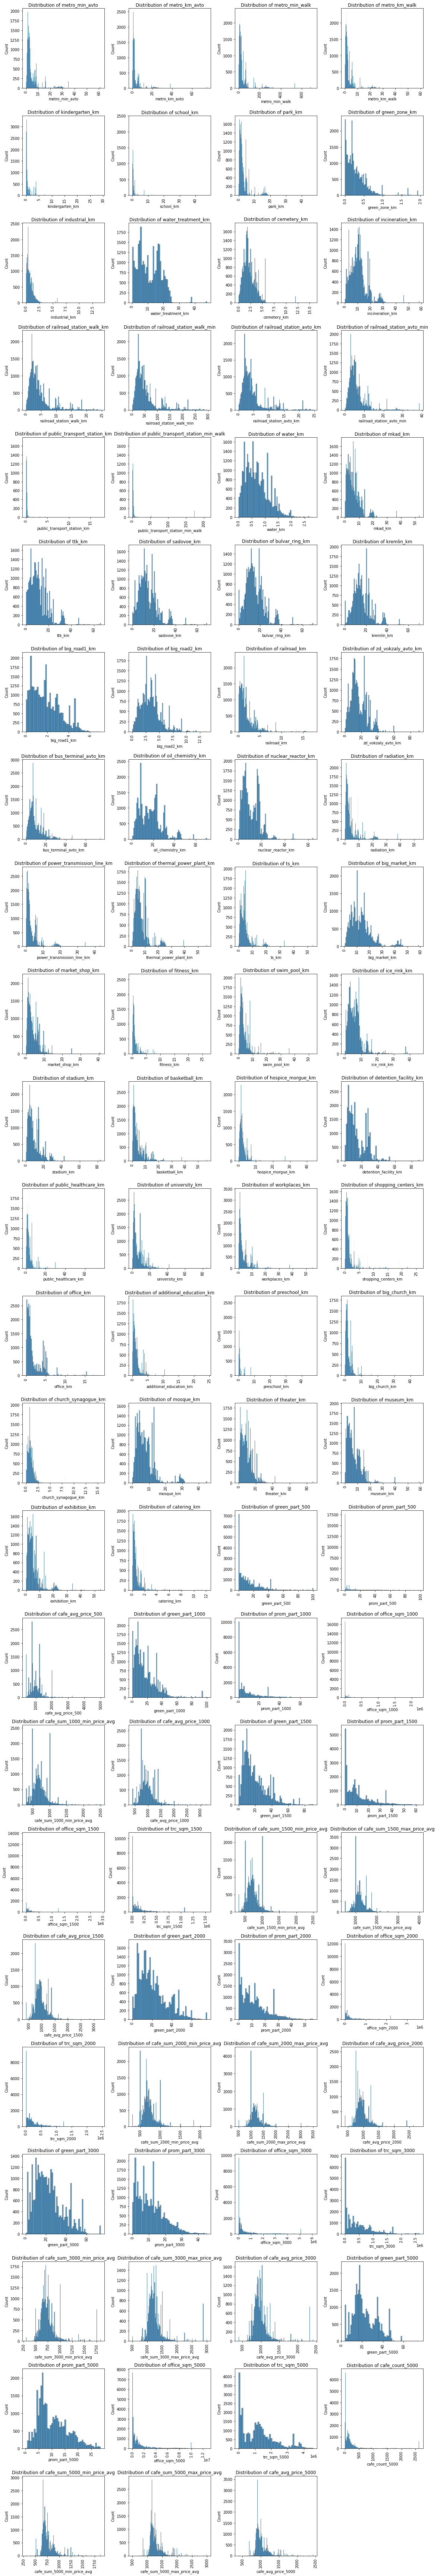

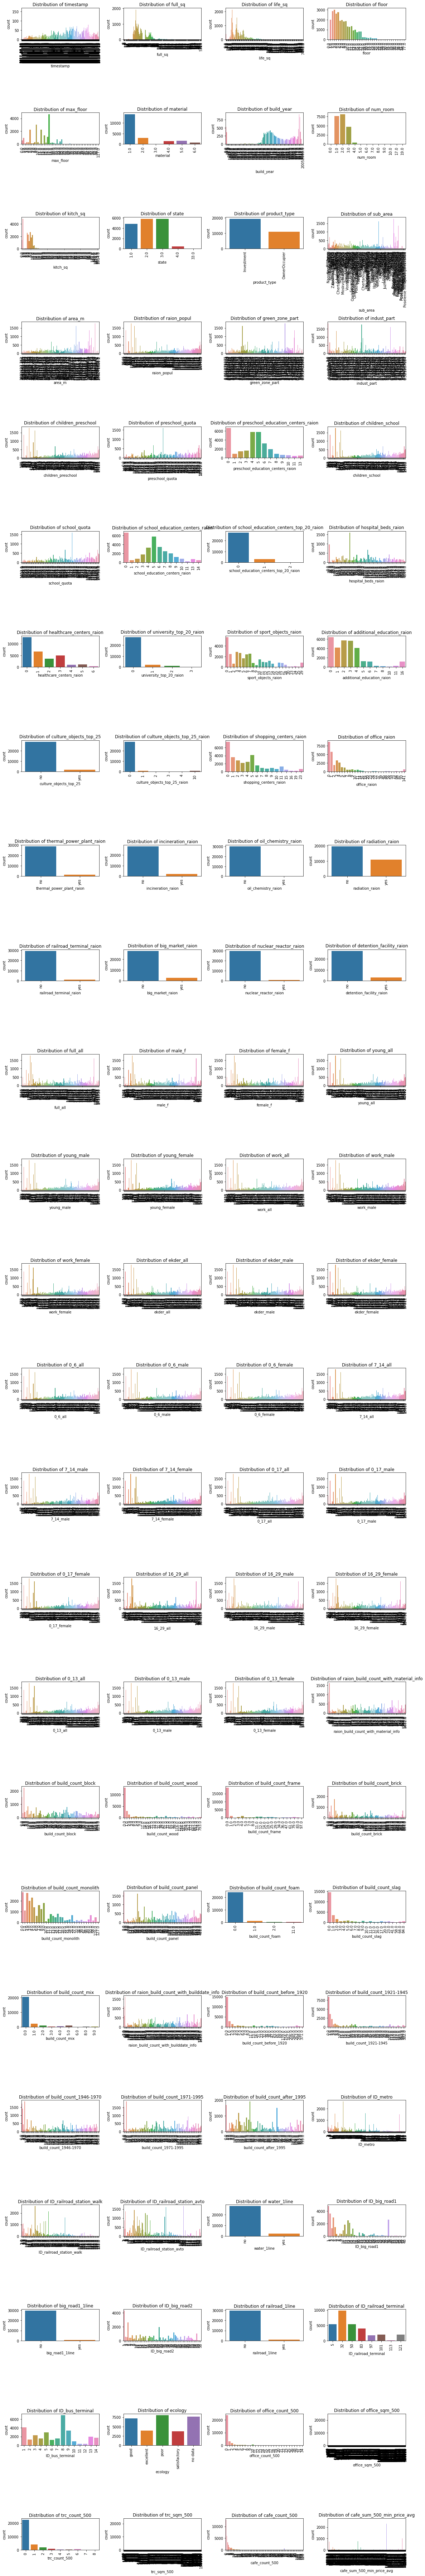

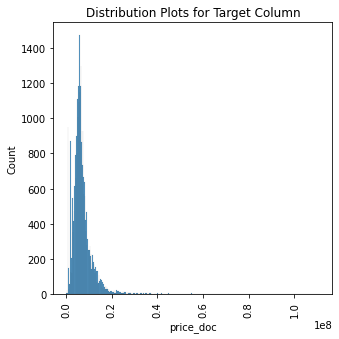

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


fig, axes = plt.subplots(24, 4, figsize=(16, 96))
axes = axes.ravel()
for index,col in enumerate(['metro_min_avto', 'metro_km_avto', 'metro_min_walk', 'metro_km_walk', 'kindergarten_km', 'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_treatment_km', 'cemetery_km', 'incineration_km', 'railroad_station_walk_km', 'railroad_station_walk_min', 'railroad_station_avto_km', 'railroad_station_avto_min', 'public_transport_station_km', 'public_transport_station_min_walk', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km', 'kremlin_km', 'big_road1_km', 'big_road2_km', 'railroad_km', 'zd_vokzaly_avto_km', 'bus_terminal_avto_km', 'oil_chemistry_km', 'nuclear_reactor_km', 'radiation_km', 'power_transmission_line_km', 'thermal_power_plant_km', 'ts_km', 'big_market_km', 'market_shop_km', 'fitness_km', 'swim_pool_km', 'ice_rink_km', 'stadium_km', 'basketball_km', 'hospice_morgue_km', 'detention_facility_km', 'public_healthcare_km', 'university_km', 'workplaces_km', 'shopping_centers_km', 'office_km', 'additional_education_km', 'preschool_km', 'big_church_km', 'church_synagogue_km', 'mosque_km', 'theater_km', 'museum_km', 'exhibition_km', 'catering_km', 'green_part_500', 'prom_part_500', 'cafe_avg_price_500', 'green_part_1000', 'prom_part_1000', 'office_sqm_1000', 'cafe_sum_1000_min_price_avg', 'cafe_avg_price_1000', 'green_part_1500', 'prom_part_1500', 'office_sqm_1500', 'trc_sqm_1500', 'cafe_sum_1500_min_price_avg', 'cafe_sum_1500_max_price_avg', 'cafe_avg_price_1500', 'green_part_2000', 'prom_part_2000', 'office_sqm_2000', 'trc_sqm_2000', 'cafe_sum_2000_min_price_avg', 'cafe_sum_2000_max_price_avg', 'cafe_avg_price_2000', 'green_part_3000', 'prom_part_3000', 'office_sqm_3000', 'trc_sqm_3000', 'cafe_sum_3000_min_price_avg', 'cafe_sum_3000_max_price_avg', 'cafe_avg_price_3000', 'green_part_5000', 'prom_part_5000', 'office_sqm_5000', 'trc_sqm_5000', 'cafe_count_5000', 'cafe_sum_5000_min_price_avg', 'cafe_sum_5000_max_price_avg', 'cafe_avg_price_5000']):
	sns.histplot(__train_dataset[col],ax=axes[index])
	axes[index].tick_params(axis="x", rotation=90)
	axes[index].set_title("Distribution of %s" %col )
axes[-1].set_visible(False)
fig.tight_layout();


fig, axes = plt.subplots(25, 4, figsize=(16, 100))
axes = axes.ravel()
for index,col in enumerate(['timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq', 'state', 'product_type', 'sub_area', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'children_preschool', 'preschool_quota', 'preschool_education_centers_raion', 'children_school', 'school_quota', 'school_education_centers_raion', 'school_education_centers_top_20_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'university_top_20_raion', 'sport_objects_raion', 'additional_education_raion', 'culture_objects_top_25', 'culture_objects_top_25_raion', 'shopping_centers_raion', 'office_raion', 'thermal_power_plant_raion', 'incineration_raion', 'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion', 'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion', 'full_all', 'male_f', 'female_f', 'young_all', 'young_male', 'young_female', 'work_all', 'work_male', 'work_female', 'ekder_all', 'ekder_male', 'ekder_female', '0_6_all', '0_6_male', '0_6_female', '7_14_all', '7_14_male', '7_14_female', '0_17_all', '0_17_male', '0_17_female', '16_29_all', '16_29_male', '16_29_female', '0_13_all', '0_13_male', '0_13_female', 'raion_build_count_with_material_info', 'build_count_block', 'build_count_wood', 'build_count_frame', 'build_count_brick', 'build_count_monolith', 'build_count_panel', 'build_count_foam', 'build_count_slag', 'build_count_mix', 'raion_build_count_with_builddate_info', 'build_count_before_1920', 'build_count_1921-1945', 'build_count_1946-1970', 'build_count_1971-1995', 'build_count_after_1995', 'ID_metro', 'ID_railroad_station_walk', 'ID_railroad_station_avto', 'water_1line', 'ID_big_road1', 'big_road1_1line', 'ID_big_road2', 'railroad_1line', 'ID_railroad_terminal', 'ID_bus_terminal', 'ecology', 'office_count_500', 'office_sqm_500', 'trc_count_500', 'trc_sqm_500', 'cafe_count_500', 'cafe_sum_500_min_price_avg']):
	sns.countplot(x = __train_dataset[col],ax=axes[index])
	axes[index].tick_params(axis="x", rotation=90)
	axes[index].set_title("Distribution of %s" %col )
fig.tight_layout();


plt.figure(figsize=(5,5))
sns.histplot(x = __train_dataset["price_doc"])
plt.xticks(rotation=90)
plt.title("Distribution Plots for Target Column")
fig.tight_layout();

In [8]:
# STORE SUBMISSION RELEVANT COLUMNS
__test_dataset_submission_columns = __test_dataset['id']

### Discard Irrelevant Columns
In the given input dataset there are <b>1</b> column that can be removed as follows:* id *.

In [9]:
# DISCARD IRRELEVANT COLUMNS
__train_dataset.drop(['id'], axis=1, inplace=True)
__test_dataset.drop(['id'], axis=1, inplace=True)

## Remove Missing Values in Categorical Columns

In the given input dataset there are <b>275 columns</b> with  missing data as follows:<b>0_6_all, cafe_avg_price_1500, build_count_slag, green_part_1000, cafe_count_1000, mosque_count_1500, railroad_station_avto_min, market_shop_km, build_count_foam, sport_count_1000, material, leisure_count_5000, cafe_count_3000_price_1000, mosque_count_5000, big_church_count_500, preschool_education_centers_raion, green_zone_part, 16_29_male, school_km, hospice_morgue_km, power_transmission_line_km, mosque_count_1000, university_top_20_raion, ID_bus_terminal, cafe_count_2000, school_education_centers_top_20_raion, raion_build_count_with_builddate_info, 7_14_male, prom_part_5000, cafe_sum_5000_max_price_avg, exhibition_km, big_road1_km, cafe_count_3000_na_price, big_church_count_3000, cafe_count_1500_price_high, metro_km_avto, young_female, cafe_count_500_price_4000, cafe_sum_1500_min_price_avg, area_m, prom_part_2000, green_part_3000, mosque_count_500, green_part_1500, cafe_count_3000_price_high, life_sq, sadovoe_km, church_count_3000, build_count_brick, sport_count_500, office_count_1500, school_education_centers_raion, cafe_count_5000_price_4000, trc_sqm_1500, workplaces_km, 0_17_all, 0_6_male, office_raion, ID_railroad_station_walk, cafe_count_1500, cafe_avg_price_5000, market_count_500, water_km, cafe_count_5000, industrial_km, cafe_count_2000_price_4000, cafe_count_1500_price_4000, market_count_2000, cafe_count_500_price_2500, cafe_avg_price_1000, metro_km_walk, church_count_500, healthcare_centers_raion, shopping_centers_km, cafe_count_3000_price_500, trc_count_1000, cafe_sum_2000_min_price_avg, cafe_count_500_price_1500, market_count_5000, kindergarten_km, cafe_count_500_price_high, big_road2_km, ID_railroad_station_avto, male_f, culture_objects_top_25_raion, office_count_2000, office_count_1000, build_count_panel, public_transport_station_min_walk, cafe_sum_1000_max_price_avg, cafe_count_1000_price_1500, 7_14_female, build_count_frame, trc_count_500, 0_13_female, leisure_count_1500, cafe_count_3000_price_2500, water_treatment_km, green_zone_km, cafe_count_2000_price_high, work_male, full_all, cafe_sum_500_min_price_avg, trc_sqm_500, big_church_count_2000, trc_sqm_3000, 0_17_female, 16_29_all, trc_sqm_5000, build_count_wood, cafe_count_1500_price_1000, bus_terminal_avto_km, build_count_1971-1995, 16_29_female, oil_chemistry_km, park_km, office_sqm_1000, cafe_count_1000_na_price, cafe_sum_3000_max_price_avg, cafe_count_5000_price_1500, big_church_count_1000, green_part_5000, work_female, public_transport_station_km, ID_metro, build_year, cafe_count_2000_price_1500, cafe_count_1000_price_500, office_sqm_500, green_part_2000, cafe_avg_price_2000, radiation_km, leisure_count_2000, cafe_count_500_price_1000, museum_km, 0_6_female, church_count_2000, cafe_count_5000_price_1000, cemetery_km, cafe_sum_3000_min_price_avg, cafe_count_500, hospital_beds_raion, railroad_km, sport_count_1500, cafe_count_3000_price_4000, 0_17_male, railroad_station_walk_min, cafe_sum_500_max_price_avg, big_church_count_5000, ts_km, railroad_station_avto_km, raion_popul, trc_count_3000, sport_objects_raion, cafe_count_1500_na_price, cafe_sum_2000_max_price_avg, swim_pool_km, cafe_count_2000_price_2500, big_market_km, cafe_sum_5000_min_price_avg, cafe_count_5000_price_2500, full_sq, build_count_monolith, prom_part_500, nuclear_reactor_km, additional_education_raion, leisure_count_1000, cafe_count_2000_na_price, bulvar_ring_km, cafe_count_1500_price_500, state, mosque_km, cafe_count_5000_price_high, sport_count_3000, market_count_1500, incineration_km, cafe_sum_1500_max_price_avg, cafe_avg_price_3000, cafe_avg_price_500, build_count_after_1995, stadium_km, sport_count_5000, 0_13_all, theater_km, railroad_station_walk_km, public_healthcare_km, trc_sqm_2000, big_church_km, zd_vokzaly_avto_km, office_sqm_3000, mkad_km, build_count_before_1920, raion_build_count_with_material_info, preschool_quota, 7_14_all, metro_min_avto, office_km, prom_part_1500, university_km, children_preschool, trc_count_5000, church_count_1000, fitness_km, trc_sqm_1000, office_sqm_2000, prom_part_3000, kitch_sq, shopping_centers_raion, cafe_count_1500_price_2500, cafe_count_2000_price_1000, cafe_count_500_price_500, school_quota, cafe_sum_1000_min_price_avg, office_count_3000, young_all, ID_big_road2, church_synagogue_km, trc_count_1500, indust_part, market_count_1000, office_count_5000, preschool_km, kremlin_km, young_male, office_count_500, leisure_count_500, ekder_female, big_church_count_1500, cafe_count_1000_price_1000, office_sqm_5000, ID_railroad_terminal, ttk_km, thermal_power_plant_km, basketball_km, cafe_count_1000_price_4000, 0_13_male, max_floor, detention_facility_km, build_count_1946-1970, ice_rink_km, cafe_count_1000_price_high, prom_part_1000, mosque_count_3000, ID_big_road1, female_f, metro_min_walk, cafe_count_3000_price_1500, cafe_count_5000_price_500, cafe_count_3000, cafe_count_1500_price_1500, church_count_5000, additional_education_km, trc_count_2000, work_all, cafe_count_500_na_price, church_count_1500, ekder_male, cafe_count_1000_price_2500, ekder_all, leisure_count_3000, green_part_500, build_count_block, build_count_mix, children_school, office_sqm_1500, floor, cafe_count_2000_price_500, cafe_count_5000_na_price, price_doc, catering_km, build_count_1921-1945, sport_count_2000, mosque_count_2000, num_room, market_count_3000</b>
The following code removes the missing values from those columns. We use an average value (median) of each column to replace the Null values.

## Imputation Transformer
We will use which is an imputation transformer for completing missing values.
We can use out-of-the-box imputation transformer from Scikit-Learn packages. The detail and the list of complete parameters can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)

In [10]:
# PREPROCESSING-1
from sklearn.impute import SimpleImputer
import numpy as np
_NUMERIC_COLS_WITH_MISSING_VALUES = ['0_6_all', 'cafe_avg_price_1500', 'build_count_slag', 'green_part_1000', 'cafe_count_1000', 'mosque_count_1500', 'railroad_station_avto_min', 'market_shop_km', 'build_count_foam', 'sport_count_1000', 'material', 'leisure_count_5000', 'cafe_count_3000_price_1000', 'mosque_count_5000', 'big_church_count_500', 'preschool_education_centers_raion', 'green_zone_part', '16_29_male', 'school_km', 'hospice_morgue_km', 'power_transmission_line_km', 'mosque_count_1000', 'university_top_20_raion', 'ID_bus_terminal', 'cafe_count_2000', 'school_education_centers_top_20_raion', 'raion_build_count_with_builddate_info', '7_14_male', 'prom_part_5000', 'cafe_sum_5000_max_price_avg', 'exhibition_km', 'big_road1_km', 'cafe_count_3000_na_price', 'big_church_count_3000', 'cafe_count_1500_price_high', 'metro_km_avto', 'young_female', 'cafe_count_500_price_4000', 'cafe_sum_1500_min_price_avg', 'area_m', 'prom_part_2000', 'green_part_3000', 'mosque_count_500', 'green_part_1500', 'cafe_count_3000_price_high', 'life_sq', 'sadovoe_km', 'church_count_3000', 'build_count_brick', 'sport_count_500', 'office_count_1500', 'school_education_centers_raion', 'cafe_count_5000_price_4000', 'trc_sqm_1500', 'workplaces_km', '0_17_all', '0_6_male', 'office_raion', 'ID_railroad_station_walk', 'cafe_count_1500', 'cafe_avg_price_5000', 'market_count_500', 'water_km', 'cafe_count_5000', 'industrial_km', 'cafe_count_2000_price_4000', 'cafe_count_1500_price_4000', 'market_count_2000', 'cafe_count_500_price_2500', 'cafe_avg_price_1000', 'metro_km_walk', 'church_count_500', 'healthcare_centers_raion', 'shopping_centers_km', 'cafe_count_3000_price_500', 'trc_count_1000', 'cafe_sum_2000_min_price_avg', 'cafe_count_500_price_1500', 'market_count_5000', 'kindergarten_km', 'cafe_count_500_price_high', 'big_road2_km', 'ID_railroad_station_avto', 'male_f', 'culture_objects_top_25_raion', 'office_count_2000', 'office_count_1000', 'build_count_panel', 'public_transport_station_min_walk', 'cafe_sum_1000_max_price_avg', 'cafe_count_1000_price_1500', '7_14_female', 'build_count_frame', 'trc_count_500', '0_13_female', 'leisure_count_1500', 'cafe_count_3000_price_2500', 'water_treatment_km', 'green_zone_km', 'cafe_count_2000_price_high', 'work_male', 'full_all', 'cafe_sum_500_min_price_avg', 'trc_sqm_500', 'big_church_count_2000', 'trc_sqm_3000', '0_17_female', '16_29_all', 'trc_sqm_5000', 'build_count_wood', 'cafe_count_1500_price_1000', 'bus_terminal_avto_km', 'build_count_1971-1995', '16_29_female', 'oil_chemistry_km', 'park_km', 'office_sqm_1000', 'cafe_count_1000_na_price', 'cafe_sum_3000_max_price_avg', 'cafe_count_5000_price_1500', 'big_church_count_1000', 'green_part_5000', 'work_female', 'public_transport_station_km', 'ID_metro', 'build_year', 'cafe_count_2000_price_1500', 'cafe_count_1000_price_500', 'office_sqm_500', 'green_part_2000', 'cafe_avg_price_2000', 'radiation_km', 'leisure_count_2000', 'cafe_count_500_price_1000', 'museum_km', '0_6_female', 'church_count_2000', 'cafe_count_5000_price_1000', 'cemetery_km', 'cafe_sum_3000_min_price_avg', 'cafe_count_500', 'hospital_beds_raion', 'railroad_km', 'sport_count_1500', 'cafe_count_3000_price_4000', '0_17_male', 'railroad_station_walk_min', 'cafe_sum_500_max_price_avg', 'big_church_count_5000', 'ts_km', 'railroad_station_avto_km', 'raion_popul', 'trc_count_3000', 'sport_objects_raion', 'cafe_count_1500_na_price', 'cafe_sum_2000_max_price_avg', 'swim_pool_km', 'cafe_count_2000_price_2500', 'big_market_km', 'cafe_sum_5000_min_price_avg', 'cafe_count_5000_price_2500', 'full_sq', 'build_count_monolith', 'prom_part_500', 'nuclear_reactor_km', 'additional_education_raion', 'leisure_count_1000', 'cafe_count_2000_na_price', 'bulvar_ring_km', 'cafe_count_1500_price_500', 'state', 'mosque_km', 'cafe_count_5000_price_high', 'sport_count_3000', 'market_count_1500', 'incineration_km', 'cafe_sum_1500_max_price_avg', 'cafe_avg_price_3000', 'cafe_avg_price_500', 'build_count_after_1995', 'stadium_km', 'sport_count_5000', '0_13_all', 'theater_km', 'railroad_station_walk_km', 'public_healthcare_km', 'trc_sqm_2000', 'big_church_km', 'zd_vokzaly_avto_km', 'office_sqm_3000', 'mkad_km', 'build_count_before_1920', 'raion_build_count_with_material_info', 'preschool_quota', '7_14_all', 'metro_min_avto', 'office_km', 'prom_part_1500', 'university_km', 'children_preschool', 'trc_count_5000', 'church_count_1000', 'fitness_km', 'trc_sqm_1000', 'office_sqm_2000', 'prom_part_3000', 'kitch_sq', 'shopping_centers_raion', 'cafe_count_1500_price_2500', 'cafe_count_2000_price_1000', 'cafe_count_500_price_500', 'school_quota', 'cafe_sum_1000_min_price_avg', 'office_count_3000', 'young_all', 'ID_big_road2', 'church_synagogue_km', 'trc_count_1500', 'indust_part', 'market_count_1000', 'office_count_5000', 'preschool_km', 'kremlin_km', 'young_male', 'office_count_500', 'leisure_count_500', 'ekder_female', 'big_church_count_1500', 'cafe_count_1000_price_1000', 'office_sqm_5000', 'ID_railroad_terminal', 'ttk_km', 'thermal_power_plant_km', 'basketball_km', 'cafe_count_1000_price_4000', '0_13_male', 'max_floor', 'detention_facility_km', 'build_count_1946-1970', 'ice_rink_km', 'cafe_count_1000_price_high', 'prom_part_1000', 'mosque_count_3000', 'ID_big_road1', 'female_f', 'metro_min_walk', 'cafe_count_3000_price_1500', 'cafe_count_5000_price_500', 'cafe_count_3000', 'cafe_count_1500_price_1500', 'church_count_5000', 'additional_education_km', 'trc_count_2000', 'work_all', 'cafe_count_500_na_price', 'church_count_1500', 'ekder_male', 'cafe_count_1000_price_2500', 'ekder_all', 'leisure_count_3000', 'green_part_500', 'build_count_block', 'build_count_mix', 'children_school', 'office_sqm_1500', 'floor', 'cafe_count_2000_price_500', 'cafe_count_5000_na_price', 'price_doc', 'catering_km', 'build_count_1921-1945', 'sport_count_2000', 'mosque_count_2000', 'num_room', 'market_count_3000']
for _col in _NUMERIC_COLS_WITH_MISSING_VALUES:
    __simple_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    __train_dataset[_col] = __simple_imputer.fit_transform(__train_dataset[_col].values.reshape(-1,1))[:,0]
    if _col in __test_dataset:
        __test_dataset[_col] = __simple_imputer.transform(__test_dataset[_col].astype(__train_dataset[_col].dtypes).values.reshape(-1,1))[:,0]

## Remove Missing Values in Numerical Columns

In the given input dataset there are <b>16 columns </b> with  missing data as follows:<b>nuclear_reactor_raion, product_type, radiation_raion, incineration_raion, railroad_terminal_raion, big_road1_1line, water_1line, thermal_power_plant_raion, oil_chemistry_raion, big_market_raion, detention_facility_raion, ecology, railroad_1line, sub_area, timestamp, culture_objects_top_25</b>

The following code removes the missing values from those columns. We use average value (median) of each column to replace the null values.

In [11]:
# PREPROCESSING-2
from sklearn.impute import SimpleImputer
import numpy as np
_STRING_COLS_WITH_MISSING_VALUES = ['nuclear_reactor_raion', 'product_type', 'radiation_raion', 'incineration_raion', 'railroad_terminal_raion', 'big_road1_1line', 'water_1line', 'thermal_power_plant_raion', 'oil_chemistry_raion', 'big_market_raion', 'detention_facility_raion', 'ecology', 'railroad_1line', 'sub_area', 'timestamp', 'culture_objects_top_25']
for _col in _STRING_COLS_WITH_MISSING_VALUES:
    __simple_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    __train_dataset[_col] = __simple_imputer.fit_transform(__train_dataset[_col].values.reshape(-1,1))[:,0]
    if _col in __test_dataset:
        __test_dataset[_col] = __simple_imputer.transform(__test_dataset[_col].astype(__train_dataset[_col].dtypes).values.reshape(-1,1))[:,0]

In [12]:
# PREPROCESSING-3
_DATE_COLUMNS = ['timestamp']
for _col in _DATE_COLUMNS:
    train_date_col = pd.to_datetime(__train_dataset[_col], errors='coerce')
    __train_dataset["year"] = train_date_col.dt.year
    __train_dataset["month"] = train_date_col.dt.month
    __train_dataset["day"] = train_date_col.dt.day
    __train_dataset.drop(_col, axis=1, inplace=True)
    test_date_col = pd.to_datetime(__test_dataset[_col], errors='coerce')
    __test_dataset["year"] = test_date_col.dt.year
    __test_dataset["month"] = test_date_col.dt.month
    __test_dataset["day"] = test_date_col.dt.day
    __test_dataset.drop(_col, axis=1, inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented fr

## Encoding Ordinal Categorical Features
Let's transfer categorical features as an integer array.
We will use Ordinal Encoder as explained [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html).

In the given input dataset there are <b>15</b> columns that can be transfered to integer and it includes:* product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology *.

In [13]:
# PREPROCESSING-4
from sklearn.preprocessing import OrdinalEncoder
_CATEGORICAL_COLS = ['product_type', 'sub_area', 'culture_objects_top_25', 'thermal_power_plant_raion', 'incineration_raion', 'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion', 'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion', 'water_1line', 'big_road1_1line', 'railroad_1line', 'ecology']
_ohe = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
__train_dataset[_CATEGORICAL_COLS] = pd.DataFrame(_ohe.fit_transform(__train_dataset[_CATEGORICAL_COLS]), columns=_CATEGORICAL_COLS)
__test_dataset[_CATEGORICAL_COLS] = pd.DataFrame(_ohe.transform(__test_dataset[_CATEGORICAL_COLS]), columns=_CATEGORICAL_COLS)

## Numeric to Scale

In the given input dataset there are <b>275 columns </b> with numeric values as follows where we can convert those values to scale through [log1p](https://numpy.org/doc/stable/reference/generated/numpy.log1p.html).

full_sq, life_sq, floor, max_floor, material, build_year, num_room, kitch_sq, state, area_m, raion_popul, green_zone_part, indust_part, children_preschool, preschool_quota, preschool_education_centers_raion, children_school, school_quota, school_education_centers_raion, school_education_centers_top_20_raion, hospital_beds_raion, healthcare_centers_raion, university_top_20_raion, sport_objects_raion, additional_education_raion, culture_objects_top_25_raion, shopping_centers_raion, office_raion, full_all, male_f, female_f, young_all, young_male, young_female, work_all, work_male, work_female, ekder_all, ekder_male, ekder_female, 0_6_all, 0_6_male, 0_6_female, 7_14_all, 7_14_male, 7_14_female, 0_17_all, 0_17_male, 0_17_female, 16_29_all, 16_29_male, 16_29_female, 0_13_all, 0_13_male, 0_13_female, raion_build_count_with_material_info, build_count_block, build_count_wood, build_count_frame, build_count_brick, build_count_monolith, build_count_panel, build_count_foam, build_count_slag, build_count_mix, raion_build_count_with_builddate_info, build_count_before_1920, build_count_1921-1945, build_count_1946-1970, build_count_1971-1995, build_count_after_1995, ID_metro, metro_min_avto, metro_km_avto, metro_min_walk, metro_km_walk, kindergarten_km, school_km, park_km, green_zone_km, industrial_km, water_treatment_km, cemetery_km, incineration_km, railroad_station_walk_km, railroad_station_walk_min, ID_railroad_station_walk, railroad_station_avto_km, railroad_station_avto_min, ID_railroad_station_avto, public_transport_station_km, public_transport_station_min_walk, water_km, mkad_km, ttk_km, sadovoe_km, bulvar_ring_km, kremlin_km, big_road1_km, ID_big_road1, big_road2_km, ID_big_road2, railroad_km, zd_vokzaly_avto_km, ID_railroad_terminal, bus_terminal_avto_km, ID_bus_terminal, oil_chemistry_km, nuclear_reactor_km, radiation_km, power_transmission_line_km, thermal_power_plant_km, ts_km, big_market_km, market_shop_km, fitness_km, swim_pool_km, ice_rink_km, stadium_km, basketball_km, hospice_morgue_km, detention_facility_km, public_healthcare_km, university_km, workplaces_km, shopping_centers_km, office_km, additional_education_km, preschool_km, big_church_km, church_synagogue_km, mosque_km, theater_km, museum_km, exhibition_km, catering_km, green_part_500, prom_part_500, office_count_500, office_sqm_500, trc_count_500, trc_sqm_500, cafe_count_500, cafe_sum_500_min_price_avg, cafe_sum_500_max_price_avg, cafe_avg_price_500, cafe_count_500_na_price, cafe_count_500_price_500, cafe_count_500_price_1000, cafe_count_500_price_1500, cafe_count_500_price_2500, cafe_count_500_price_4000, cafe_count_500_price_high, big_church_count_500, church_count_500, mosque_count_500, leisure_count_500, sport_count_500, market_count_500, green_part_1000, prom_part_1000, office_count_1000, office_sqm_1000, trc_count_1000, trc_sqm_1000, cafe_count_1000, cafe_sum_1000_min_price_avg, cafe_sum_1000_max_price_avg, cafe_avg_price_1000, cafe_count_1000_na_price, cafe_count_1000_price_500, cafe_count_1000_price_1000, cafe_count_1000_price_1500, cafe_count_1000_price_2500, cafe_count_1000_price_4000, cafe_count_1000_price_high, big_church_count_1000, church_count_1000, mosque_count_1000, leisure_count_1000, sport_count_1000, market_count_1000, green_part_1500, prom_part_1500, office_count_1500, office_sqm_1500, trc_count_1500, trc_sqm_1500, cafe_count_1500, cafe_sum_1500_min_price_avg, cafe_sum_1500_max_price_avg, cafe_avg_price_1500, cafe_count_1500_na_price, cafe_count_1500_price_500, cafe_count_1500_price_1000, cafe_count_1500_price_1500, cafe_count_1500_price_2500, cafe_count_1500_price_4000, cafe_count_1500_price_high, big_church_count_1500, church_count_1500, mosque_count_1500, leisure_count_1500, sport_count_1500, market_count_1500, green_part_2000, prom_part_2000, office_count_2000, office_sqm_2000, trc_count_2000, trc_sqm_2000, cafe_count_2000, cafe_sum_2000_min_price_avg, cafe_sum_2000_max_price_avg, cafe_avg_price_2000, cafe_count_2000_na_price, cafe_count_2000_price_500, cafe_count_2000_price_1000, cafe_count_2000_price_1500, cafe_count_2000_price_2500, cafe_count_2000_price_4000, cafe_count_2000_price_high, big_church_count_2000, church_count_2000, mosque_count_2000, leisure_count_2000, sport_count_2000, market_count_2000, green_part_3000, prom_part_3000, office_count_3000, office_sqm_3000, trc_count_3000, trc_sqm_3000, cafe_count_3000, cafe_sum_3000_min_price_avg, cafe_sum_3000_max_price_avg, cafe_avg_price_3000, cafe_count_3000_na_price, cafe_count_3000_price_500, cafe_count_3000_price_1000, cafe_count_3000_price_1500, cafe_count_3000_price_2500, cafe_count_3000_price_4000, cafe_count_3000_price_high, big_church_count_3000, church_count_3000, mosque_count_3000, leisure_count_3000, sport_count_3000, market_count_3000, green_part_5000, prom_part_5000, office_count_5000, office_sqm_5000, trc_count_5000, trc_sqm_5000, cafe_count_5000, cafe_sum_5000_min_price_avg, cafe_sum_5000_max_price_avg, cafe_avg_price_5000, cafe_count_5000_na_price, cafe_count_5000_price_500, cafe_count_5000_price_1000, cafe_count_5000_price_1500, cafe_count_5000_price_2500, cafe_count_5000_price_4000, cafe_count_5000_price_high, big_church_count_5000, church_count_5000, mosque_count_5000, leisure_count_5000, sport_count_5000, market_count_5000, price_doc

In [14]:
# PREPROCESSING-5
import numpy as np
_NUMERIC_COLS_TO_SCALE = ['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq', 'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'children_preschool', 'preschool_quota', 'preschool_education_centers_raion', 'children_school', 'school_quota', 'school_education_centers_raion', 'school_education_centers_top_20_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'university_top_20_raion', 'sport_objects_raion', 'additional_education_raion', 'culture_objects_top_25_raion', 'shopping_centers_raion', 'office_raion', 'full_all', 'male_f', 'female_f', 'young_all', 'young_male', 'young_female', 'work_all', 'work_male', 'work_female', 'ekder_all', 'ekder_male', 'ekder_female', '0_6_all', '0_6_male', '0_6_female', '7_14_all', '7_14_male', '7_14_female', '0_17_all', '0_17_male', '0_17_female', '16_29_all', '16_29_male', '16_29_female', '0_13_all', '0_13_male', '0_13_female', 'raion_build_count_with_material_info', 'build_count_block', 'build_count_wood', 'build_count_frame', 'build_count_brick', 'build_count_monolith', 'build_count_panel', 'build_count_foam', 'build_count_slag', 'build_count_mix', 'raion_build_count_with_builddate_info', 'build_count_before_1920', 'build_count_1921-1945', 'build_count_1946-1970', 'build_count_1971-1995', 'build_count_after_1995', 'ID_metro', 'metro_min_avto', 'metro_km_avto', 'metro_min_walk', 'metro_km_walk', 'kindergarten_km', 'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_treatment_km', 'cemetery_km', 'incineration_km', 'railroad_station_walk_km', 'railroad_station_walk_min', 'ID_railroad_station_walk', 'railroad_station_avto_km', 'railroad_station_avto_min', 'ID_railroad_station_avto', 'public_transport_station_km', 'public_transport_station_min_walk', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km', 'kremlin_km', 'big_road1_km', 'ID_big_road1', 'big_road2_km', 'ID_big_road2', 'railroad_km', 'zd_vokzaly_avto_km', 'ID_railroad_terminal', 'bus_terminal_avto_km', 'ID_bus_terminal', 'oil_chemistry_km', 'nuclear_reactor_km', 'radiation_km', 'power_transmission_line_km', 'thermal_power_plant_km', 'ts_km', 'big_market_km', 'market_shop_km', 'fitness_km', 'swim_pool_km', 'ice_rink_km', 'stadium_km', 'basketball_km', 'hospice_morgue_km', 'detention_facility_km', 'public_healthcare_km', 'university_km', 'workplaces_km', 'shopping_centers_km', 'office_km', 'additional_education_km', 'preschool_km', 'big_church_km', 'church_synagogue_km', 'mosque_km', 'theater_km', 'museum_km', 'exhibition_km', 'catering_km', 'green_part_500', 'prom_part_500', 'office_count_500', 'office_sqm_500', 'trc_count_500', 'trc_sqm_500', 'cafe_count_500', 'cafe_sum_500_min_price_avg', 'cafe_sum_500_max_price_avg', 'cafe_avg_price_500', 'cafe_count_500_na_price', 'cafe_count_500_price_500', 'cafe_count_500_price_1000', 'cafe_count_500_price_1500', 'cafe_count_500_price_2500', 'cafe_count_500_price_4000', 'cafe_count_500_price_high', 'big_church_count_500', 'church_count_500', 'mosque_count_500', 'leisure_count_500', 'sport_count_500', 'market_count_500', 'green_part_1000', 'prom_part_1000', 'office_count_1000', 'office_sqm_1000', 'trc_count_1000', 'trc_sqm_1000', 'cafe_count_1000', 'cafe_sum_1000_min_price_avg', 'cafe_sum_1000_max_price_avg', 'cafe_avg_price_1000', 'cafe_count_1000_na_price', 'cafe_count_1000_price_500', 'cafe_count_1000_price_1000', 'cafe_count_1000_price_1500', 'cafe_count_1000_price_2500', 'cafe_count_1000_price_4000', 'cafe_count_1000_price_high', 'big_church_count_1000', 'church_count_1000', 'mosque_count_1000', 'leisure_count_1000', 'sport_count_1000', 'market_count_1000', 'green_part_1500', 'prom_part_1500', 'office_count_1500', 'office_sqm_1500', 'trc_count_1500', 'trc_sqm_1500', 'cafe_count_1500', 'cafe_sum_1500_min_price_avg', 'cafe_sum_1500_max_price_avg', 'cafe_avg_price_1500', 'cafe_count_1500_na_price', 'cafe_count_1500_price_500', 'cafe_count_1500_price_1000', 'cafe_count_1500_price_1500', 'cafe_count_1500_price_2500', 'cafe_count_1500_price_4000', 'cafe_count_1500_price_high', 'big_church_count_1500', 'church_count_1500', 'mosque_count_1500', 'leisure_count_1500', 'sport_count_1500', 'market_count_1500', 'green_part_2000', 'prom_part_2000', 'office_count_2000', 'office_sqm_2000', 'trc_count_2000', 'trc_sqm_2000', 'cafe_count_2000', 'cafe_sum_2000_min_price_avg', 'cafe_sum_2000_max_price_avg', 'cafe_avg_price_2000', 'cafe_count_2000_na_price', 'cafe_count_2000_price_500', 'cafe_count_2000_price_1000', 'cafe_count_2000_price_1500', 'cafe_count_2000_price_2500', 'cafe_count_2000_price_4000', 'cafe_count_2000_price_high', 'big_church_count_2000', 'church_count_2000', 'mosque_count_2000', 'leisure_count_2000', 'sport_count_2000', 'market_count_2000', 'green_part_3000', 'prom_part_3000', 'office_count_3000', 'office_sqm_3000', 'trc_count_3000', 'trc_sqm_3000', 'cafe_count_3000', 'cafe_sum_3000_min_price_avg', 'cafe_sum_3000_max_price_avg', 'cafe_avg_price_3000', 'cafe_count_3000_na_price', 'cafe_count_3000_price_500', 'cafe_count_3000_price_1000', 'cafe_count_3000_price_1500', 'cafe_count_3000_price_2500', 'cafe_count_3000_price_4000', 'cafe_count_3000_price_high', 'big_church_count_3000', 'church_count_3000', 'mosque_count_3000', 'leisure_count_3000', 'sport_count_3000', 'market_count_3000', 'green_part_5000', 'prom_part_5000', 'office_count_5000', 'office_sqm_5000', 'trc_count_5000', 'trc_sqm_5000', 'cafe_count_5000', 'cafe_sum_5000_min_price_avg', 'cafe_sum_5000_max_price_avg', 'cafe_avg_price_5000', 'cafe_count_5000_na_price', 'cafe_count_5000_price_500', 'cafe_count_5000_price_1000', 'cafe_count_5000_price_1500', 'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000', 'cafe_count_5000_price_high', 'big_church_count_5000', 'church_count_5000', 'mosque_count_5000', 'leisure_count_5000', 'sport_count_5000', 'market_count_5000', 'price_doc']
for _col in _NUMERIC_COLS_TO_SCALE:
    __train_dataset[_col] = np.log1p(__train_dataset[_col])
    if _col in __test_dataset:
        __test_dataset[_col] = np.log1p(__test_dataset[_col])

### Visualization for feature heatmap

<AxesSubplot:title={'center':'Pearson Correlation HeatMap of Features'}>

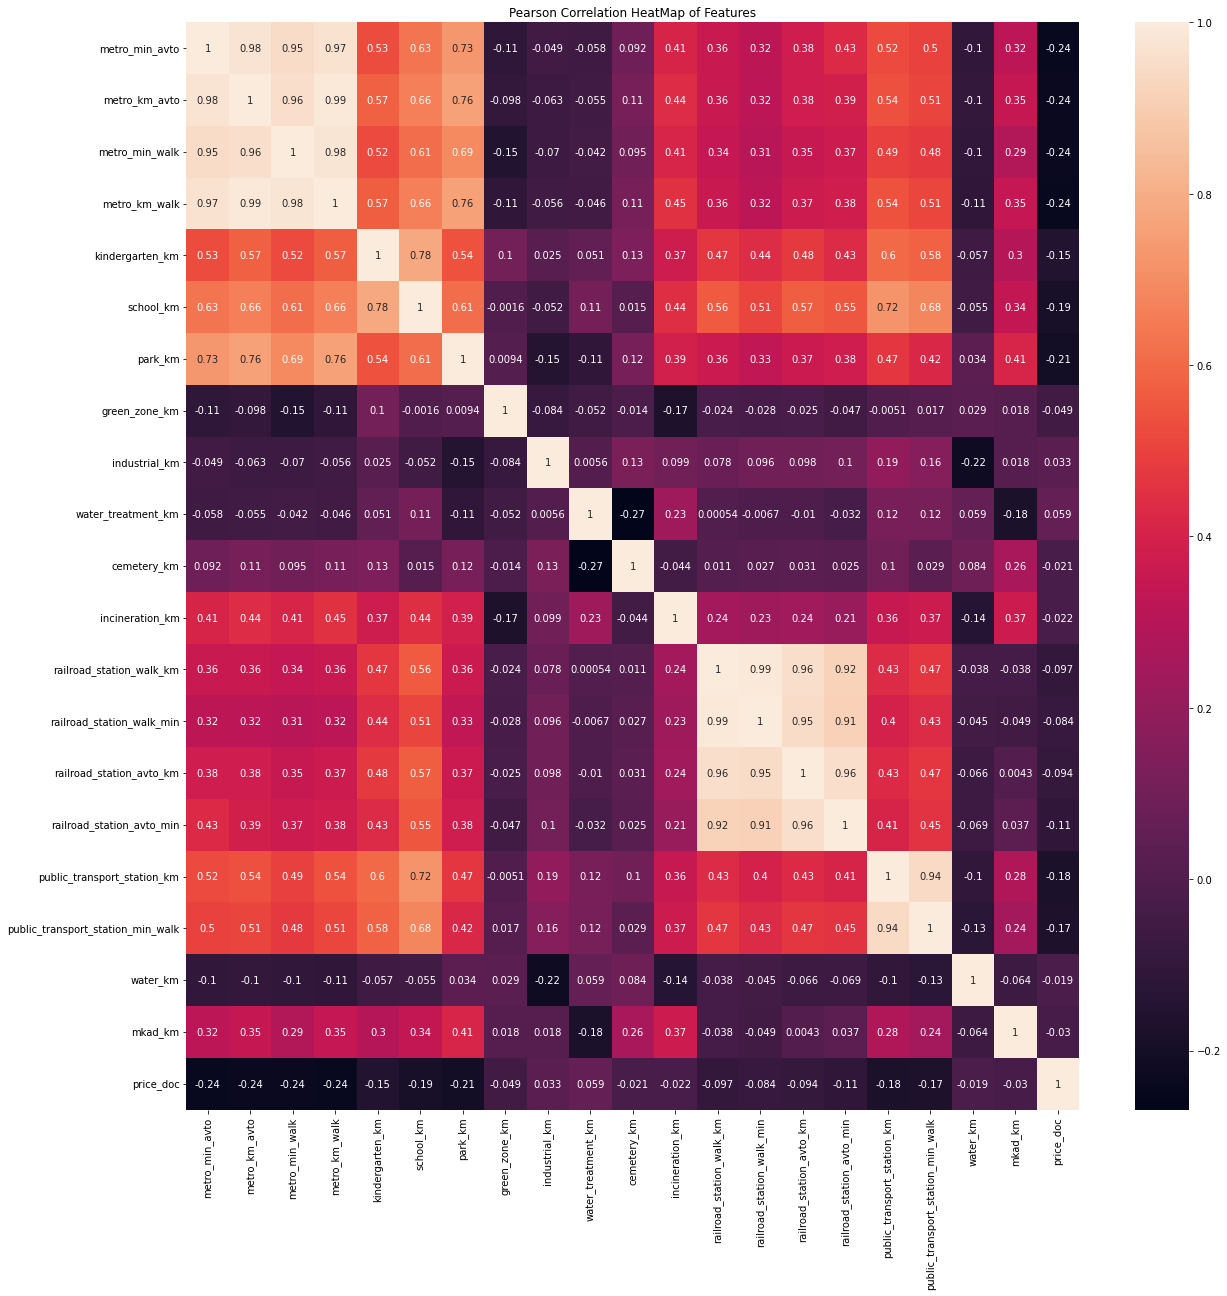

In [15]:
_COLS_FOR_HEATMAP = ['metro_min_avto', 'metro_km_avto', 'metro_min_walk', 'metro_km_walk', 'kindergarten_km', 'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_treatment_km', 'cemetery_km', 'incineration_km', 'railroad_station_walk_km', 'railroad_station_walk_min', 'railroad_station_avto_km', 'railroad_station_avto_min', 'public_transport_station_km', 'public_transport_station_min_walk', 'water_km', 'mkad_km', 'price_doc']
plt.figure(figsize=(20,20))
plt.title("Pearson Correlation HeatMap of Features")
sns.heatmap(__train_dataset[_COLS_FOR_HEATMAP].corr(),annot=True)

### Target Column
We need to predict the target column.
Therefore, we need to detach the target column in prediction.
Note that if we don't drop the field, it will generate a model with high accuracy on training and worst accuracy on test (because the value in test dataset is Null).
Here is the list of *target column*: <b>price_doc</b>

In [16]:
# DETACH TARGET
__feature_train = __train_dataset.drop(['price_doc'], axis=1)
__target_train =__train_dataset['price_doc']
__feature_test = __test_dataset

# Training and Prediction
First, we will train a model based on pre-processed the training dataset.
Second, let's predict test values based on the trained model.

In [17]:
# MODEL
import numpy as np
from xgboost import XGBRegressor
__model = XGBRegressor()
__model.fit(__feature_train, __target_train) 
__y_pred = __model.predict(__feature_test)

In [18]:
# INVERSE TARGET
import numpy as np
if '__target_test' in locals():
    __target_test = np.expm1(__target_test)
__y_pred = np.expm1(__y_pred)

# Submission File
We have to maintain the target columns in "submission.csv" which will be submitted as our prediction results.

In [19]:
# SUBMISSION
submission = pd.DataFrame(columns=['id'], data=__test_dataset_submission_columns)
submission['price_doc'] = __y_pred
submission.head()

,id,price_doc
0,30474,6156273.0
1,30475,8722584.0
2,30476,5109593.0
3,30477,6492084.0
4,30478,5508930.0


In [20]:
# save submission file
submission.to_csv("kaggle_submission.csv", index=False)